In [16]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
from matplotlib import animation, rc
from IPython.display import HTML

# N Body problem
Our goal will be to have a list of $n$-bodies interactiong in a plane. 
* Need Newtons Second Law:
$$ F = m a $$
Force is mass times acceleration. 
* Need the attractive force between two objects: 
$$ F = \frac{G m_1 m_2}{r^2} $$
$G$ is a gravitational constant (for my system). $m_i$ are different masses for planets and $r$ is the distance between them. 
* Acceleration is the second derivative of position. 
$$ a = \frac{\partial^2 x }{\partial t^2} $$
where $x$ is the position of an object, and $t$ is denoting time. 

# Building a model. 
$$ F = m_1 a \Longrightarrow \frac{G m_1 m_2}{r^2} = m_1 \frac{\partial^2 x}{\partial t^2} $$

### Discretize the temporal derivative.
$$ \frac{\partial^2 x}{\partial t^2} \approx \frac{x^{n+1} - 2x^n + x^{n-1}}{\Delta t^2} $$
Here $\Delta t$ is the time step size, and superscipts to denote the specific time. Specifically 
$$ x^n = x|_{(t = n\Delta t)} $$

$$\frac{x^{n+1} - 2x^n + x^{n-1}}{\Delta t^2} = \frac{G m_2}{r^2} $$
Solve now for $x^{n+1}$ giving the position of my planet interms of two previous positions and the force of some other planet a distance $r$ away with mass $m_2$. 

$$ x^{n+1} = \frac{\Delta t^2 G m_2}{r^2} + 2x^{n} - x^{n-1}.$$
Basic trig will allow us to do the force and position updates component wise. 

# Model Parameters

In [17]:

class planet:
    def __init__(self,mass,x1,y1,x0,y0,name,index,color='bo'):
        self.mass = mass;
        self.name = name;
        self.index = index; 
        self.xnmo = x0; 
        self.ynmo = y0;
        self.xn   = x1; 
        self.yn   = y1;
        self.color = color;
        
    def updateIndex(self):
        self.xnmo = self.xn;
        self.xn   = self.xnpo;
        self.ynmo = self.yn;
        self.yn   = self.ynpo;  
        
    def dumpParameters(self):
        print("====================================")
        print("Planet ", self.name)
        print(" mass = ", self.mass)
        print(" position now: (", self.xn, ", ", self.yn,")")
        print(" position old: (", self.xnmo, ", ", self.ynmo,")")
        
        

In [23]:
class window:
    def __init__(self,xmin=-10.0, xmax=10.0, ymin=-10.0,ymax=10.0):
        self.xmin = xmin
        self.xmax = xmax
        self.ymin = ymin 
        self.ymax = ymax
        
def increaseIndex(SolarSystem):
    for i in range(len(SolarSystem)): 
        SolarSystem[i].updateIndex(); 

def PrintSolarSystem(SolarSystem):
    for i in range(len(SolarSystem)):
        print("Planet Index = ", i); 
        SolarSystem[i].dumpParameters(); 
        
def PlotPlanets(List,window):
    fig = plt.figure(figsize=(10,20))
    ax  = plt.axes(xlim=(window.xmin,window.xmax),ylim=(window.ymin,window.ymax),aspect='equal')
    line, = ax.plot([],[],lw=2)
    for p in List:
        plt.plot(p.xn,p.yn,p.color)

def distance(Planet1, Planet2): 
    # Returns distance between two planet objects.
    dist = ((Planet1.xn - Planet2.xn)**2.0 + (Planet1.yn - Planet2.yn)**2.0)**(0.5); 
    #print "dist = ", dist
    return dist

def updatePositions(SolarSystem,G,dt): 
    # Get the position in the list and a planet object. 
    for i in range(len(SolarSystem)):
        # For each planet in the list update the force by other planets on the object. 
        SolarSystem[i].fx = 0.0; 
        SolarSystem[i].fy = 0.0; 
        for j in range(len(SolarSystem)):
            # Loop over the other local planets that are not self. 
            if (j != i): 
                # Get the distance between self and other planets. 
                r  = distance(SolarSystem[i], SolarSystem[j]);
                # Separate Force into components. 
                CosT  = (SolarSystem[j].xn - SolarSystem[i].xn)/r;
                SinT  = (SolarSystem[j].yn - SolarSystem[i].yn)/r;
                # Apply Force
                SolarSystem[i].fx += ((dt*dt*G*SolarSystem[j].mass)/(r*r))*CosT;
                SolarSystem[i].fy += ((dt*dt*G*SolarSystem[j].mass)/(r*r))*SinT;
 
        # Apply force to update position. 
        SolarSystem[i].xnpo = SolarSystem[i].fx + 2.0*SolarSystem[i].xn - SolarSystem[i].xnmo;
        SolarSystem[i].ynpo = SolarSystem[i].fy + 2.0*SolarSystem[i].yn - SolarSystem[i].ynmo;
        

Planet Index =  0
Planet  small
 mass =  14982889540145.156
 position now: ( 1.0 ,  -0.1 )
 position old: ( 0.95 ,  -0.16 )
Planet Index =  1
Planet  big
 mass =  7.491444770072578e+16
 position now: ( -1.0 ,  0.0 )
 position old: ( -1.0 ,  0.0 )
Planet Index =  2
Planet  Px
 mass =  14982889540145.156
 position now: ( 1.0 ,  -0.12 )
 position old: ( 1.03 ,  -0.2 )
Planet Index =  3
Planet  Py
 mass =  1498288954014.5156
 position now: ( 0.5 ,  -0.1 )
 position old: ( 0.4 ,  -0.15 )
Planet Index =  4
Planet  Pz
 mass =  149828895401451.56
 position now: ( 1.0 ,  -0.15 )
 position old: ( 0.98 ,  0.0 )
Time step =  1
Time step =  2
Time step =  3
Time step =  4
Time step =  5
Time step =  6
Time step =  7
Time step =  8
Time step =  9
Time step =  10
Time step =  11
Time step =  12
Time step =  13
Time step =  14
Time step =  15
Time step =  16
Time step =  17
Time step =  18
Time step =  19
Time step =  20
Time step =  21
Time step =  22
Time step =  23
Time step =  24
Time step =  25
T

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


 36
Time step =  37
Time step =  38
Time step =  39
Time step =  40
Time step =  41
Time step =  42
Time step =  43
Time step =  44
Time step =  45
Time step =  46
Time step =  47
Time step =  48
Time step =  49
Time step =  50
Time step =  51
Time step =  52
Time step =  53
Time step =  54
Time step =  55
Time step =  56
Time step =  57
Time step =  58
Time step =  59
Time step =  60
Time step =  61
Time step =  62
Time step =  63
Time step =  64
Time step =  65
Time step =  66
Time step =  67
Time step =  68
Time step =  69
Time step =  70
Time step =  71
Time step =  72
Time step =  73
Time step =  74
Time step =  75
Time step =  76
Time step =  77
Time step =  78
Time step =  79
Time step =  80
Time step =  81
Time step =  82
Time step =  83
Time step =  84
Time step =  85
Time step =  86
Time step =  87
Time step =  88
Time step =  89
Time step =  90
Time step =  91
Time step =  92
Time step =  93
Time step =  94
Time step =  95
Time step =  96
Time step =  97
Time step =  98
Time

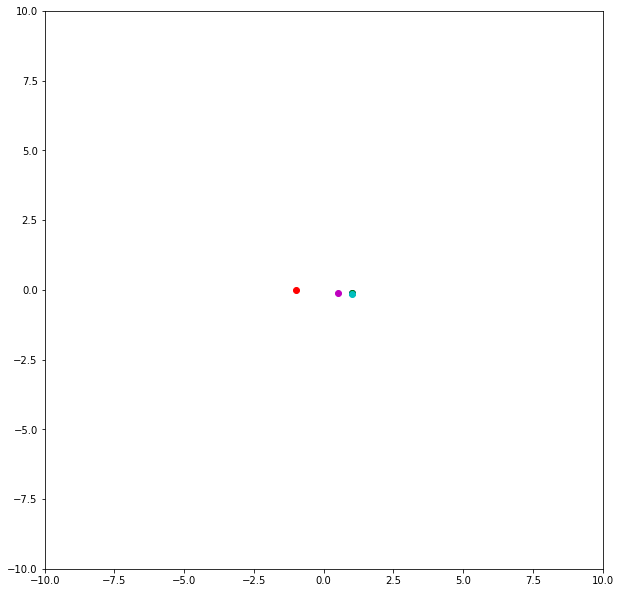

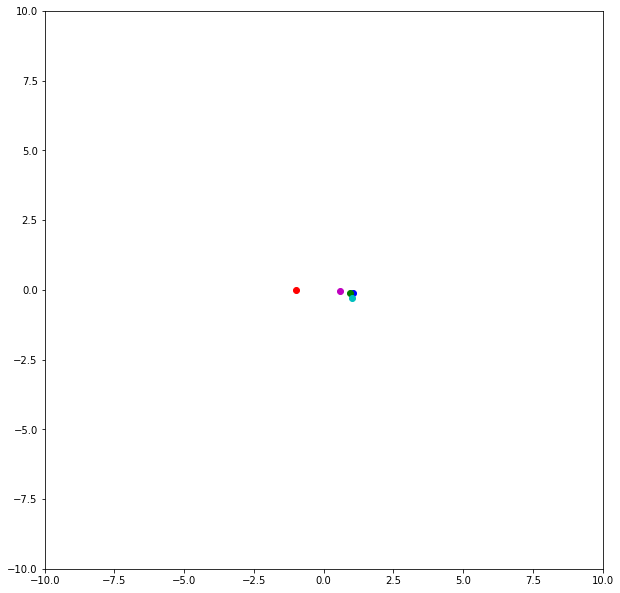

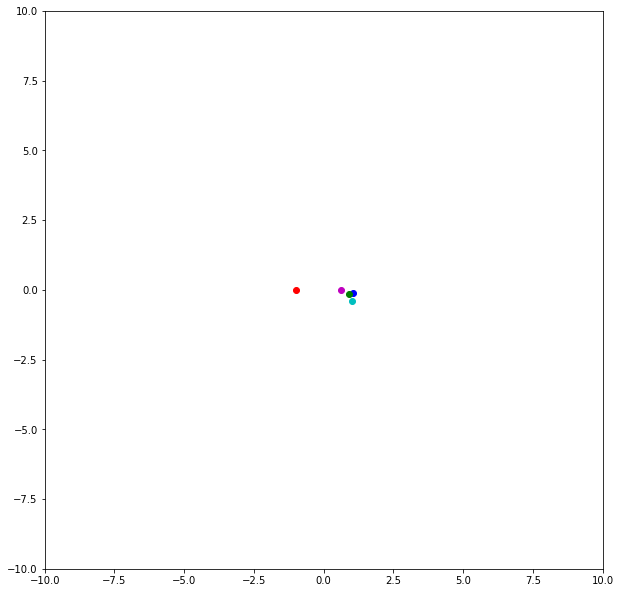

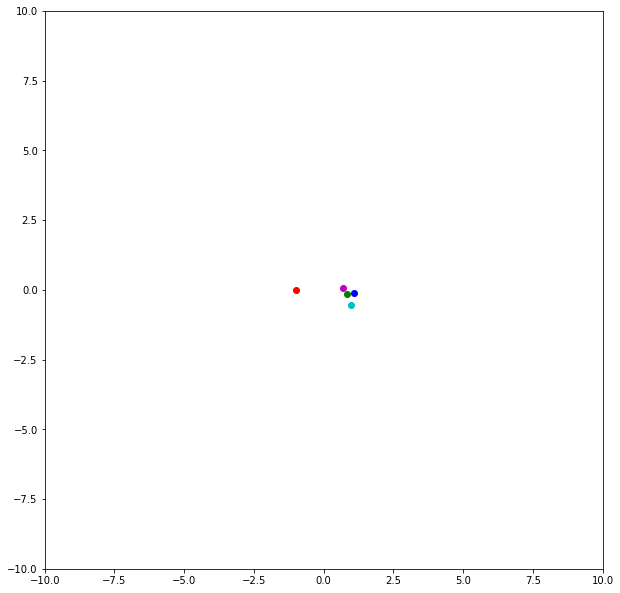

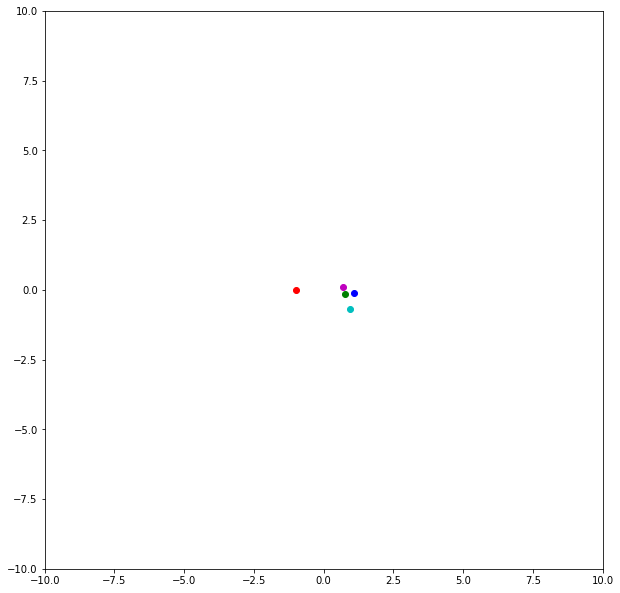

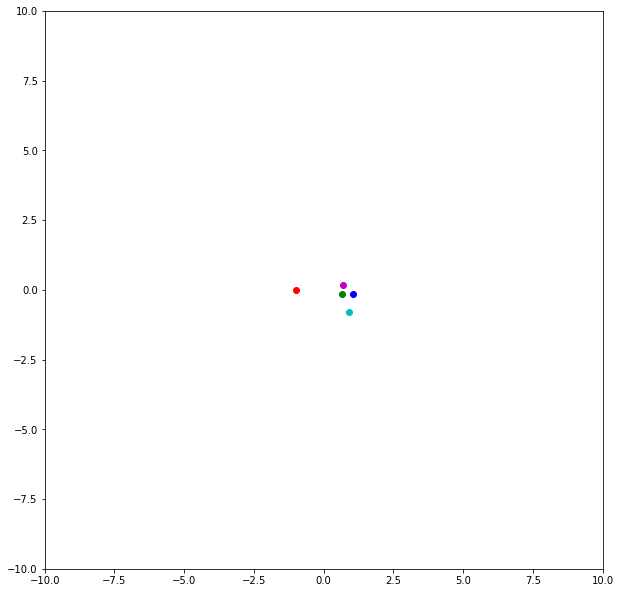

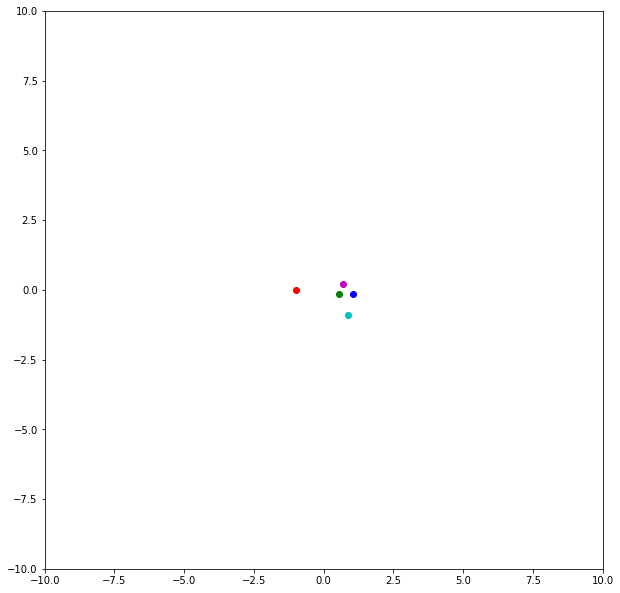

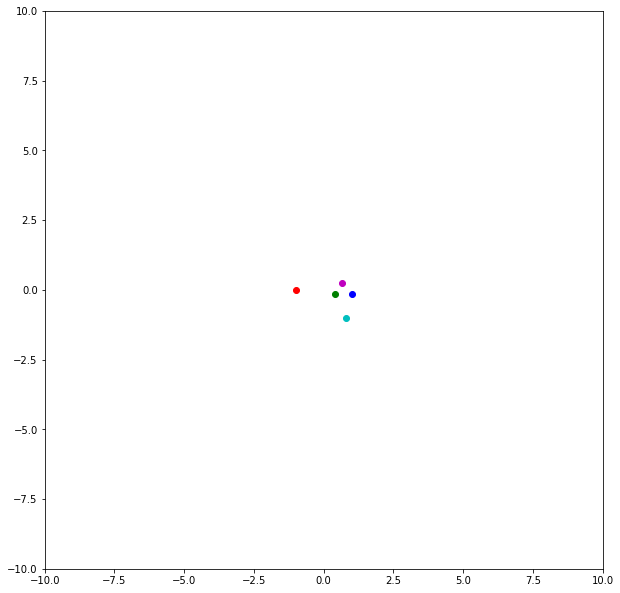

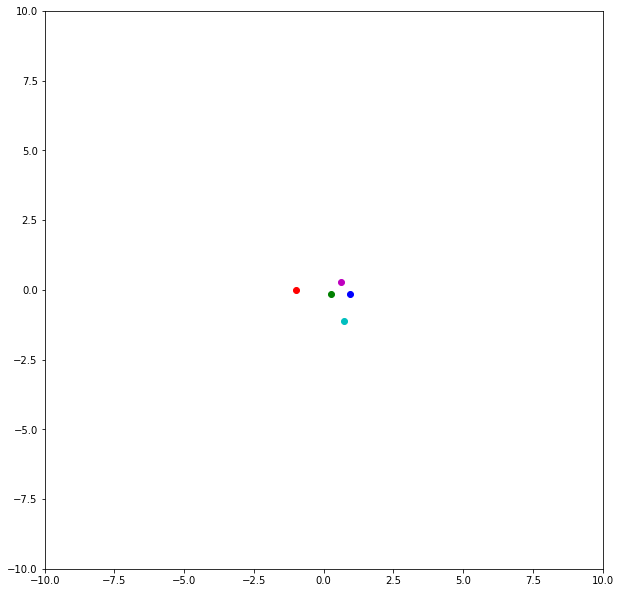

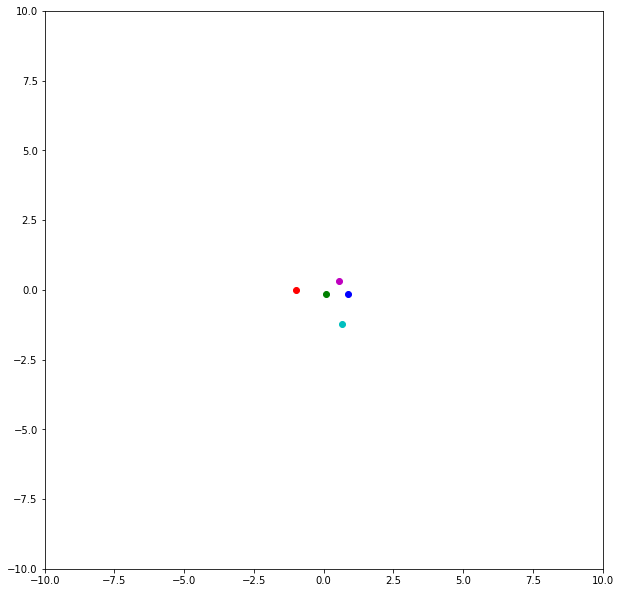

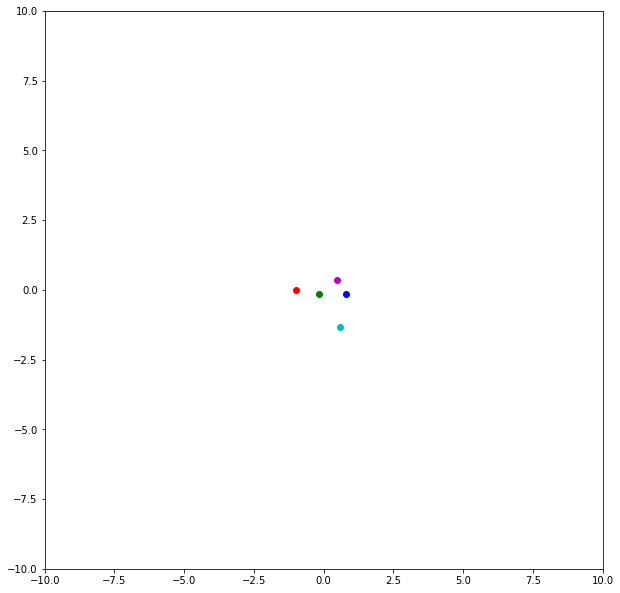

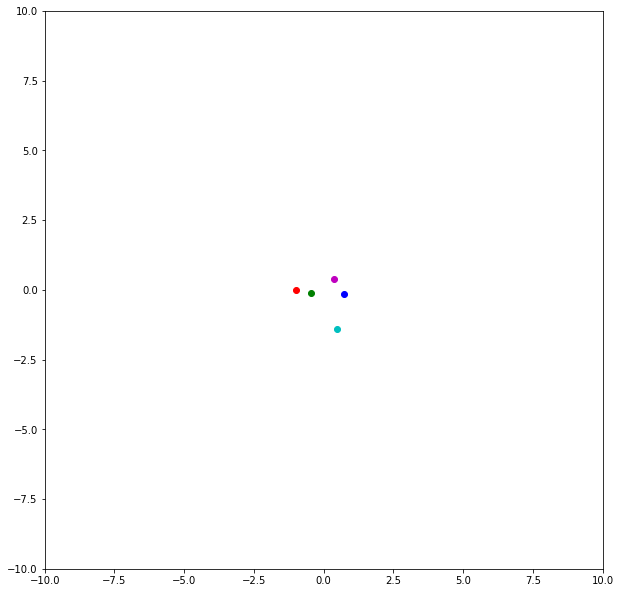

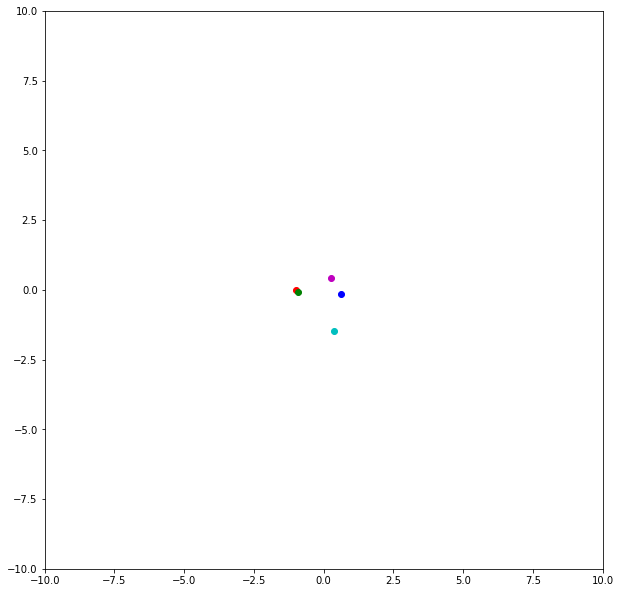

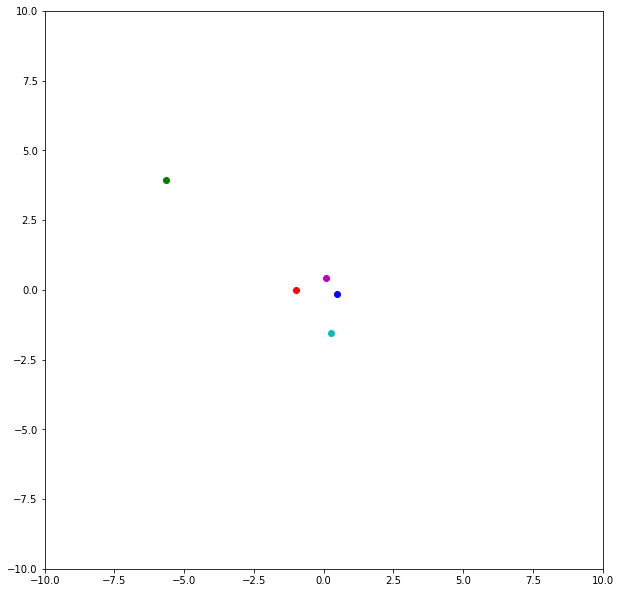

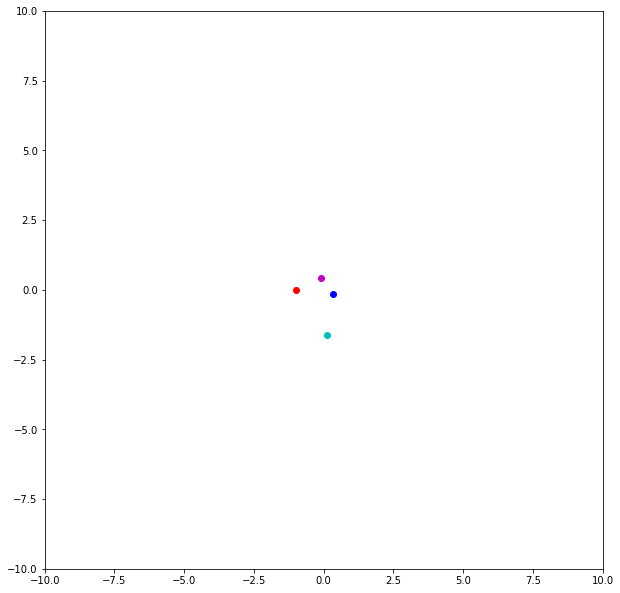

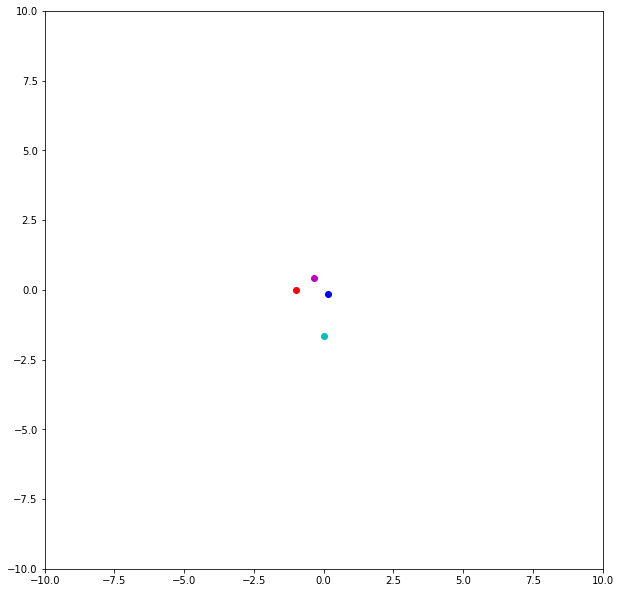

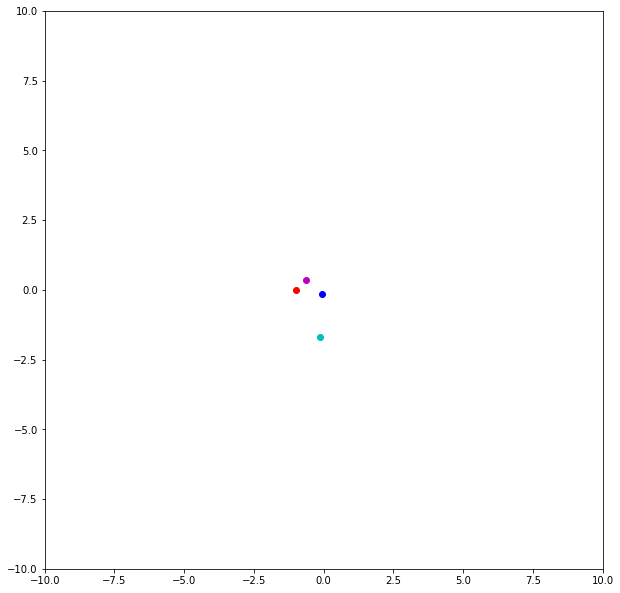

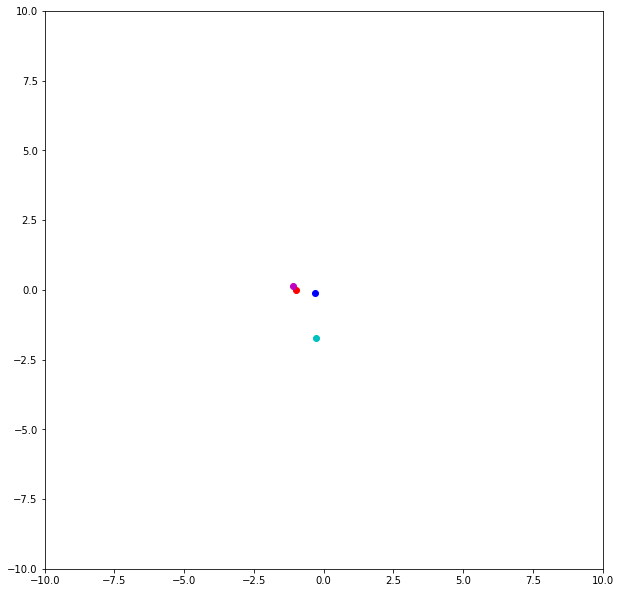

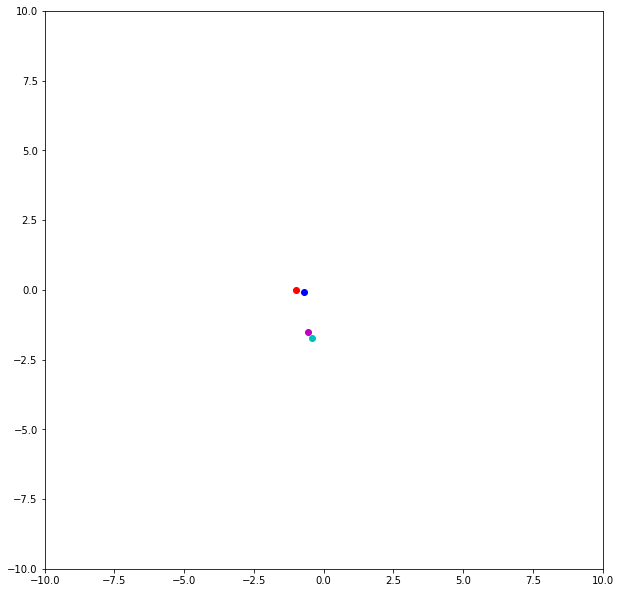

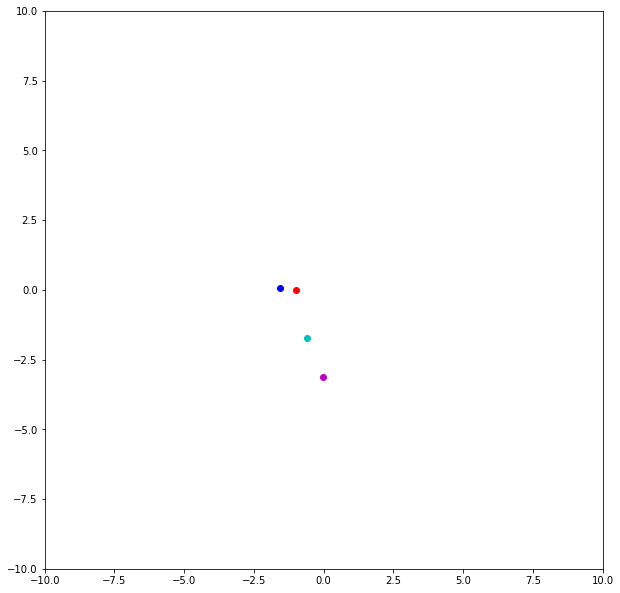

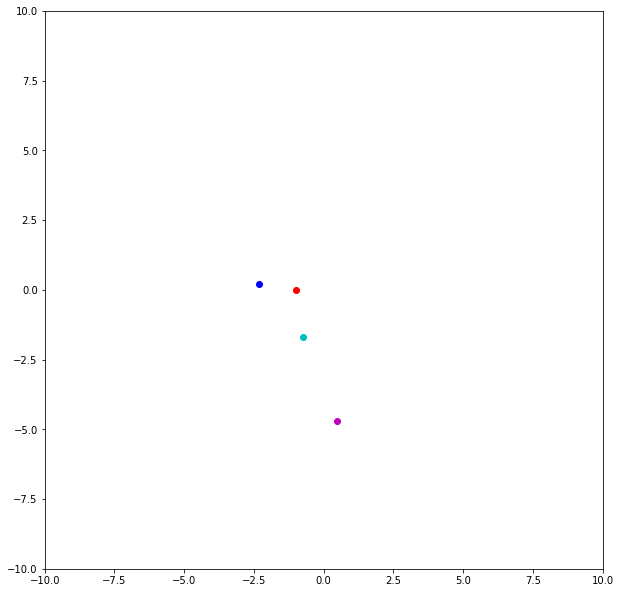

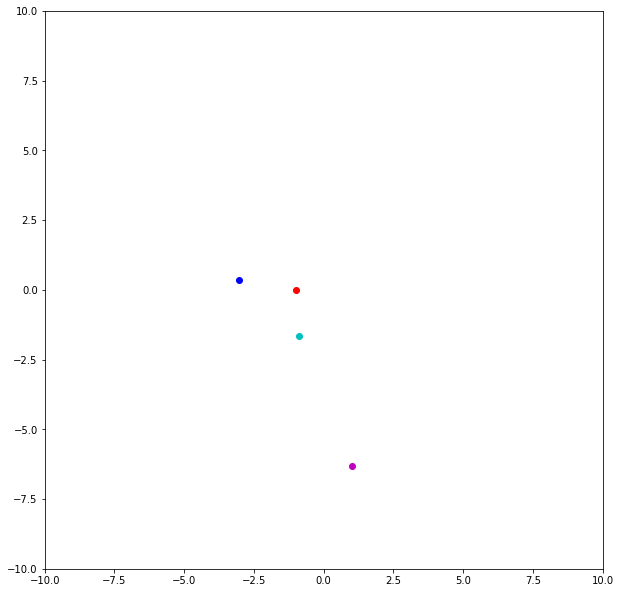

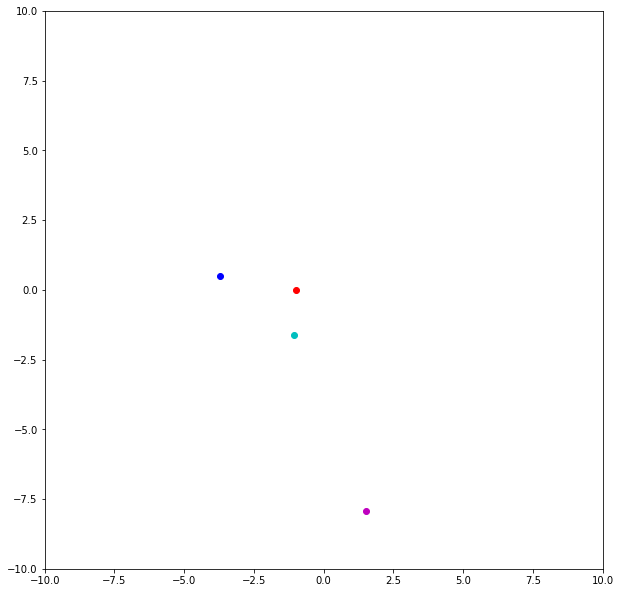

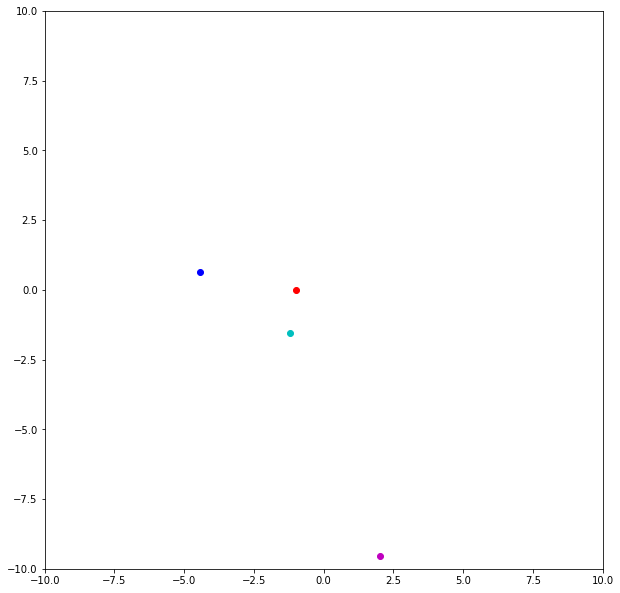

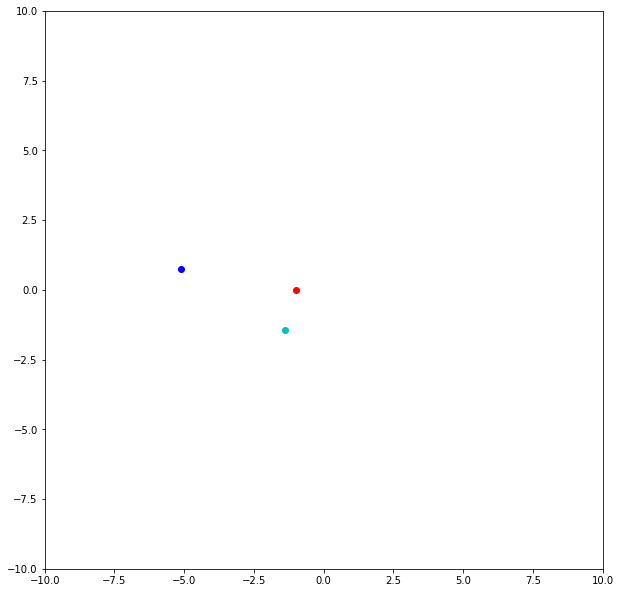

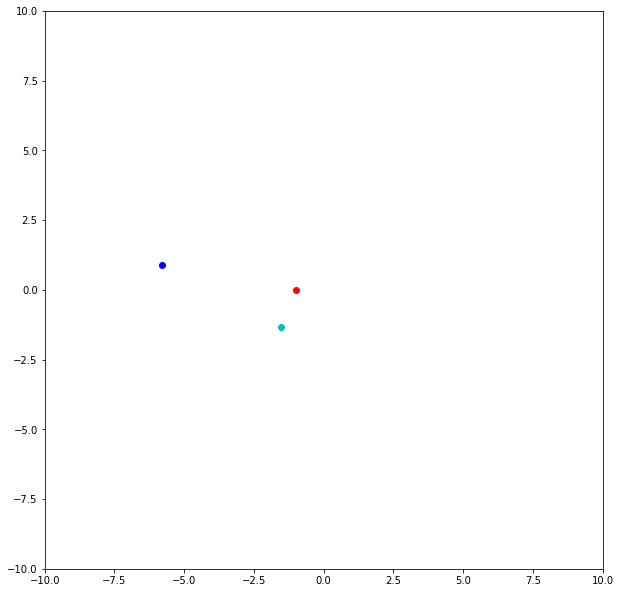

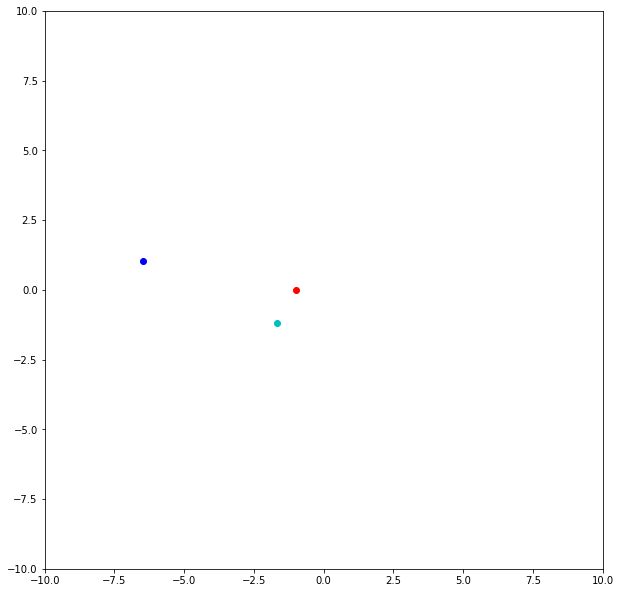

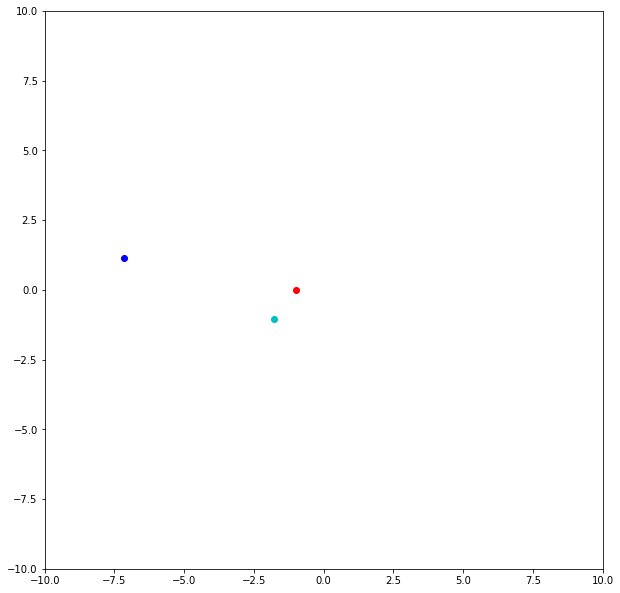

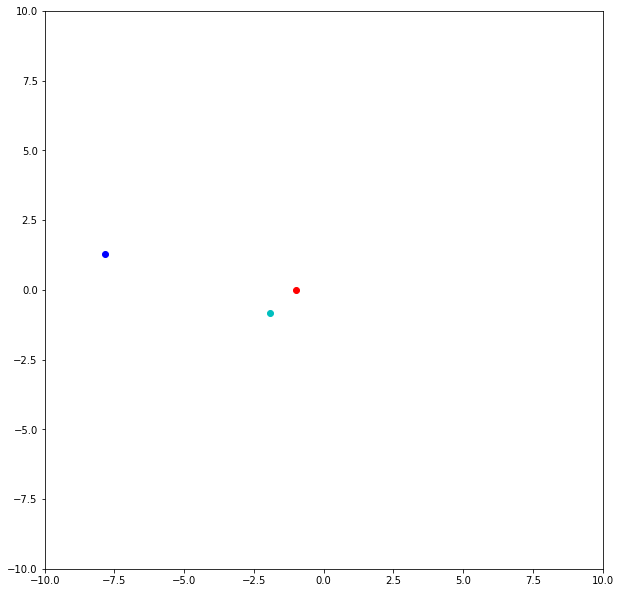

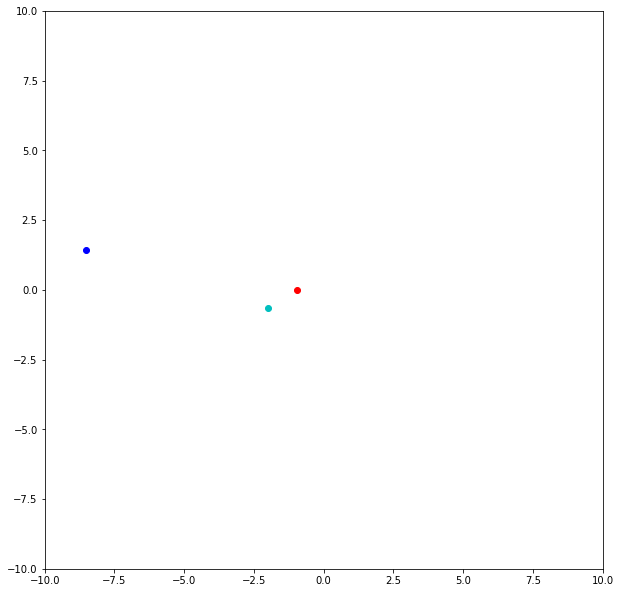

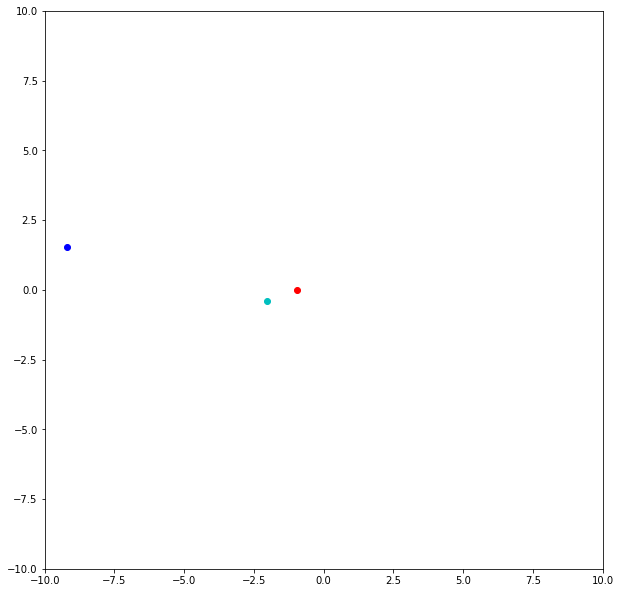

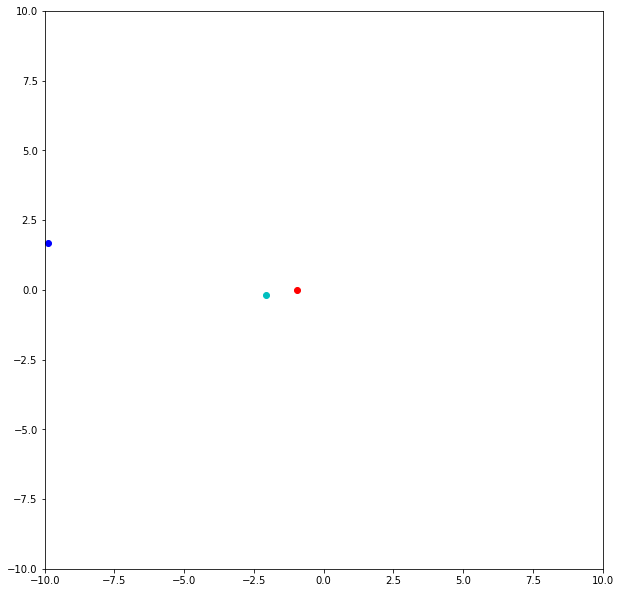

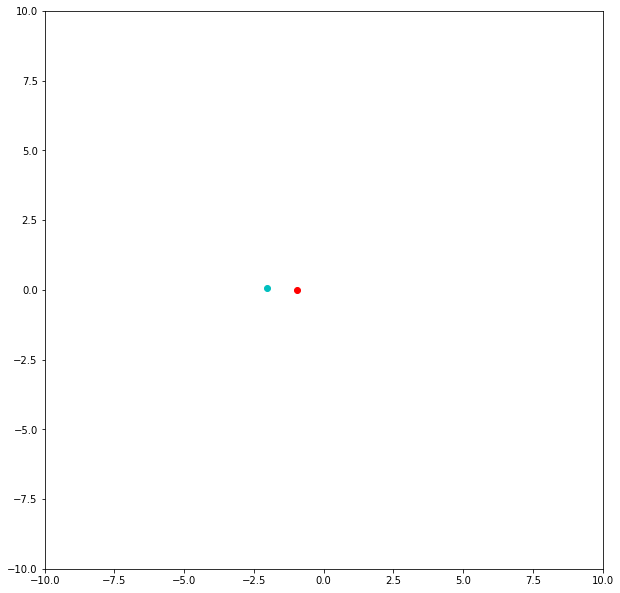

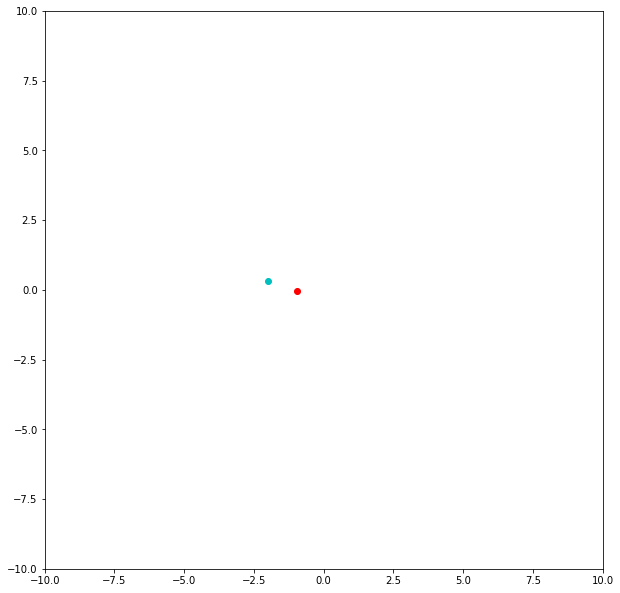

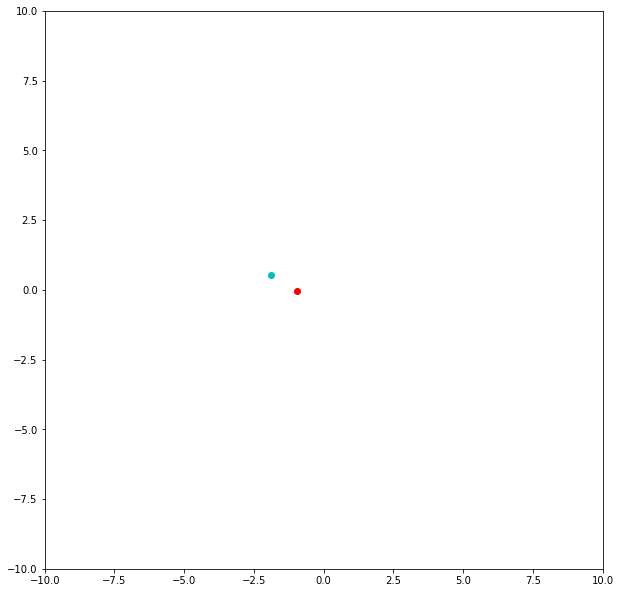

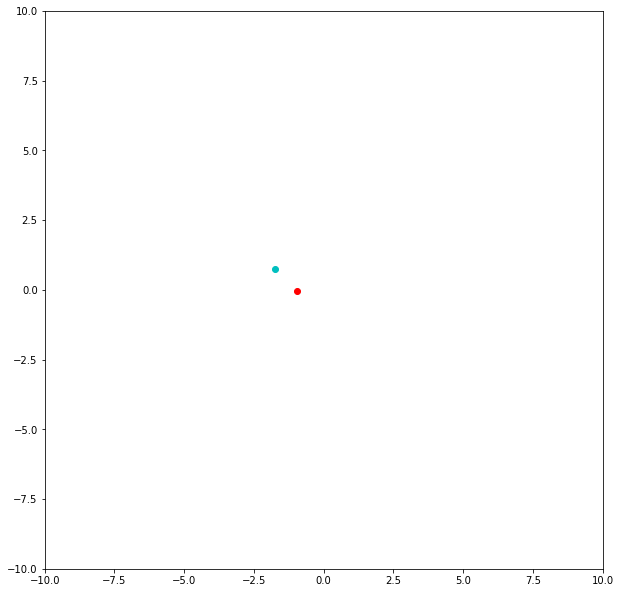

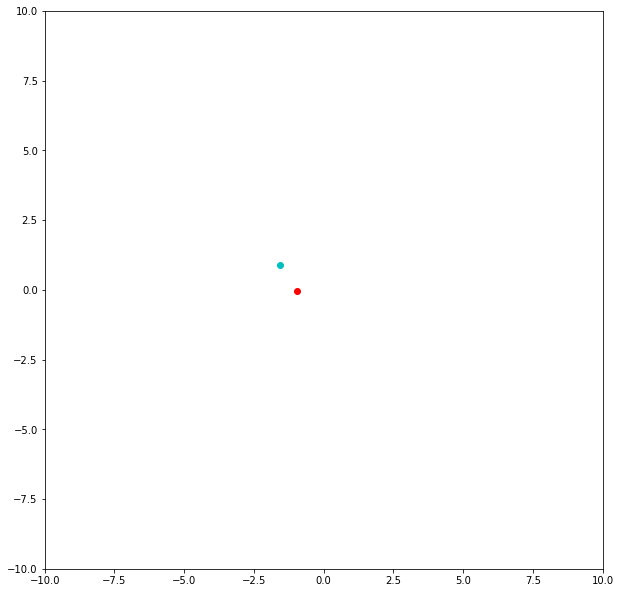

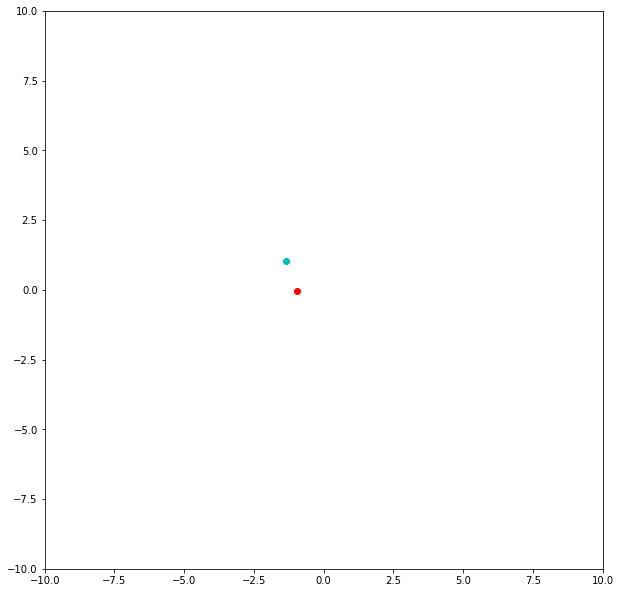

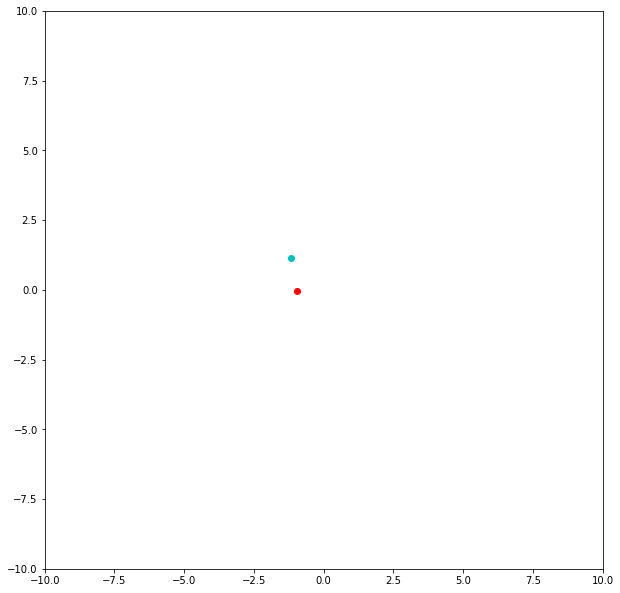

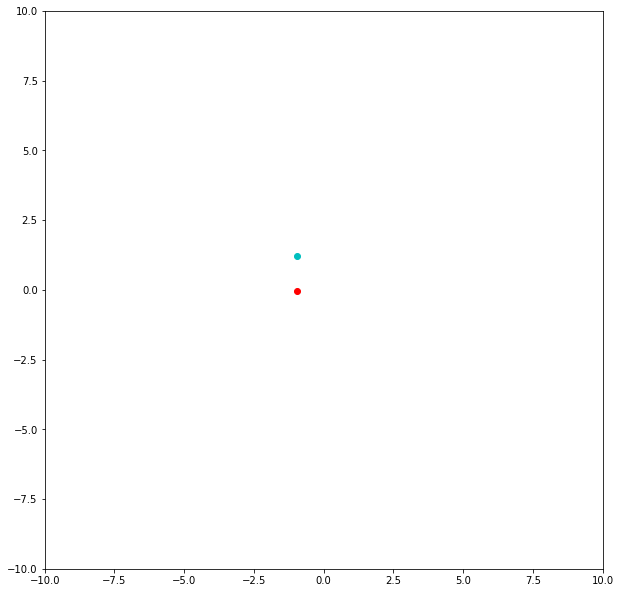

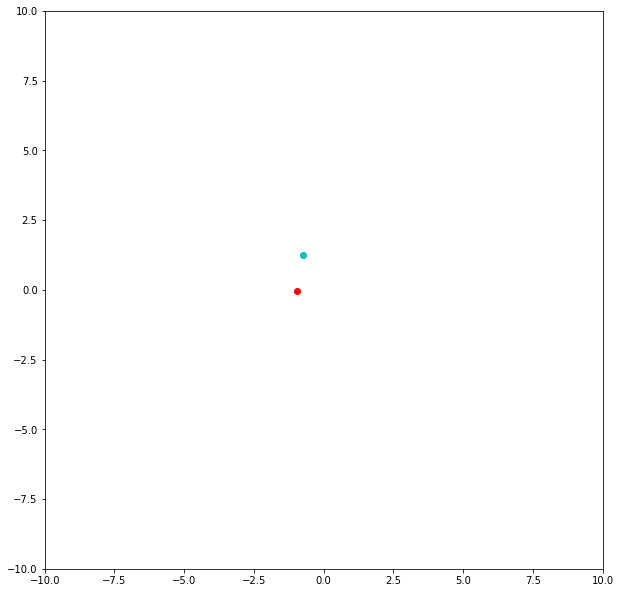

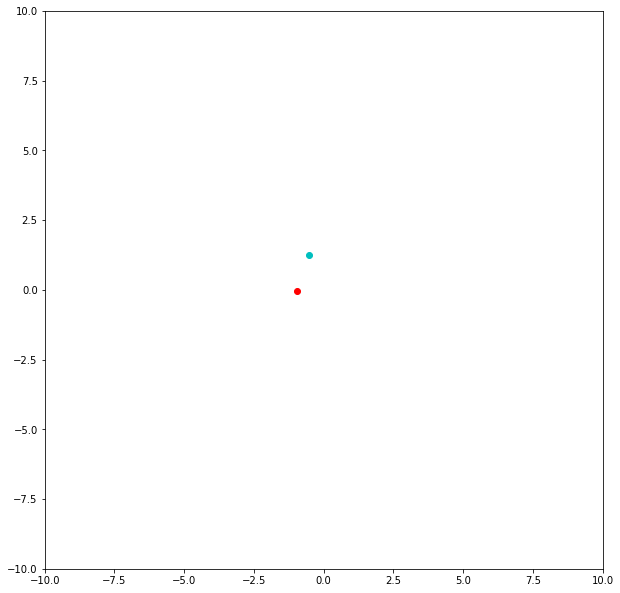

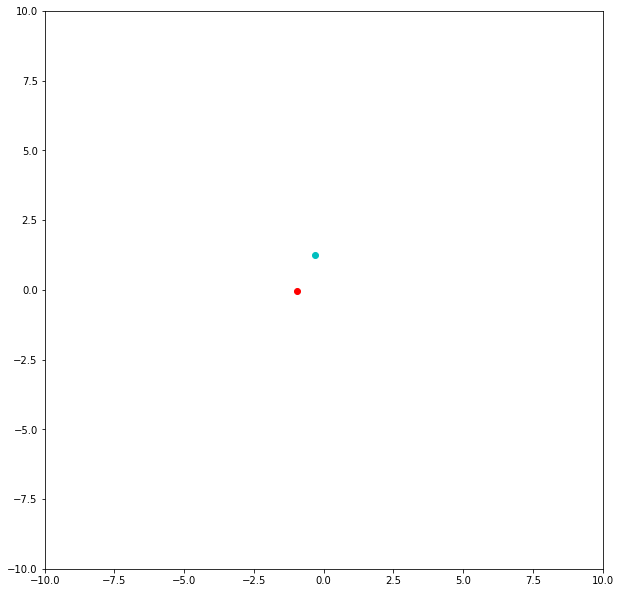

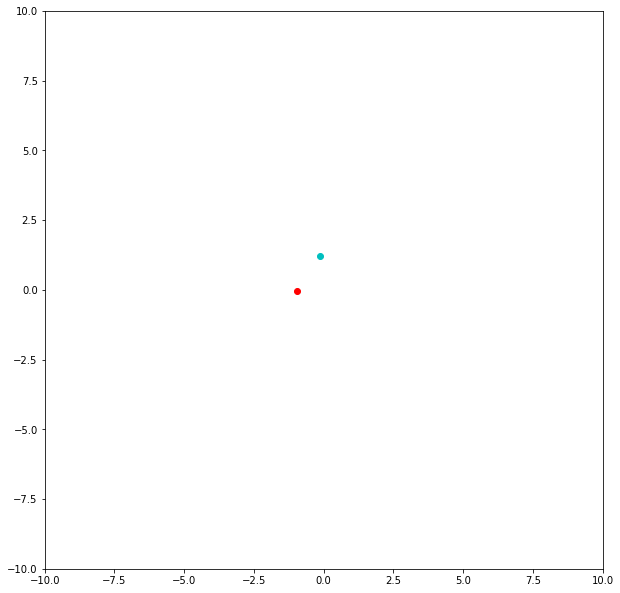

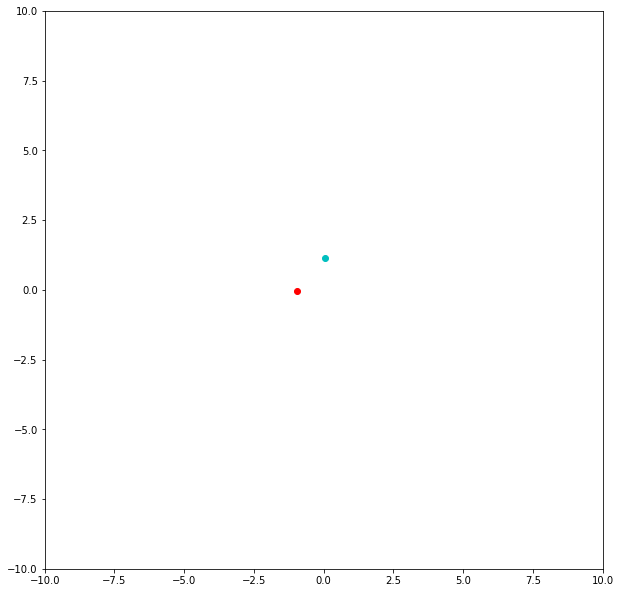

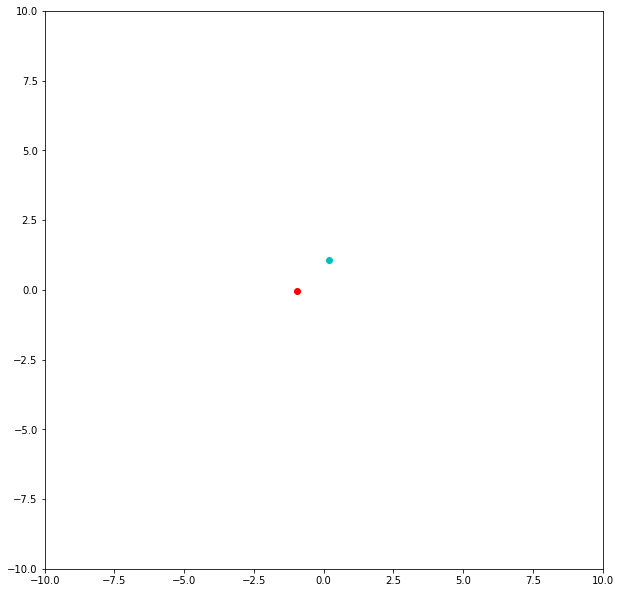

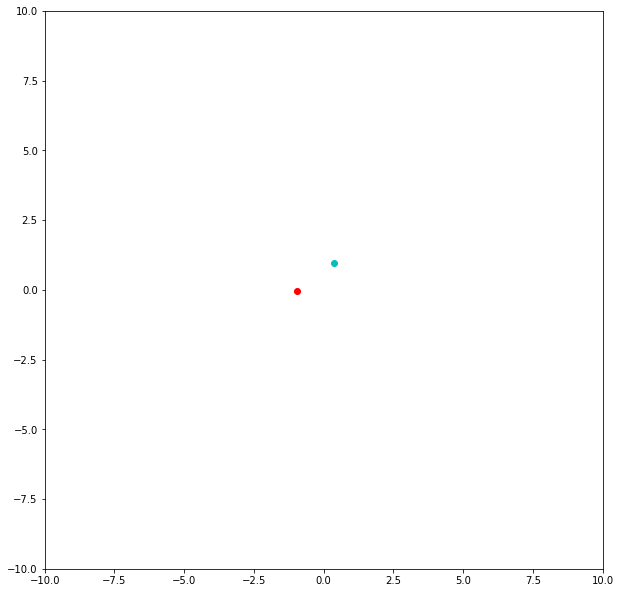

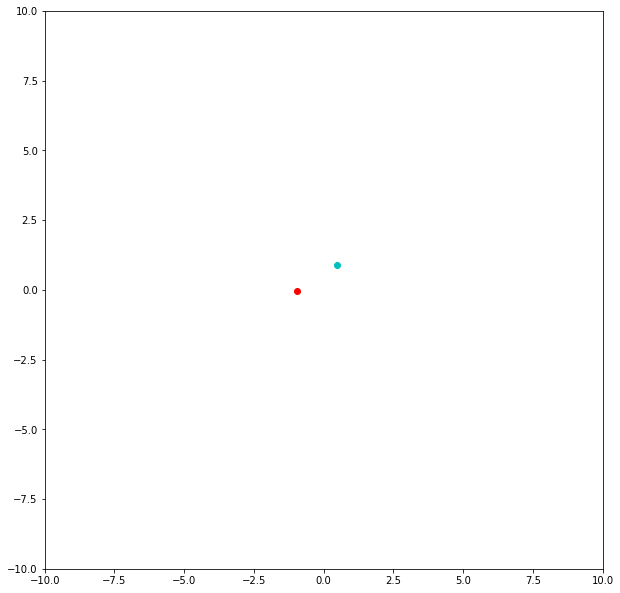

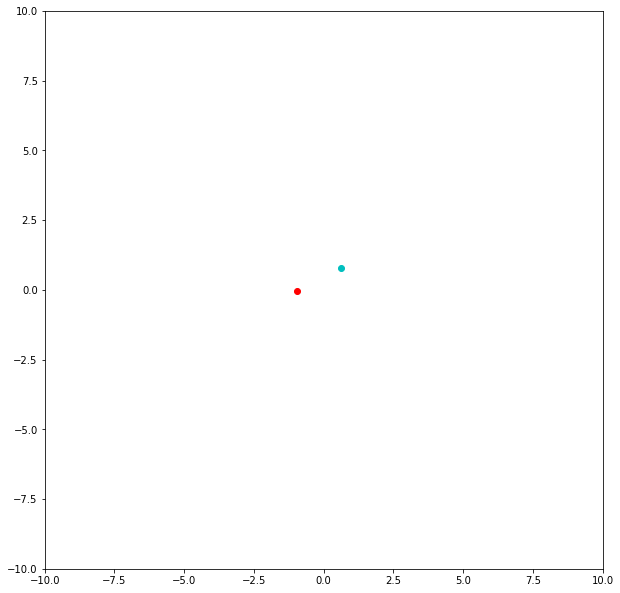

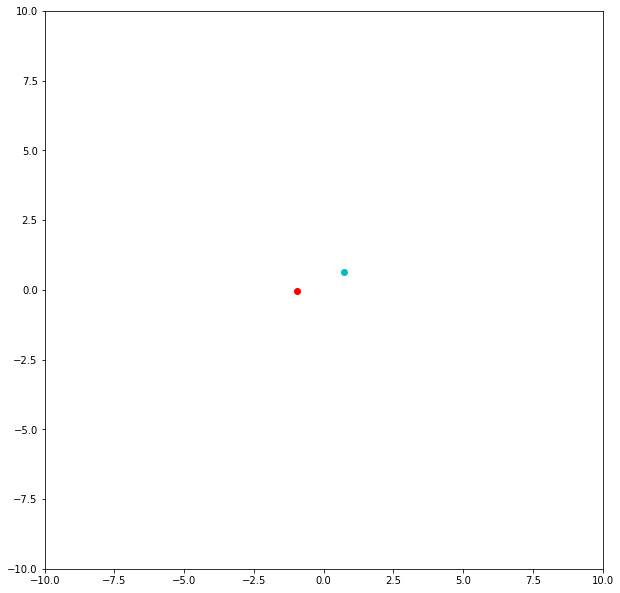

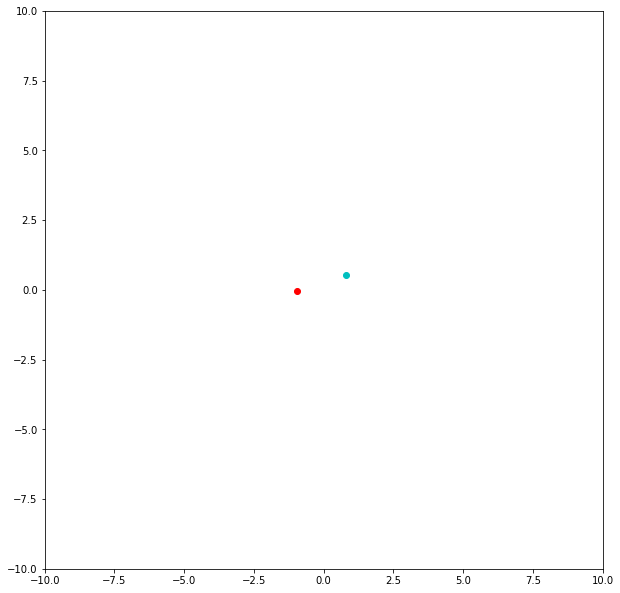

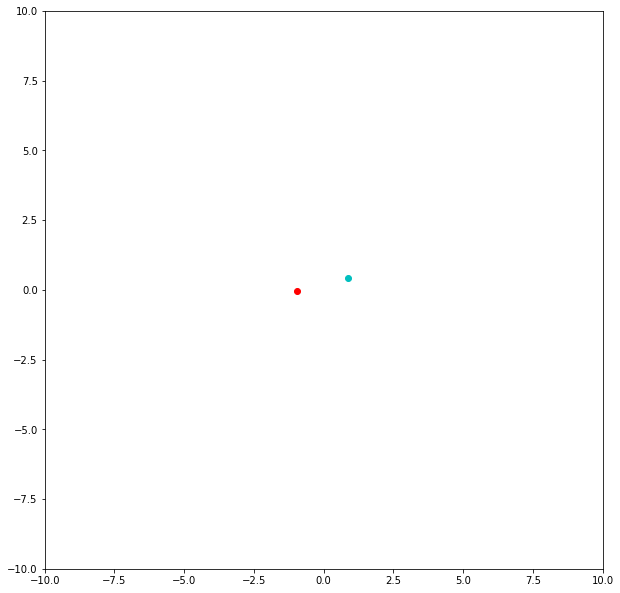

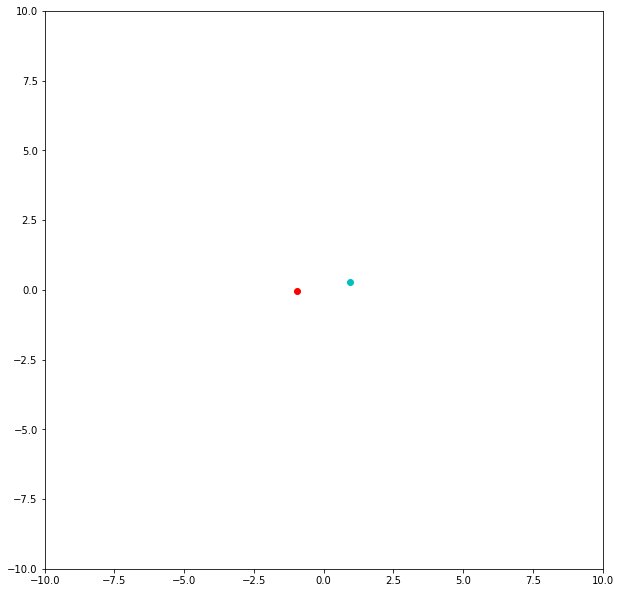

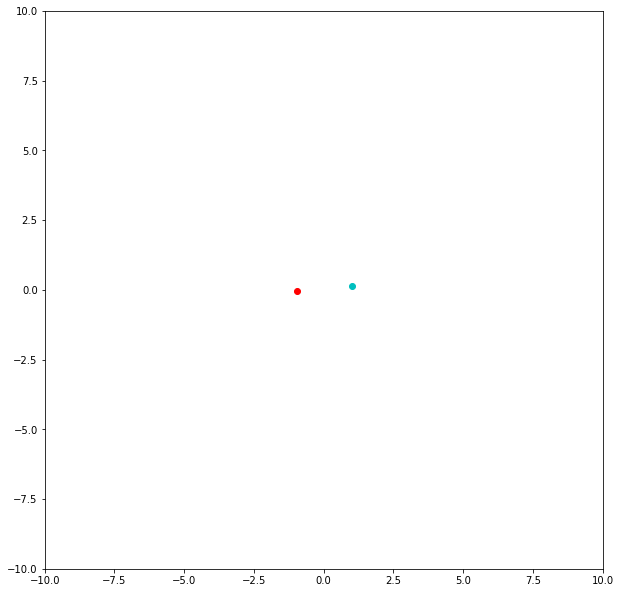

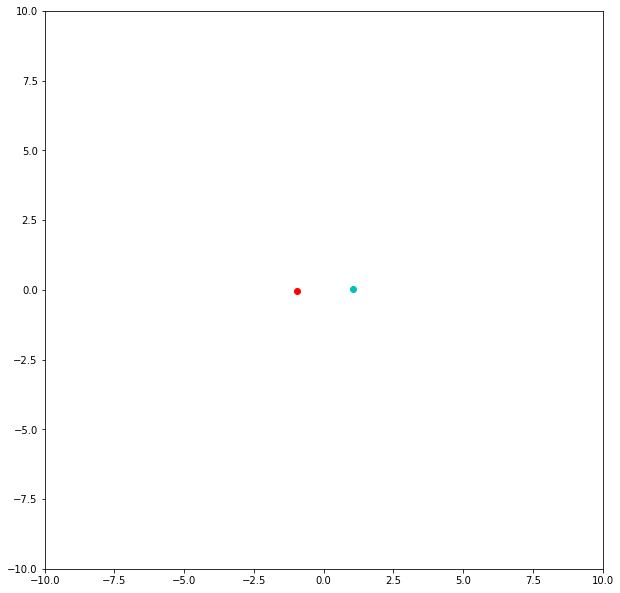

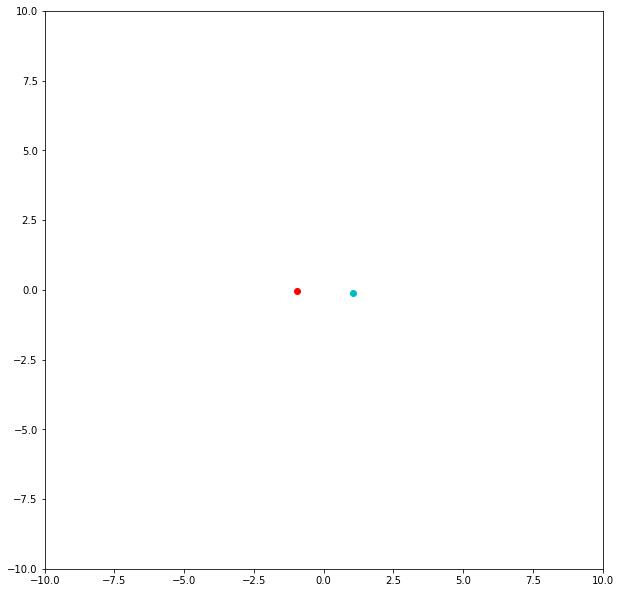

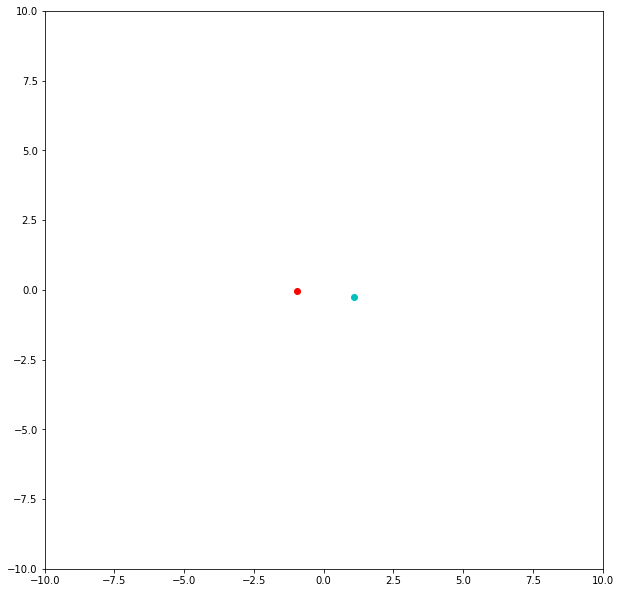

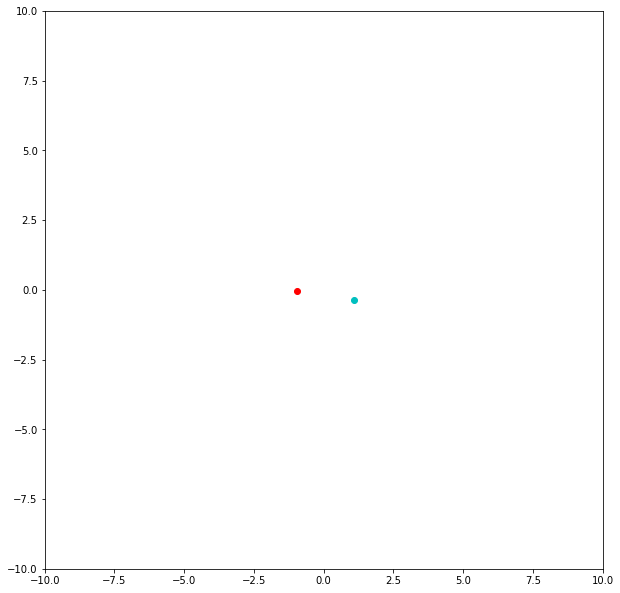

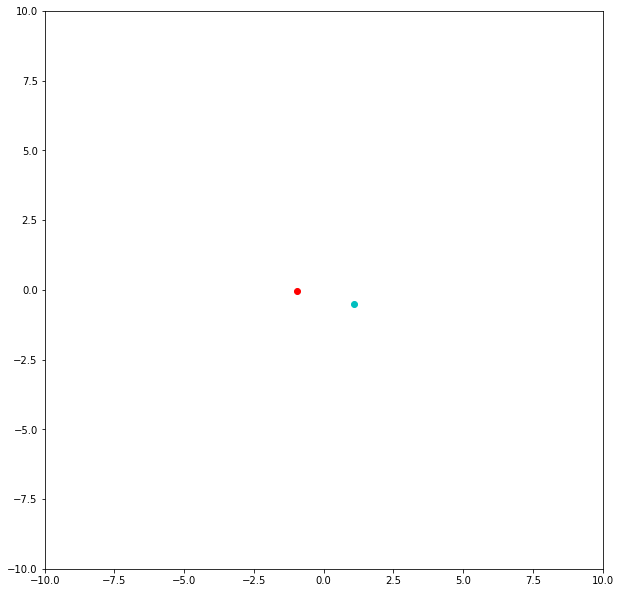

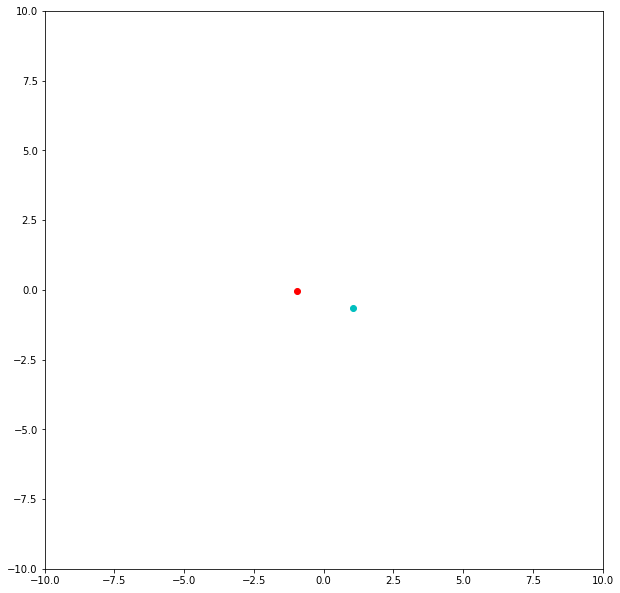

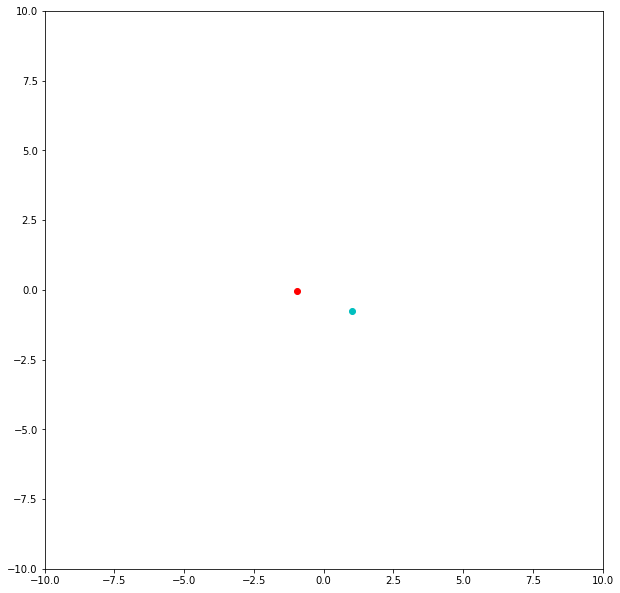

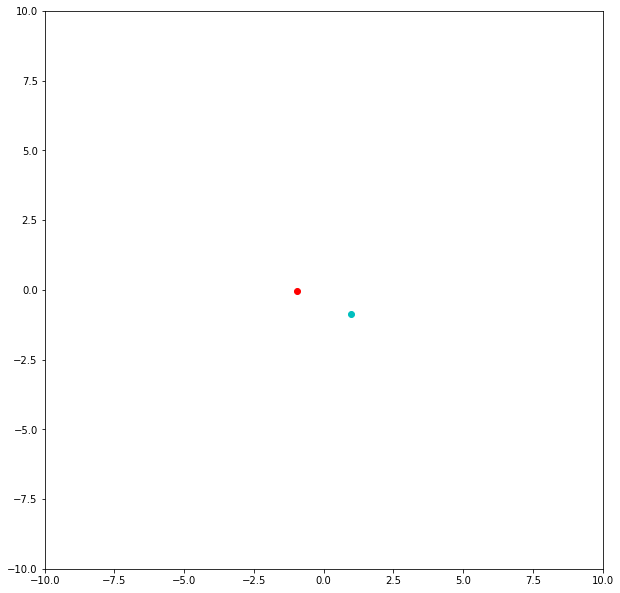

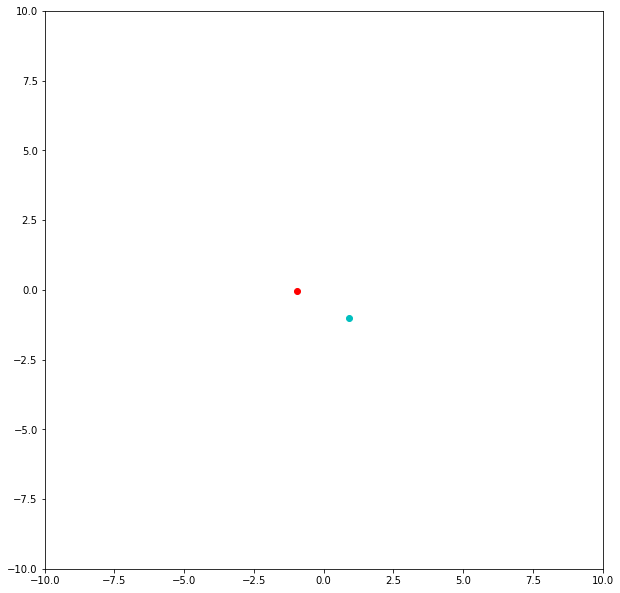

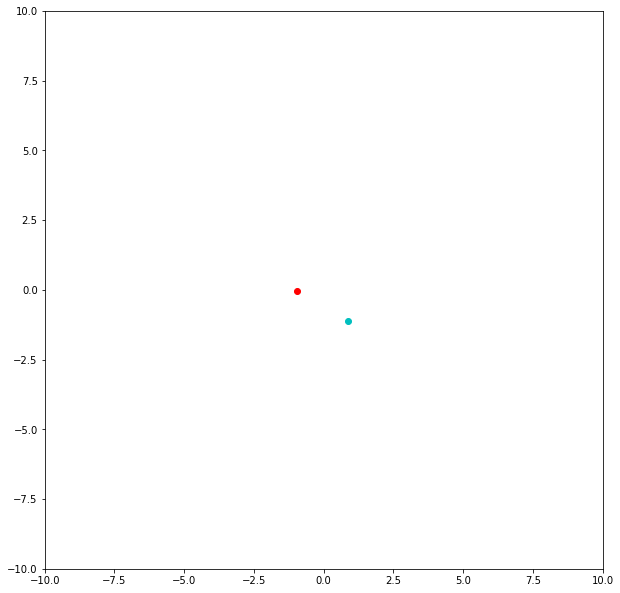

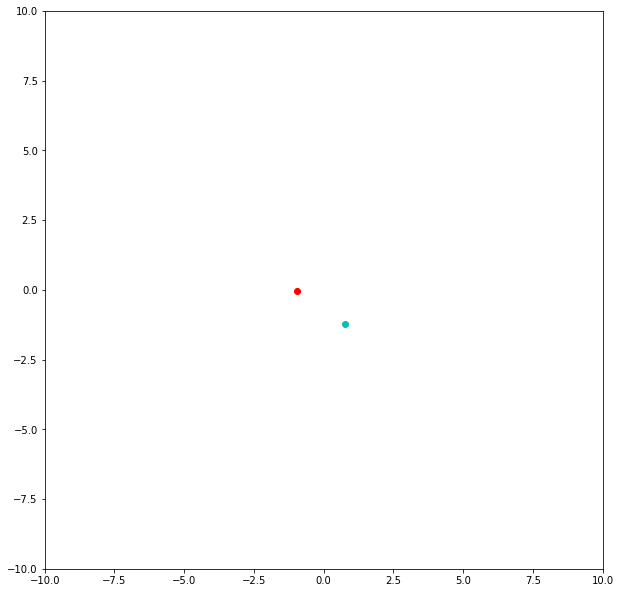

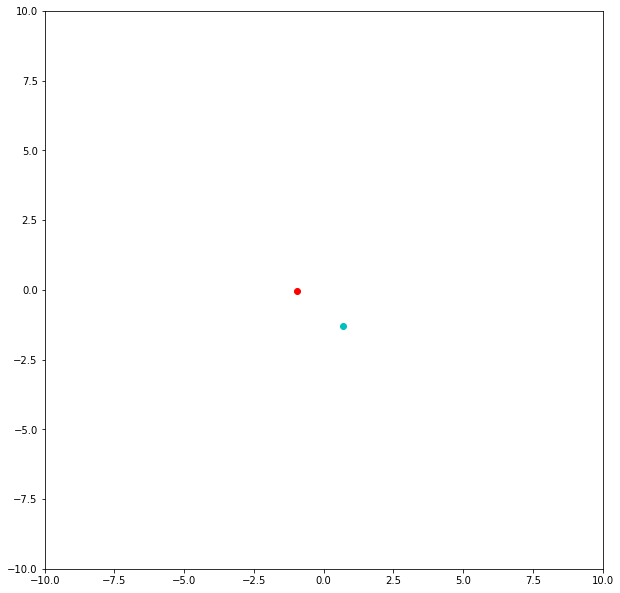

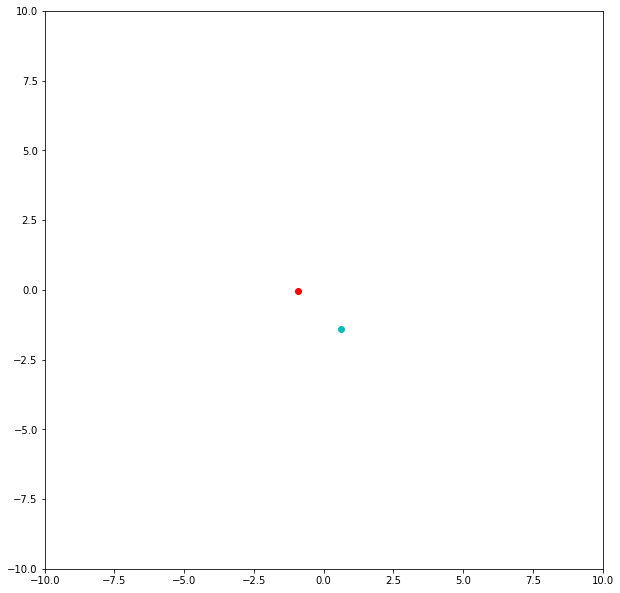

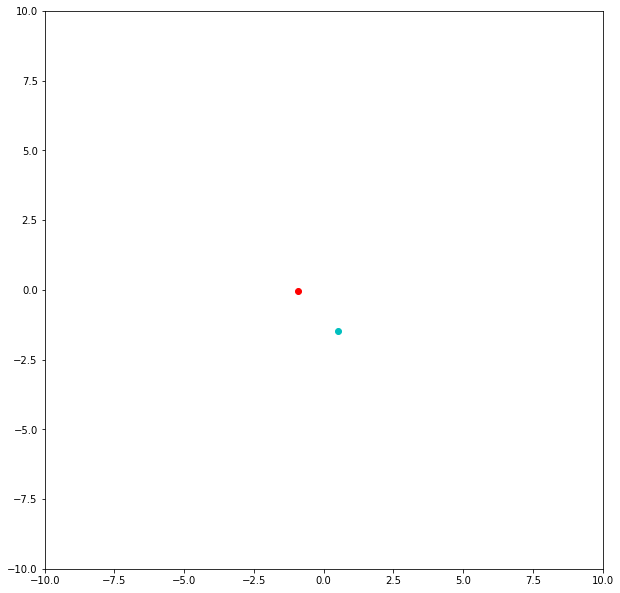

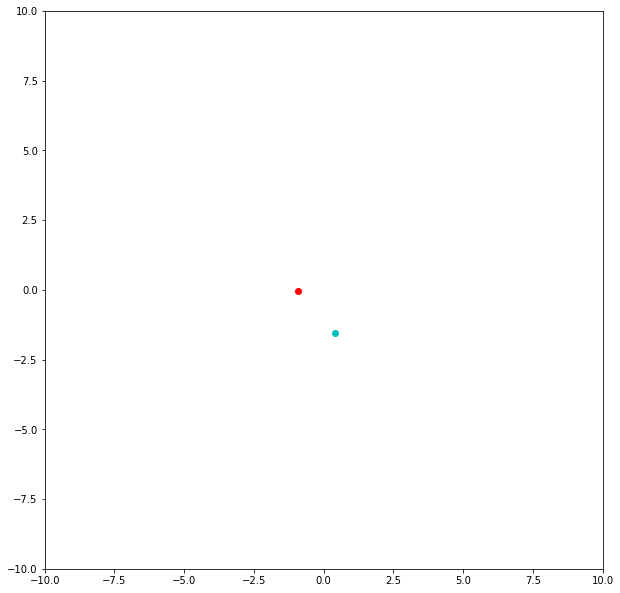

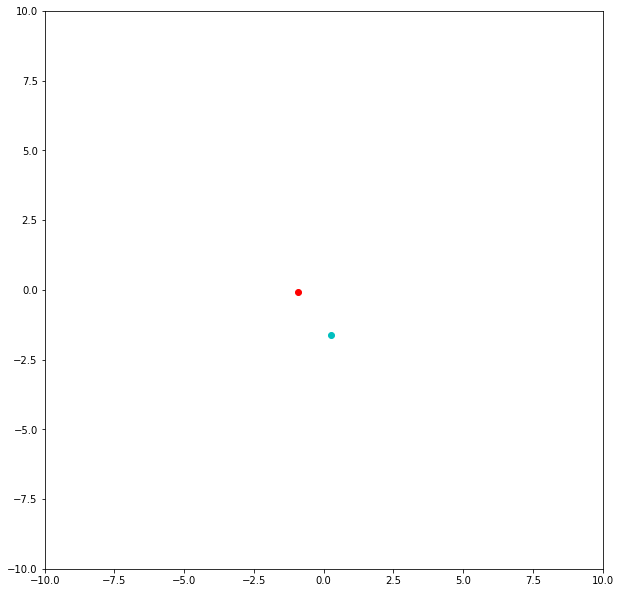

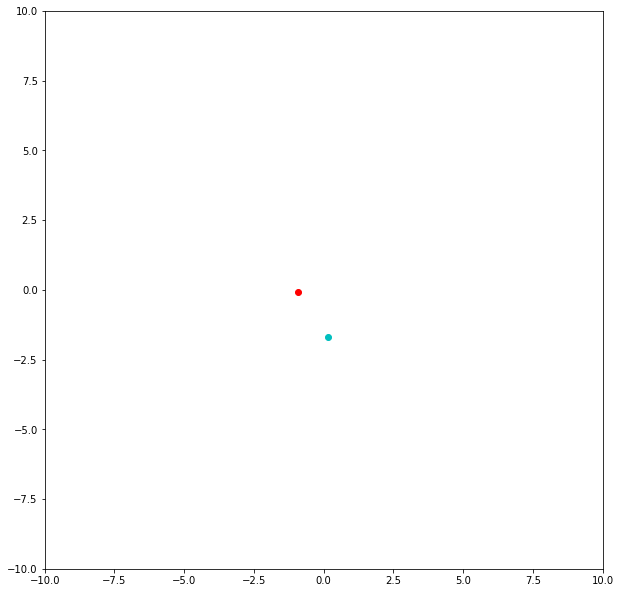

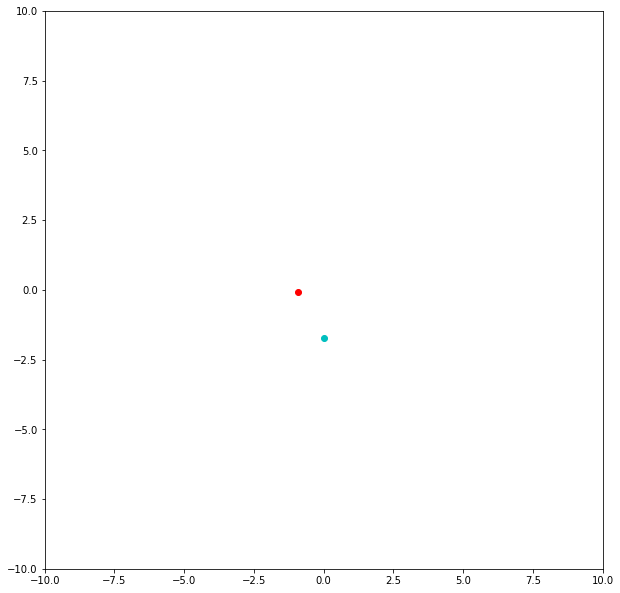

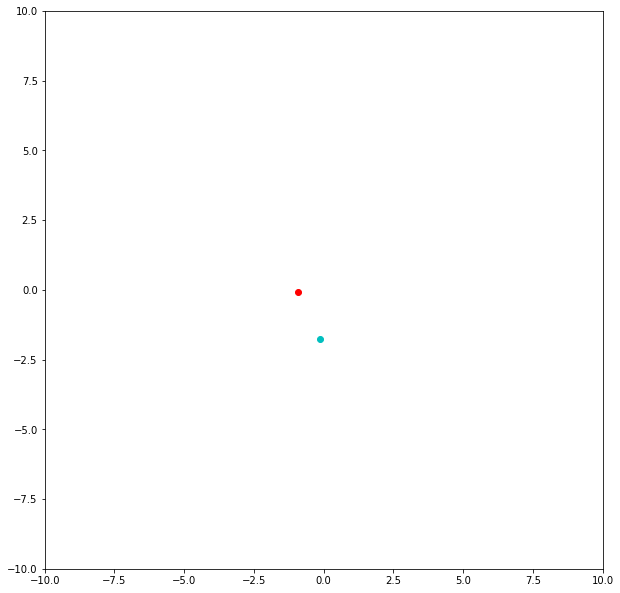

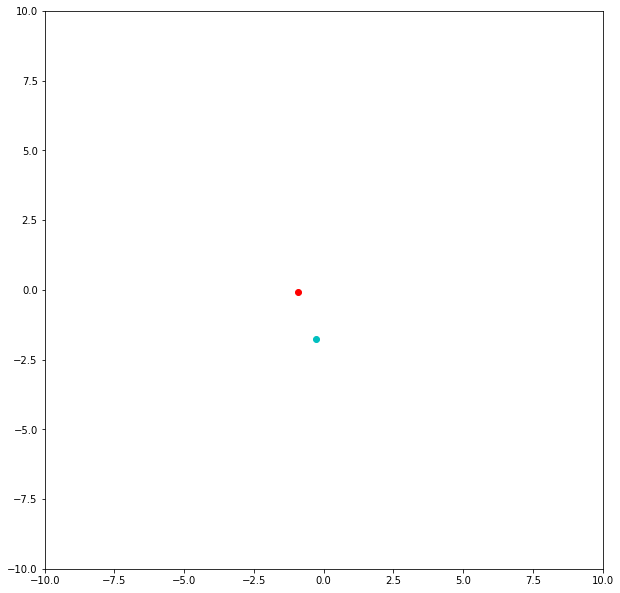

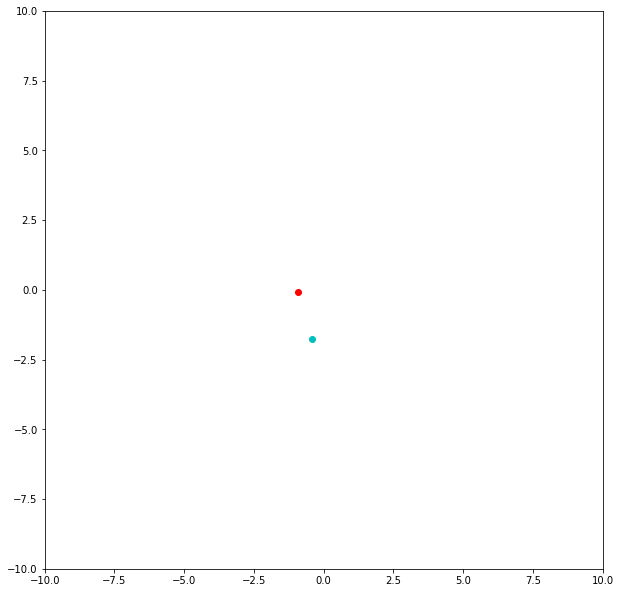

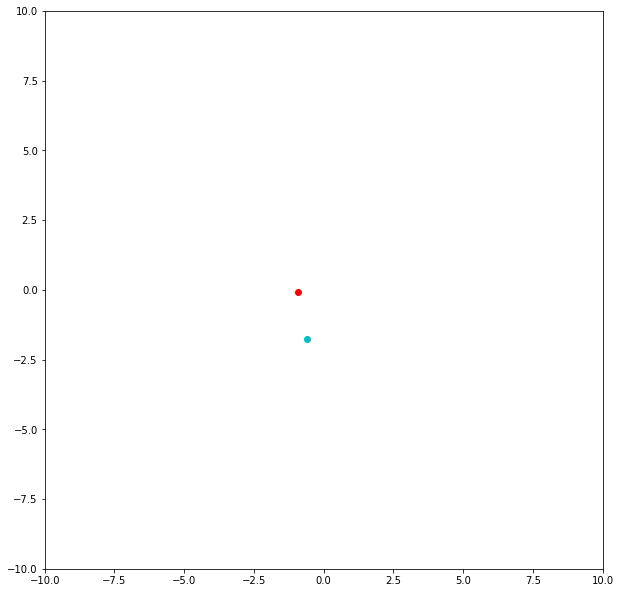

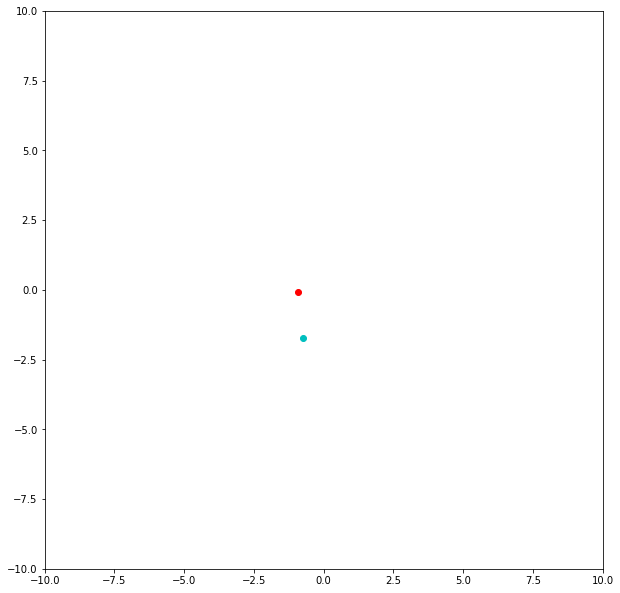

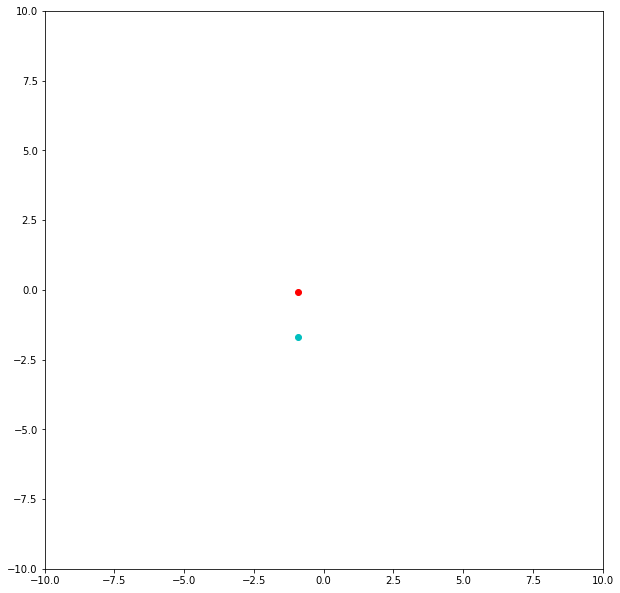

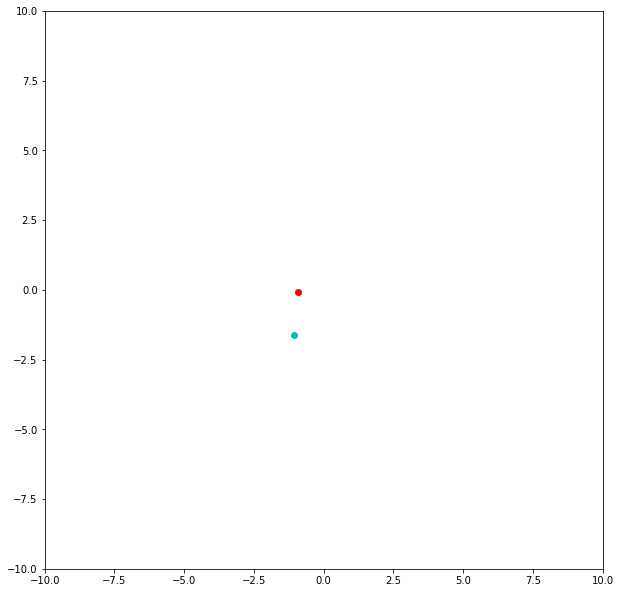

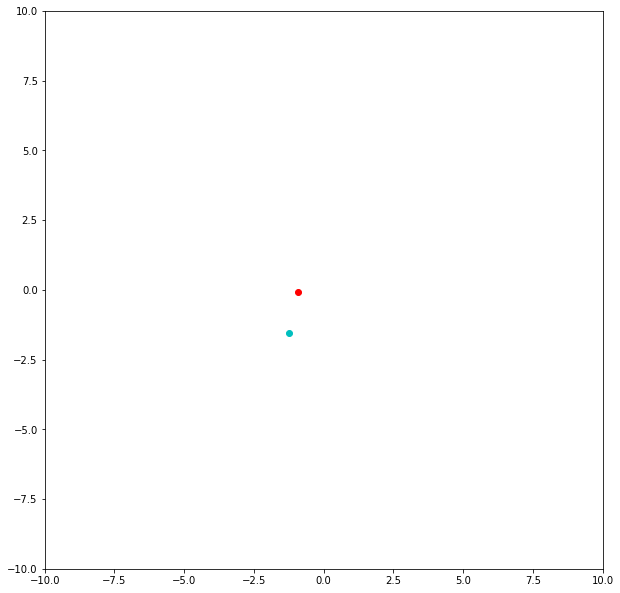

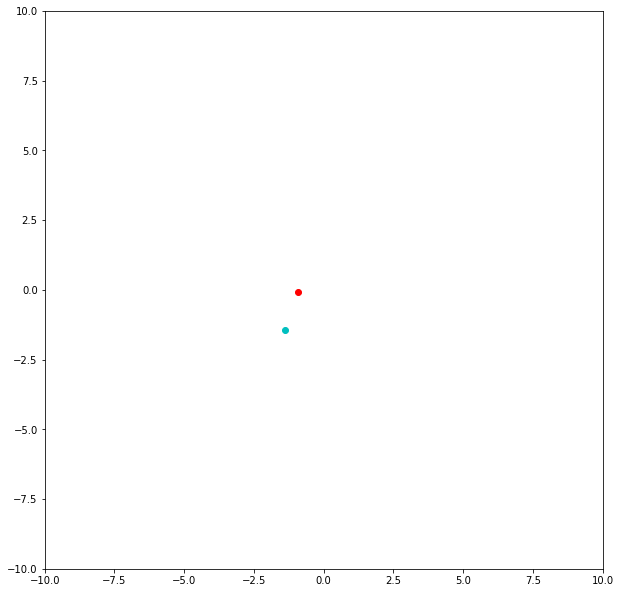

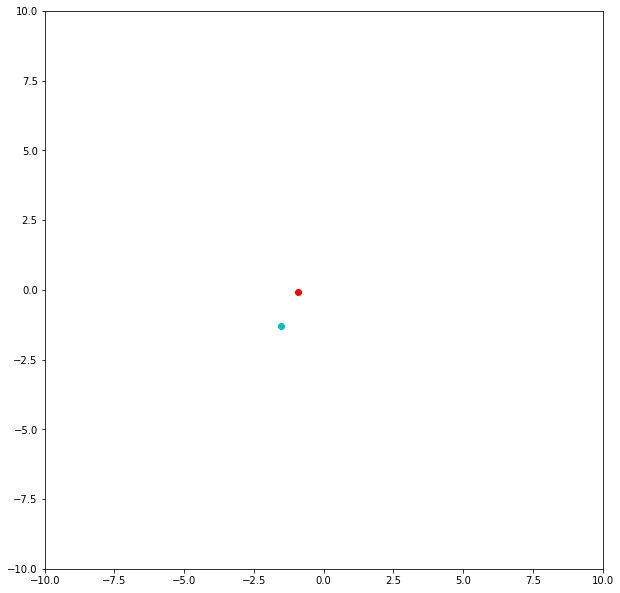

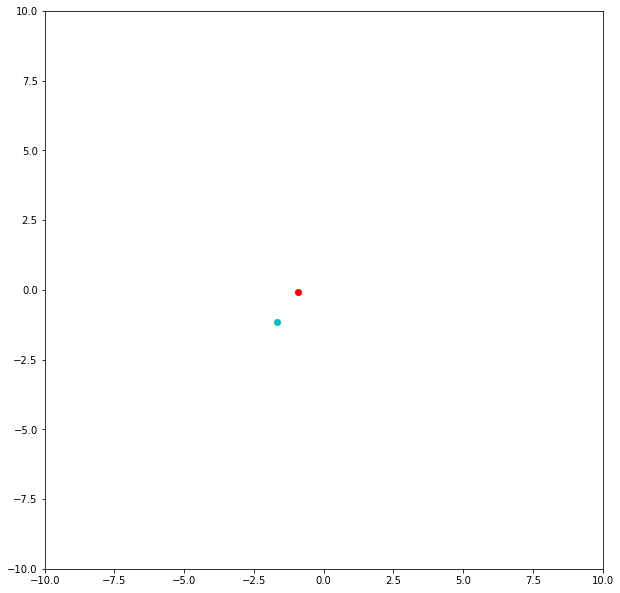

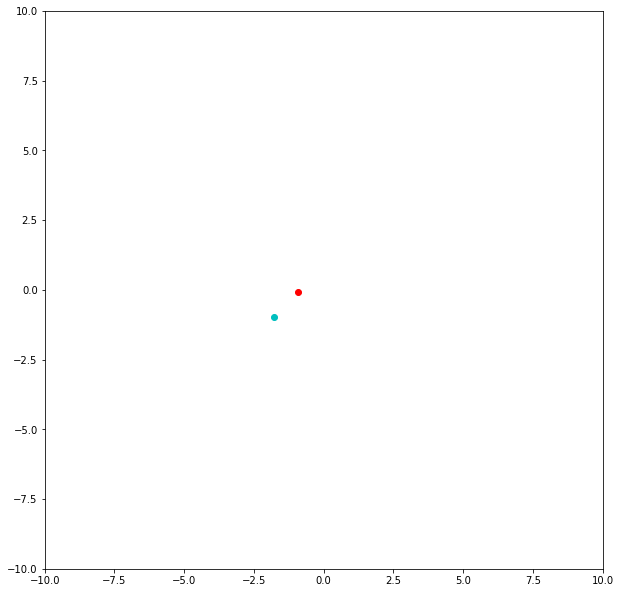

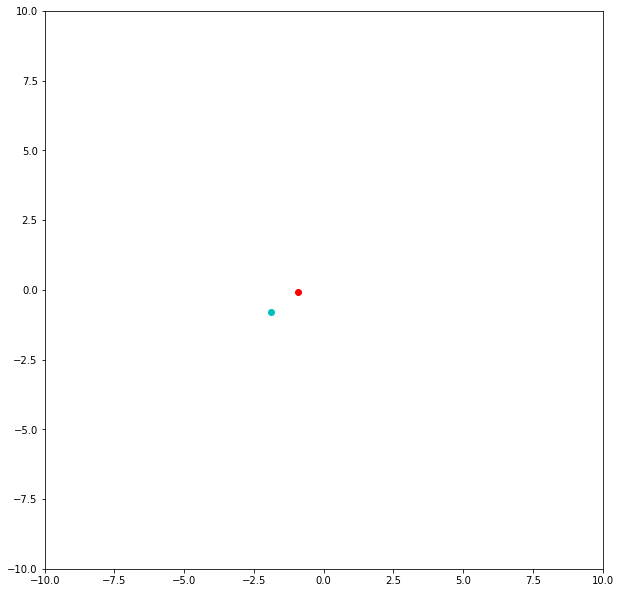

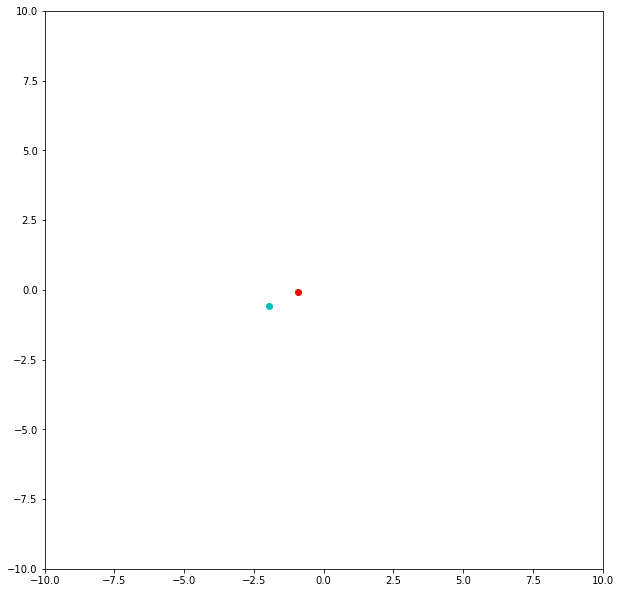

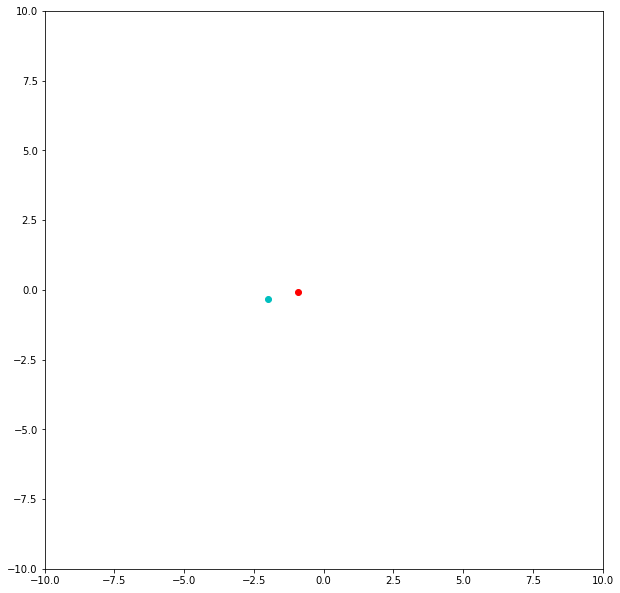

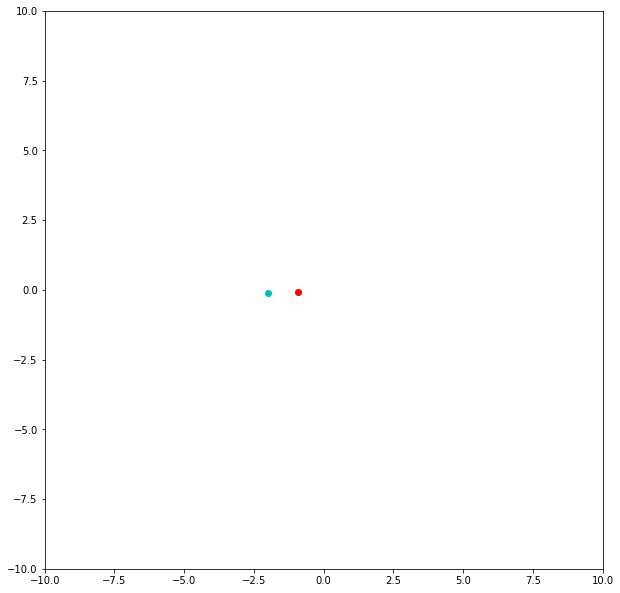

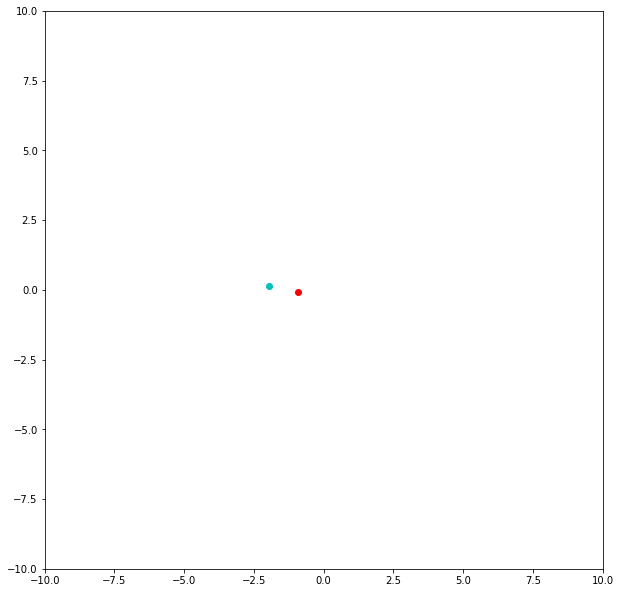

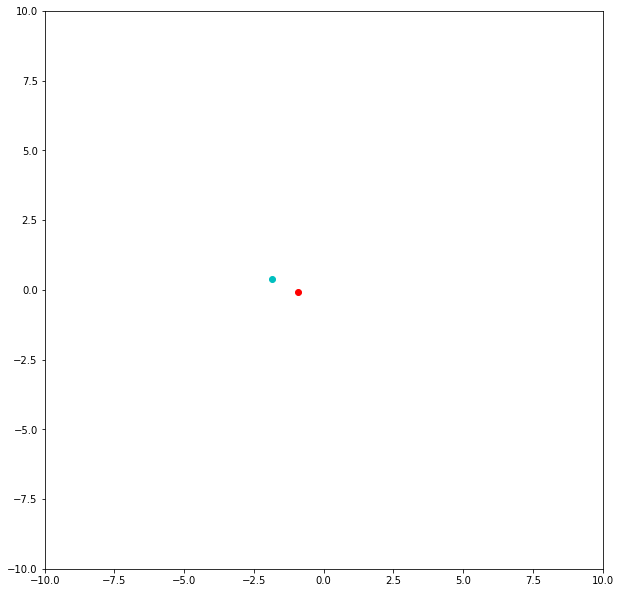

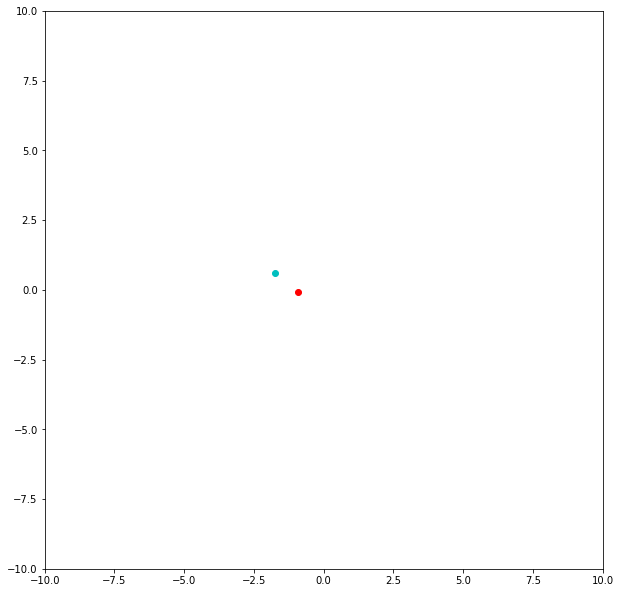

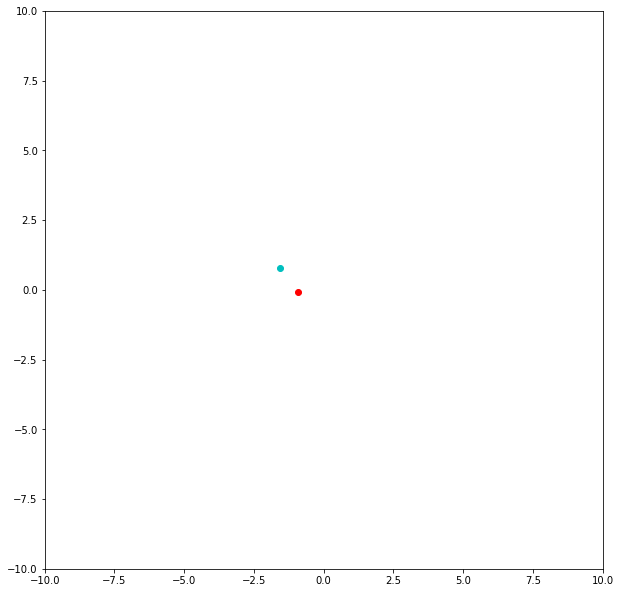

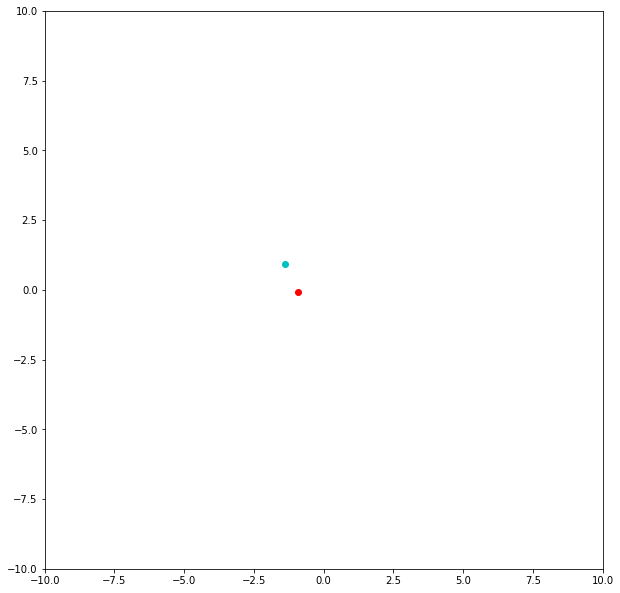

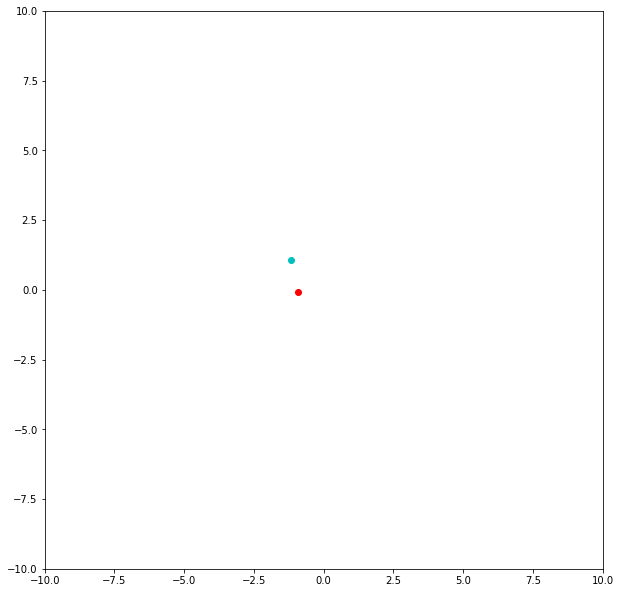

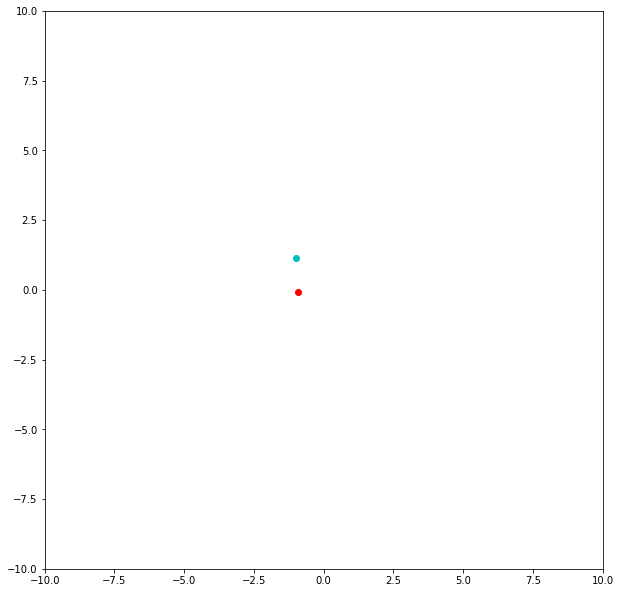

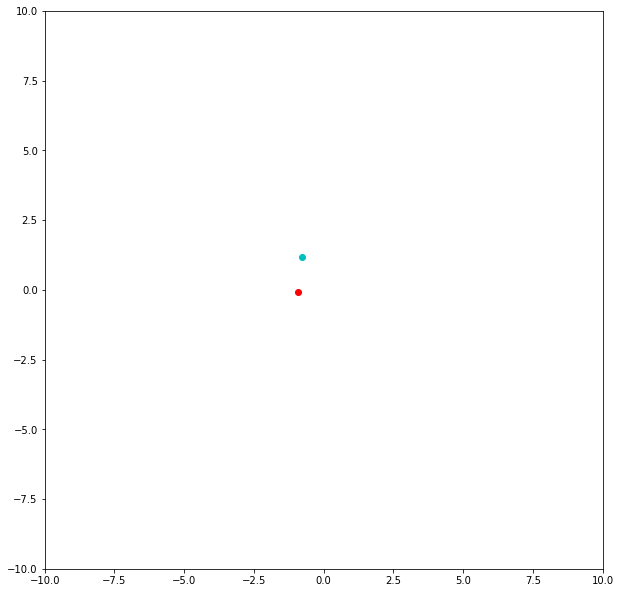

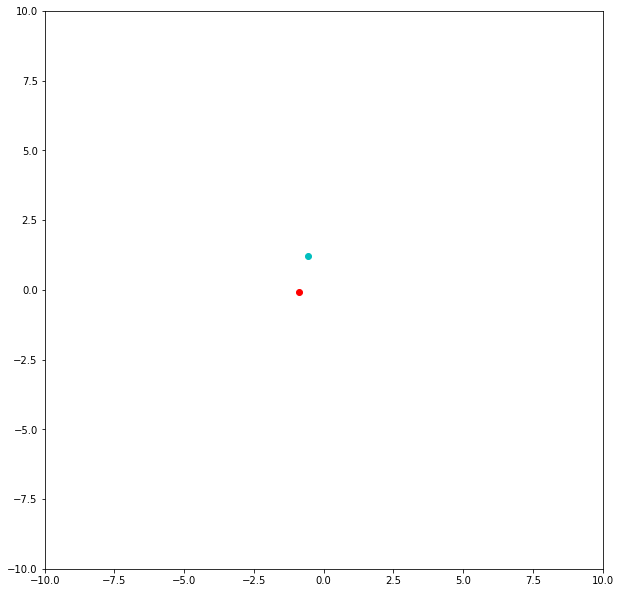

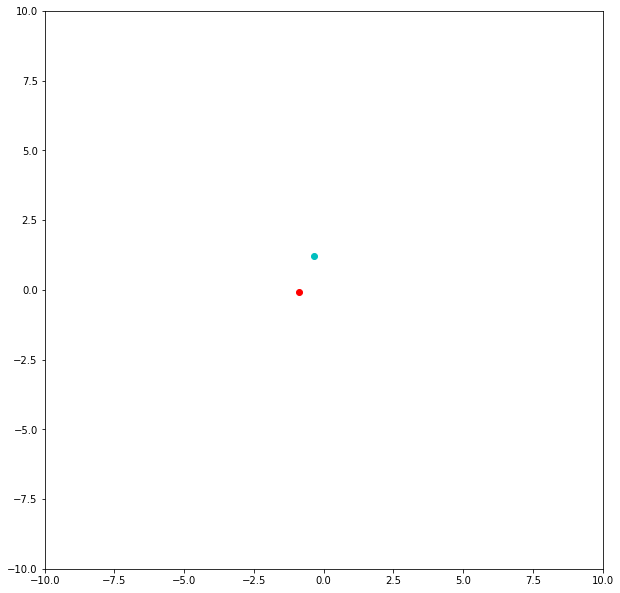

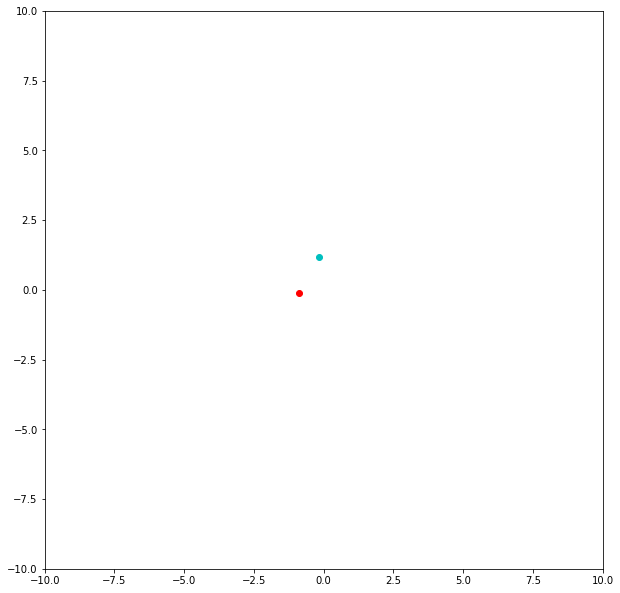

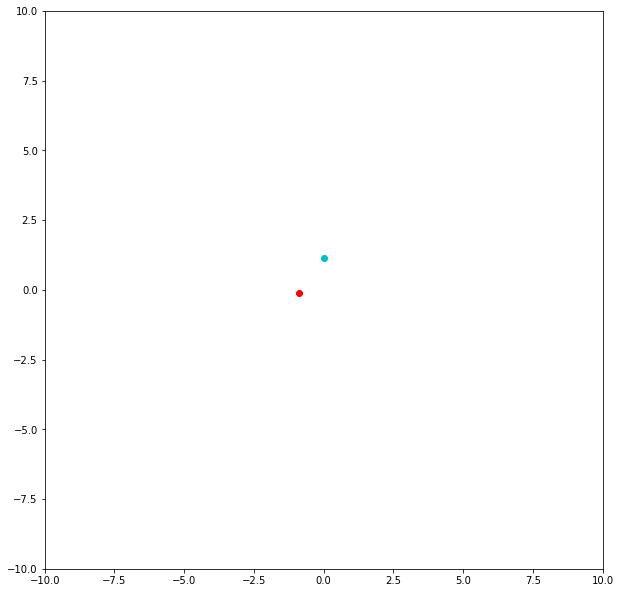

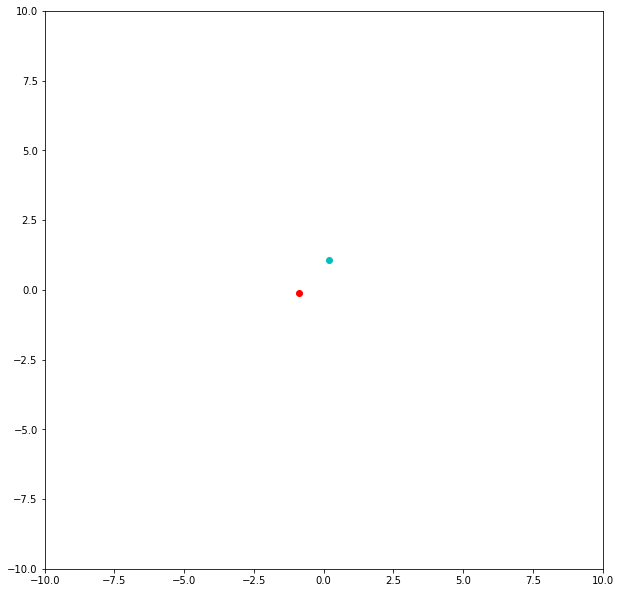

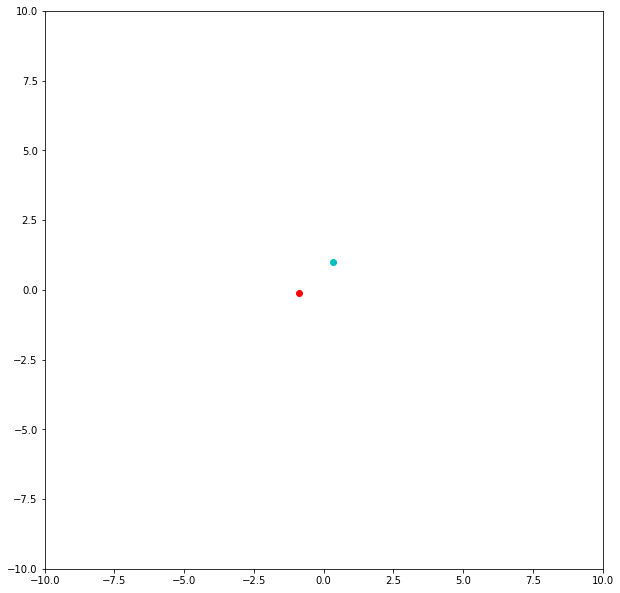

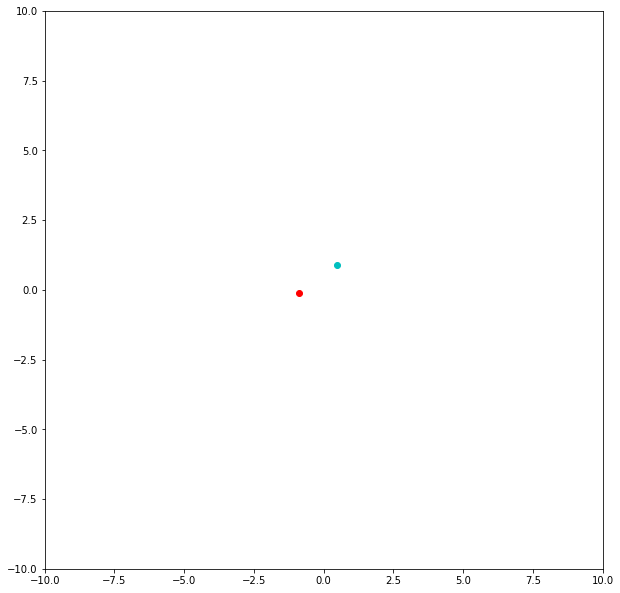

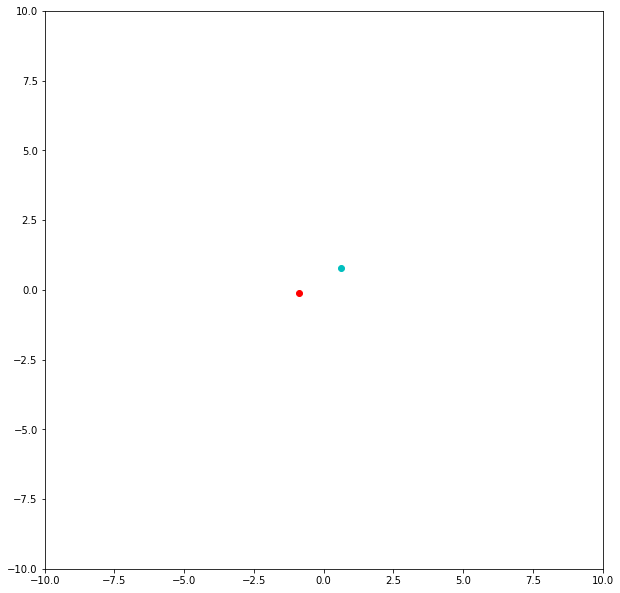

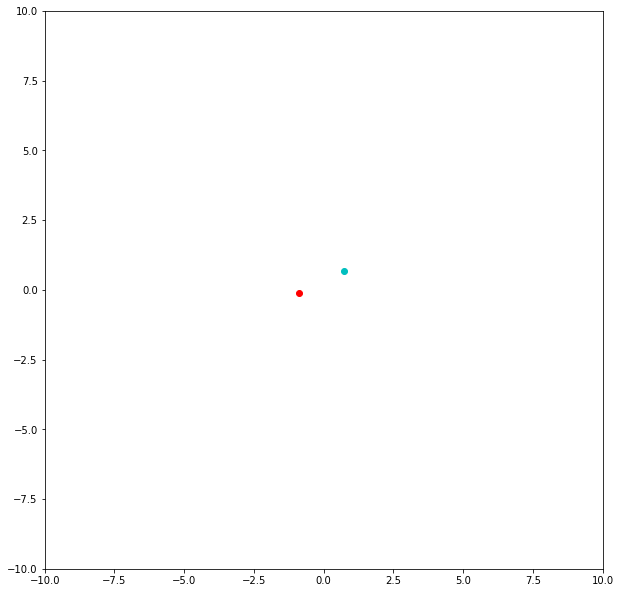

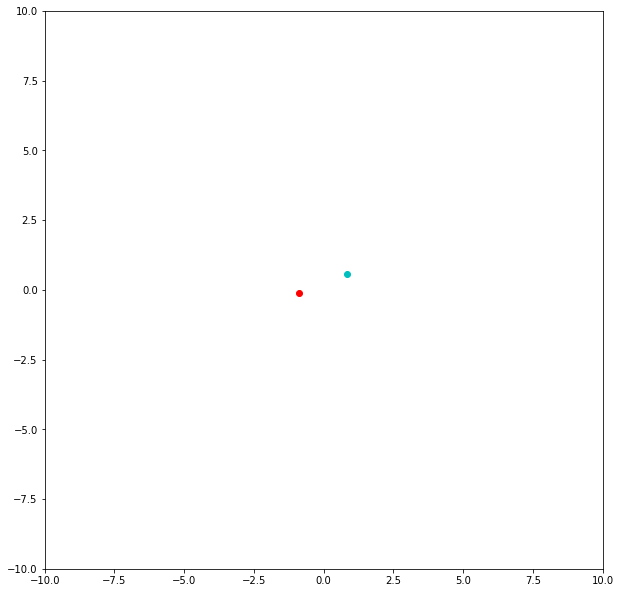

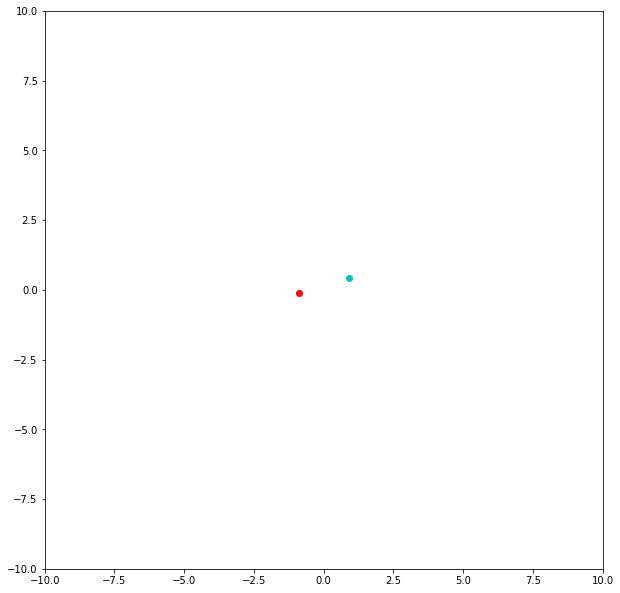

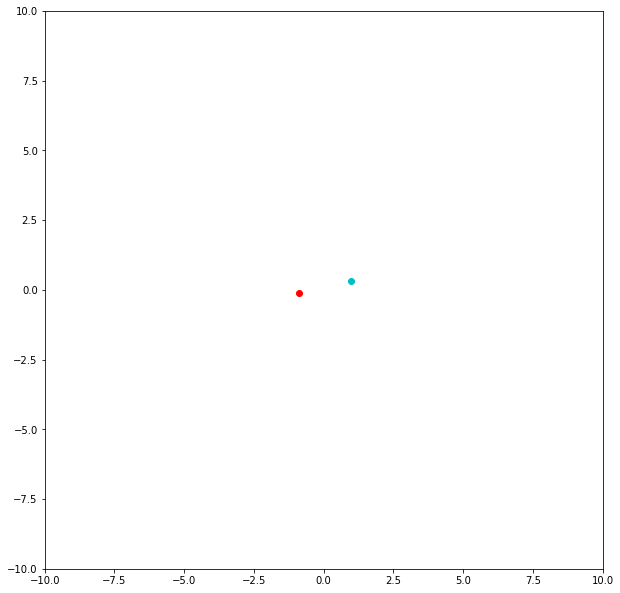

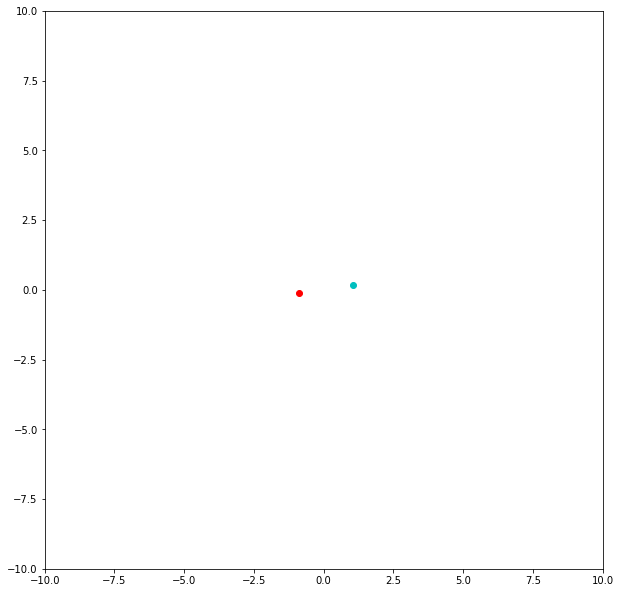

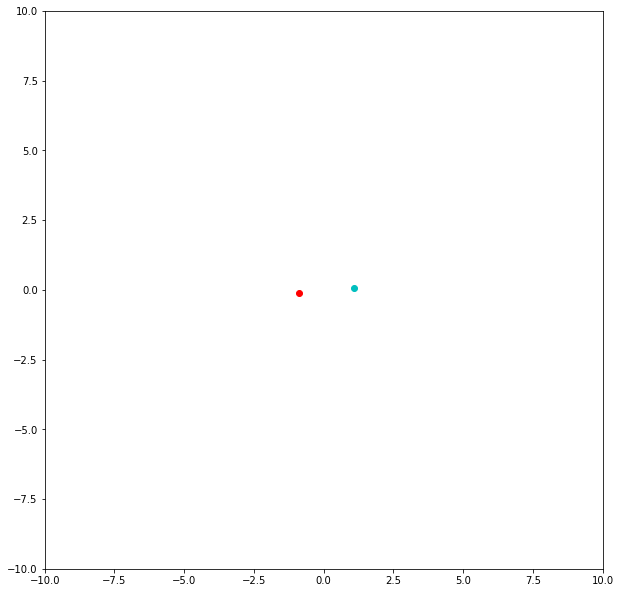

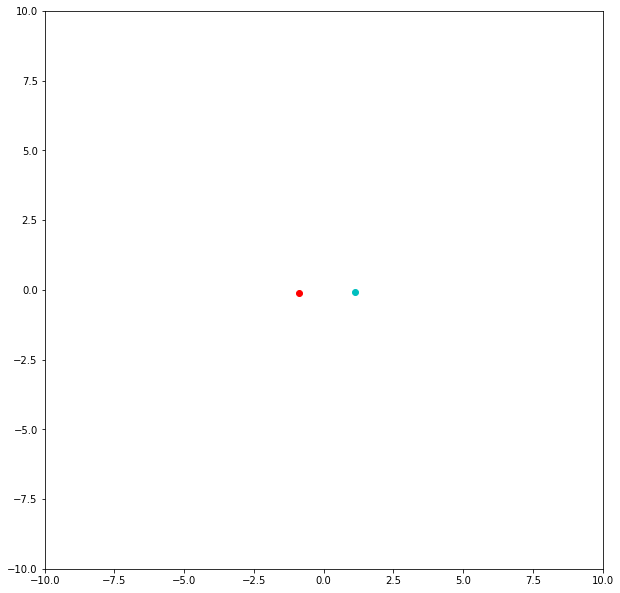

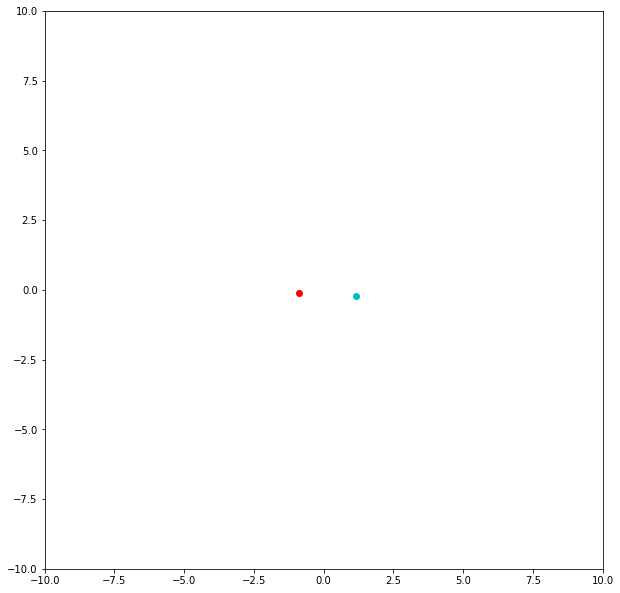

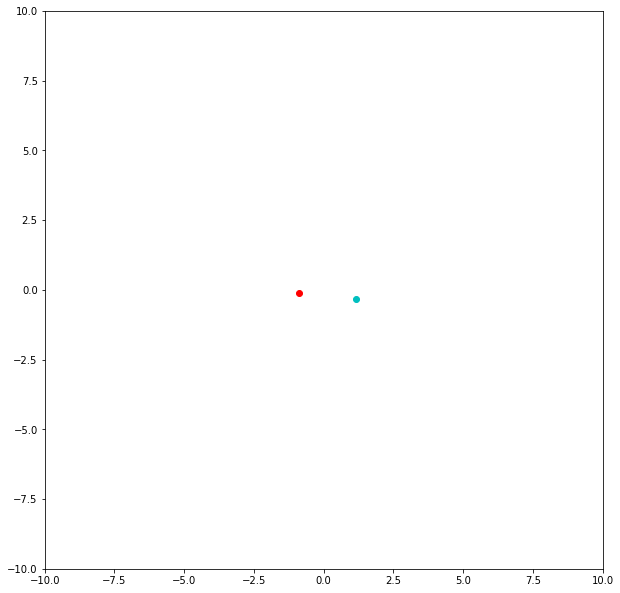

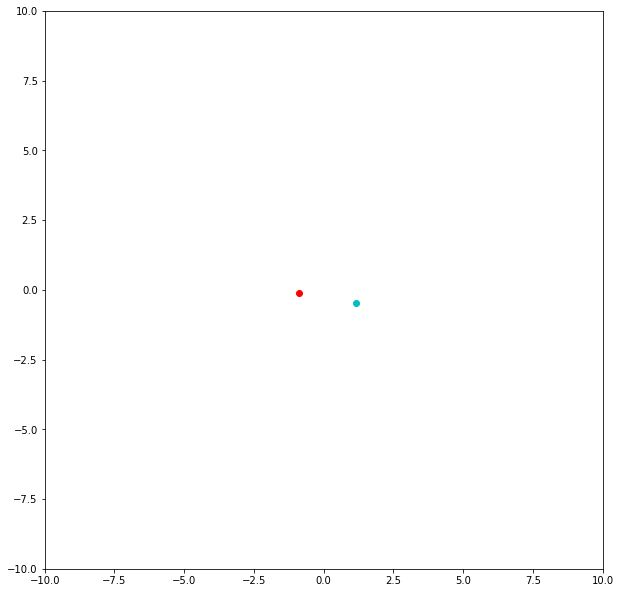

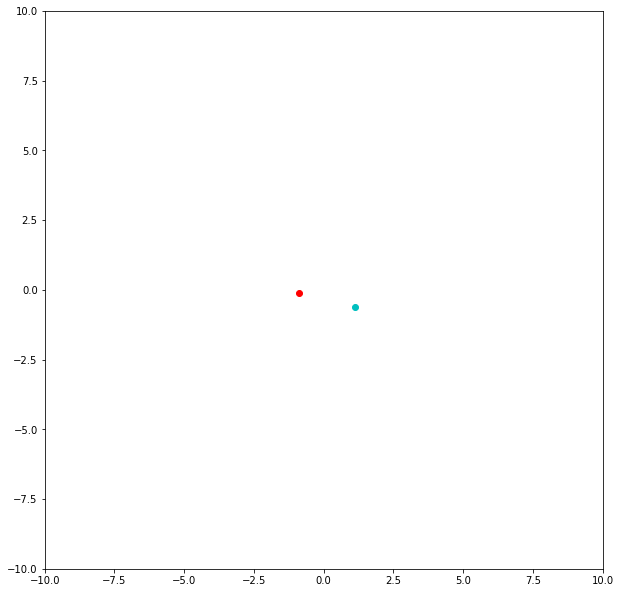

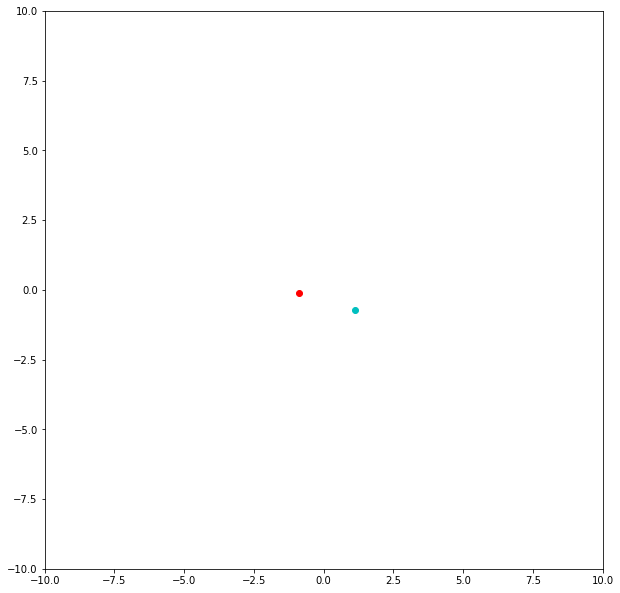

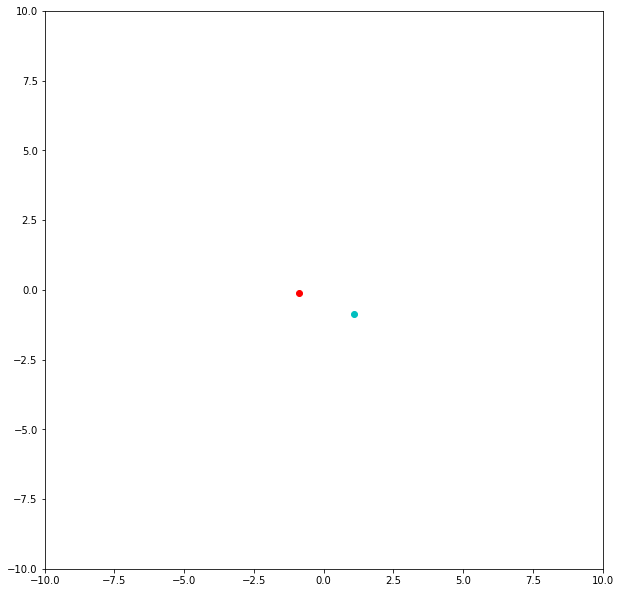

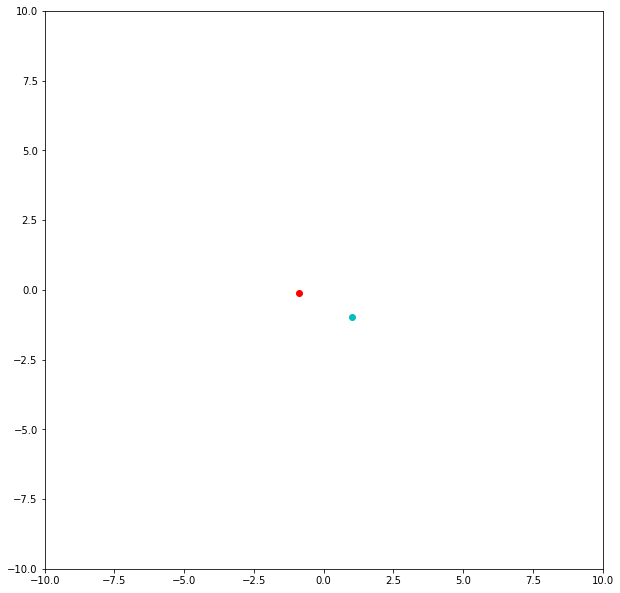

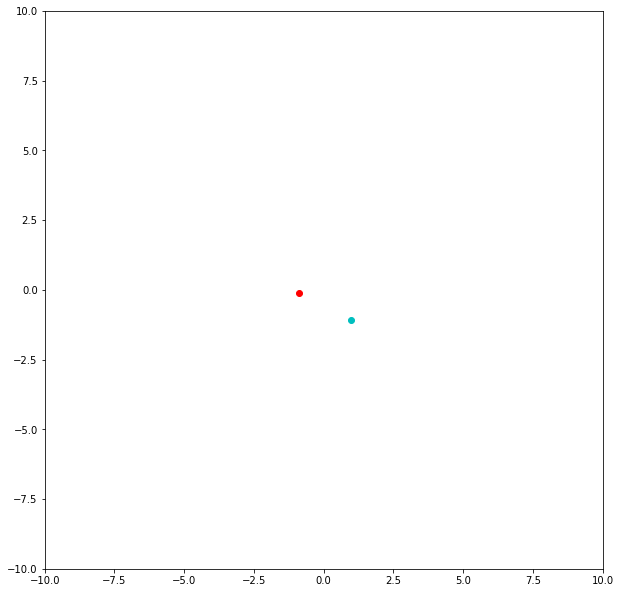

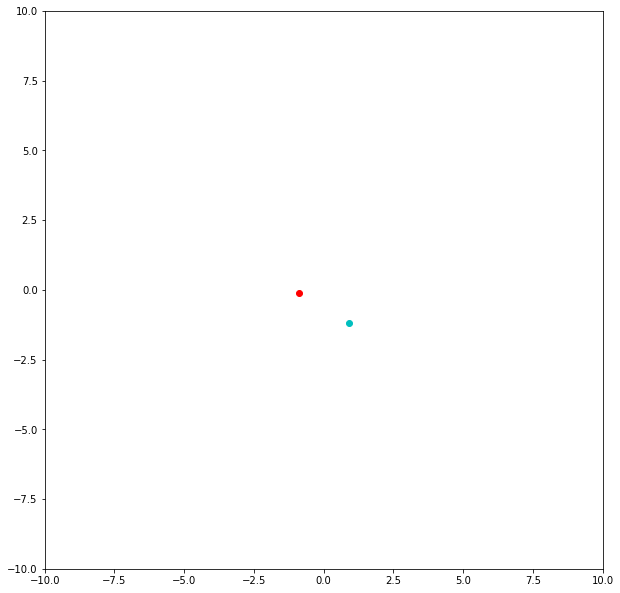

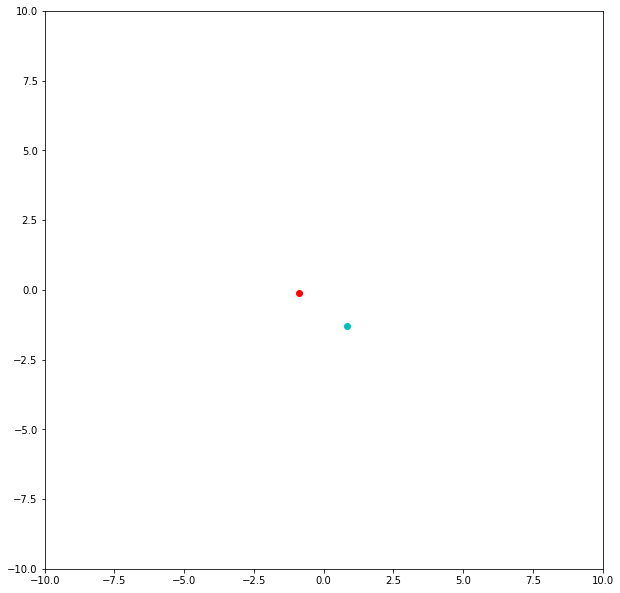

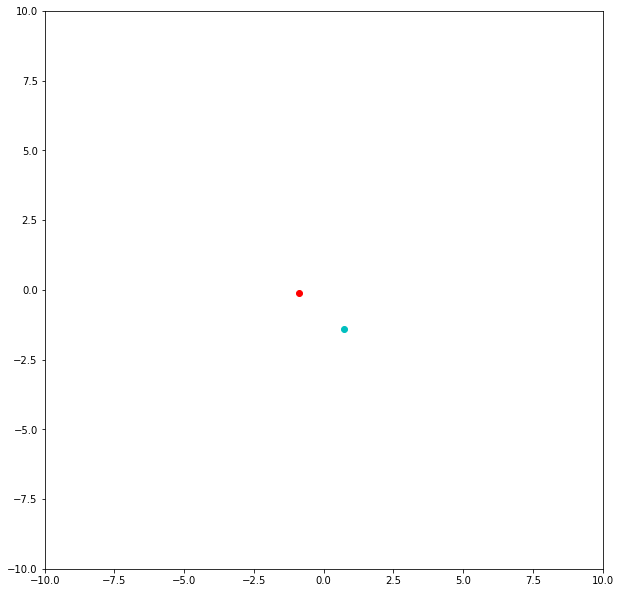

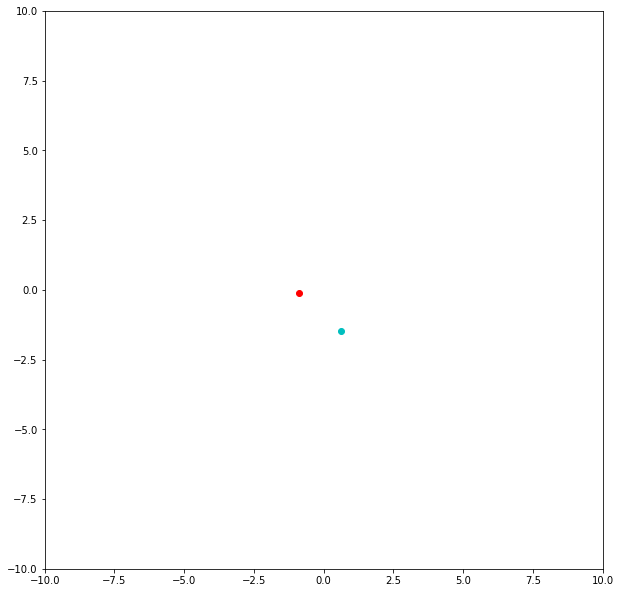

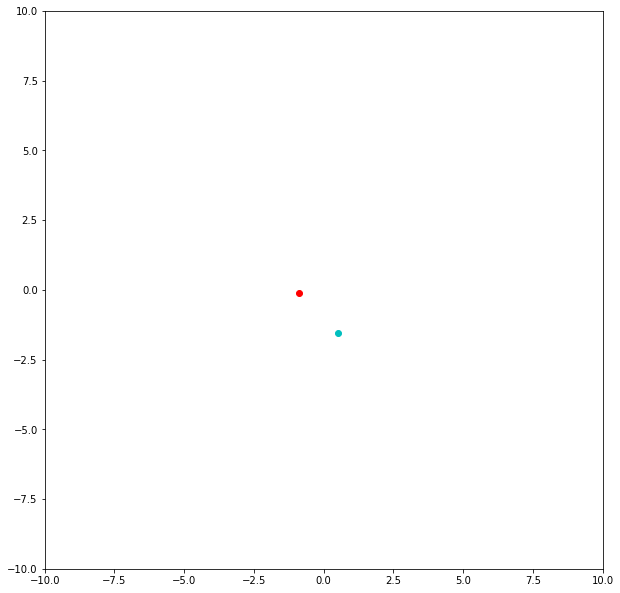

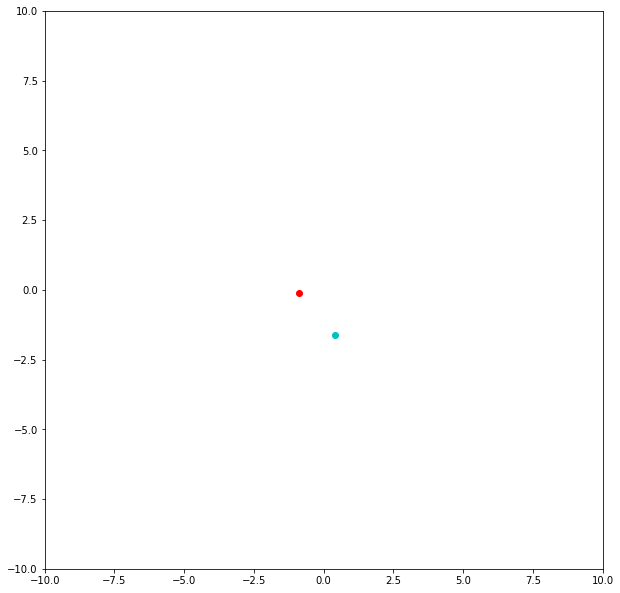

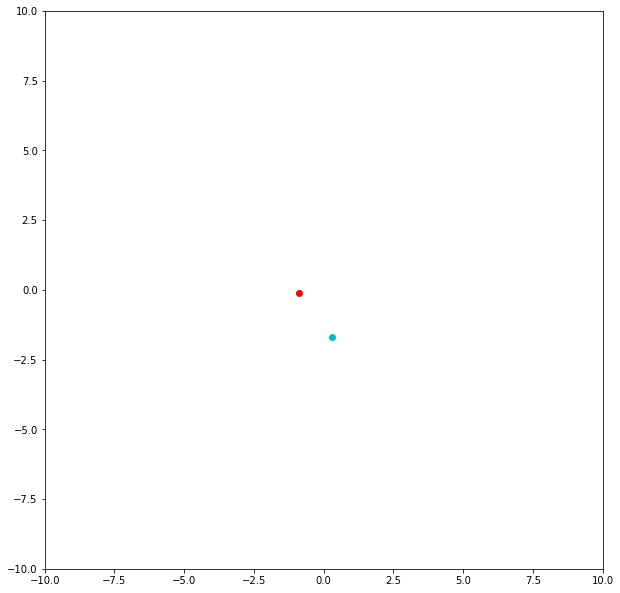

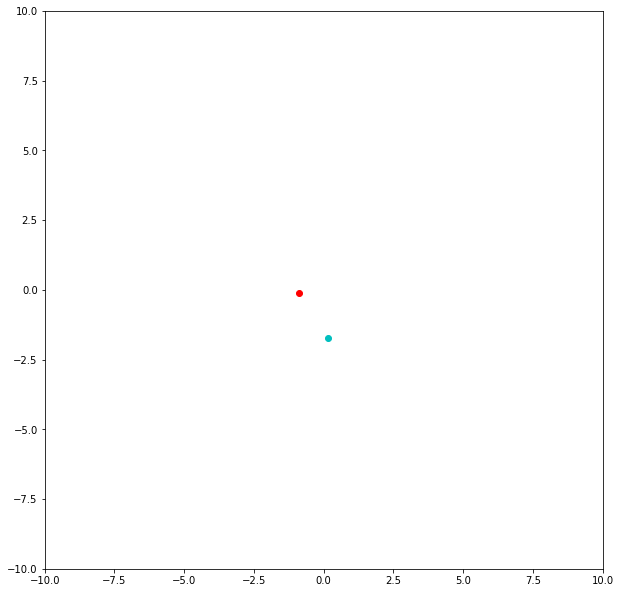

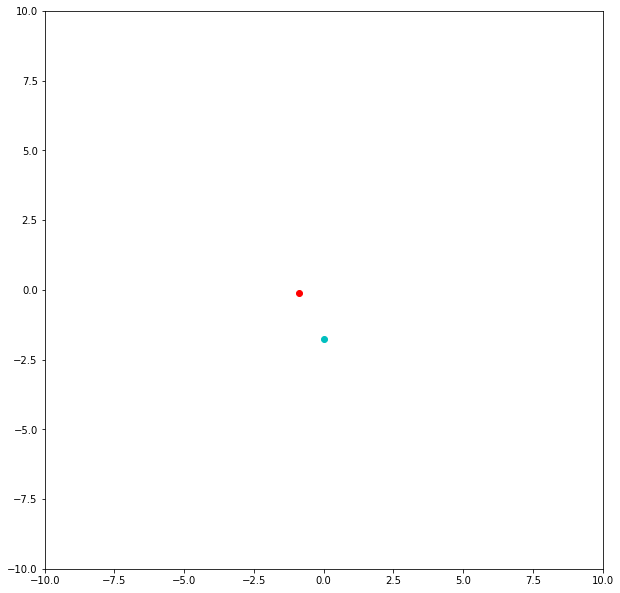

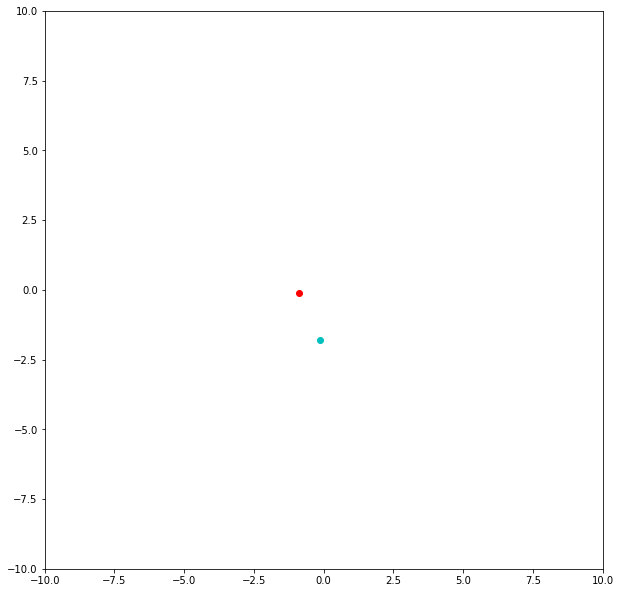

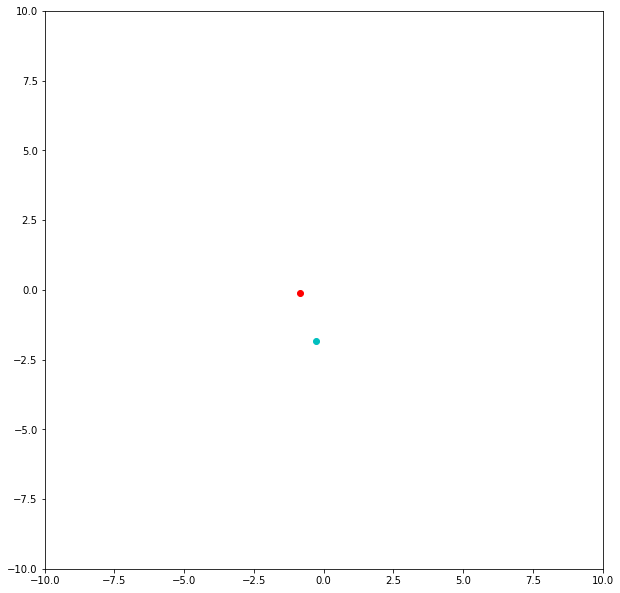

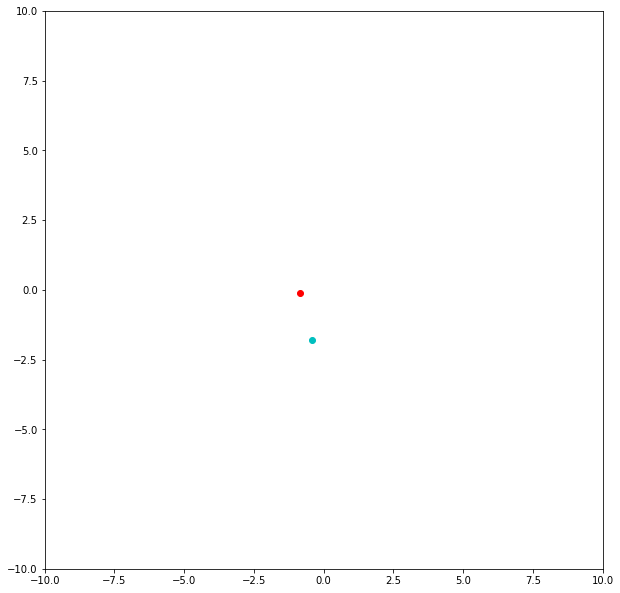

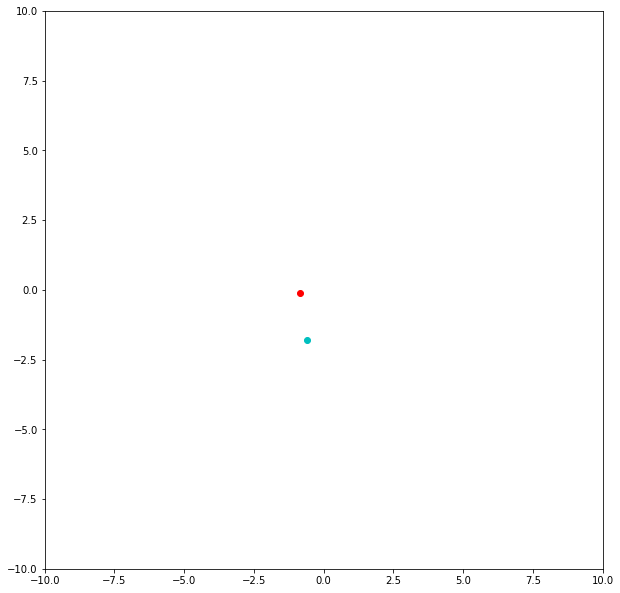

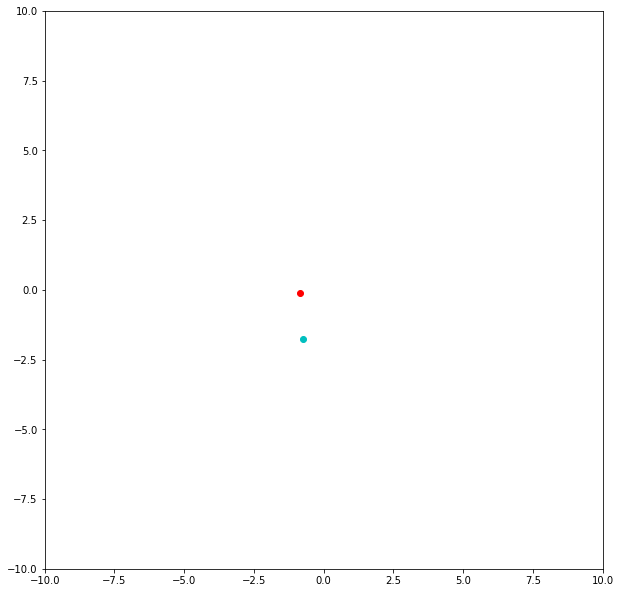

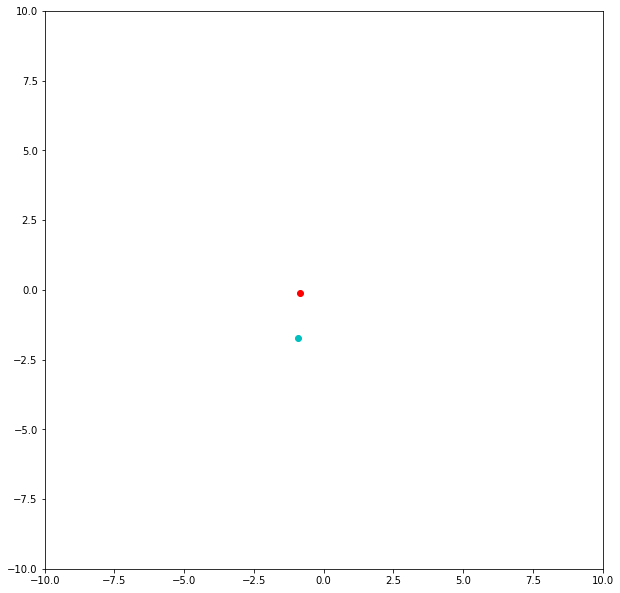

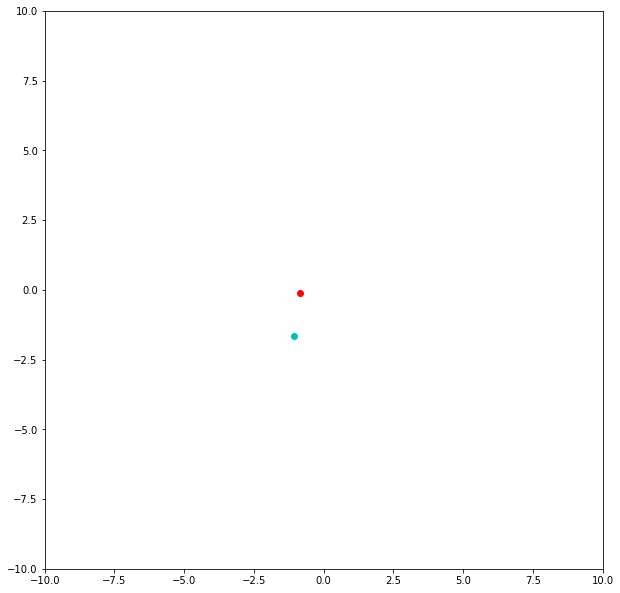

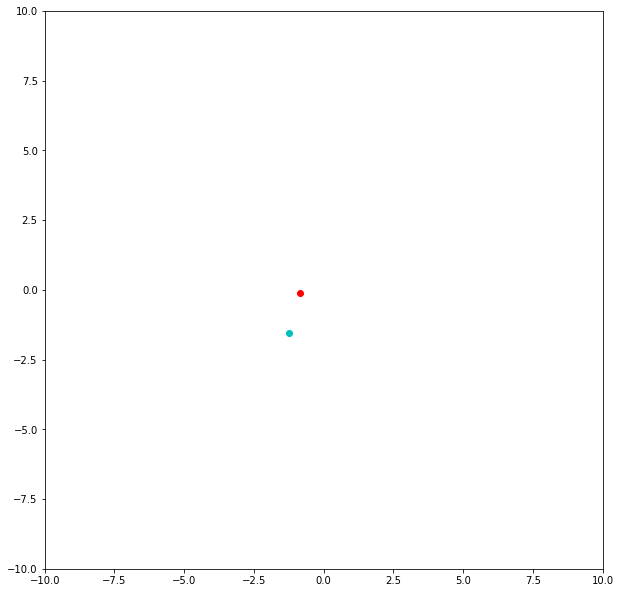

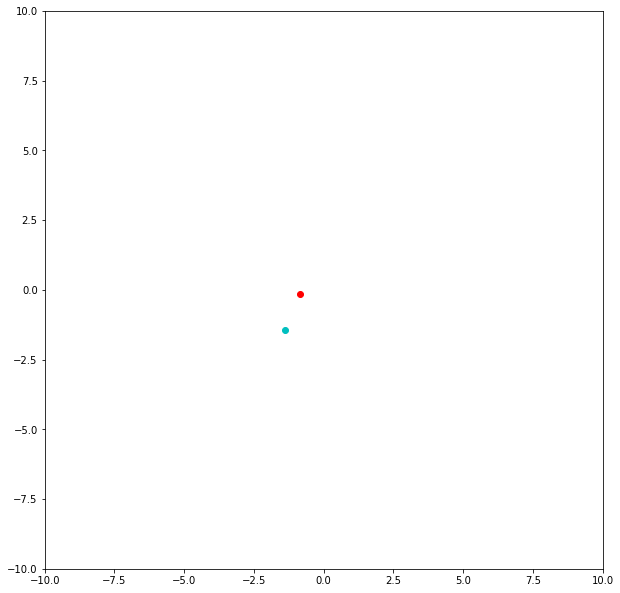

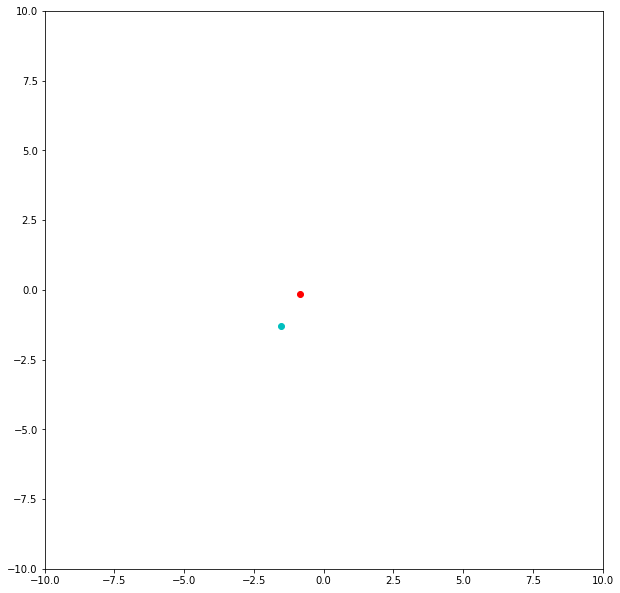

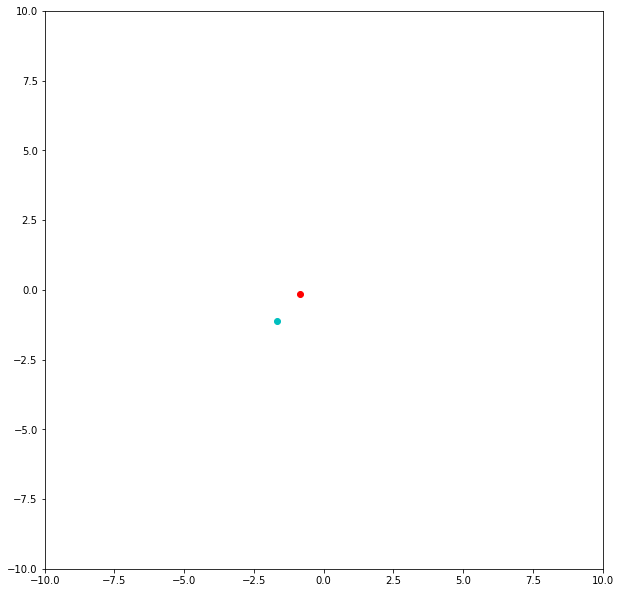

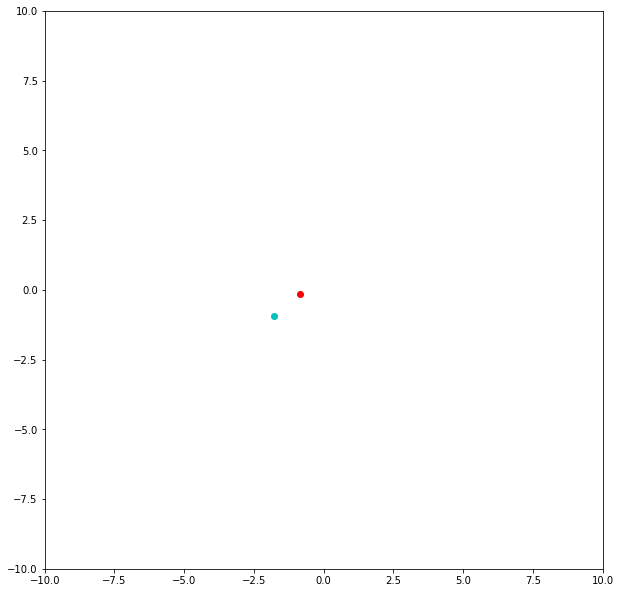

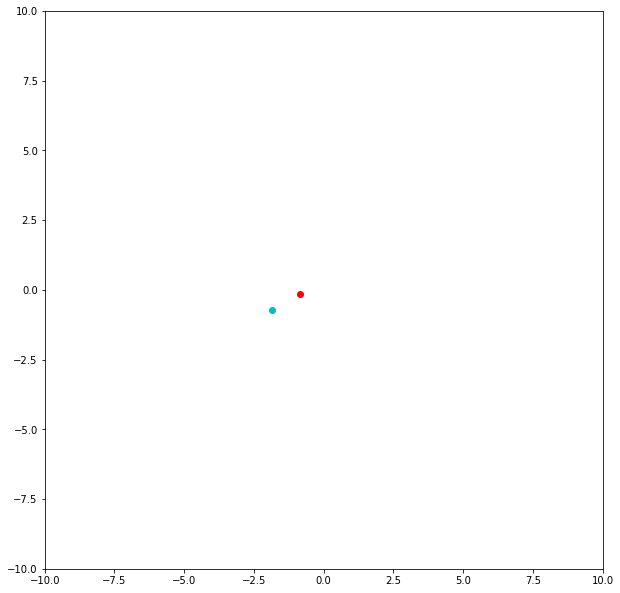

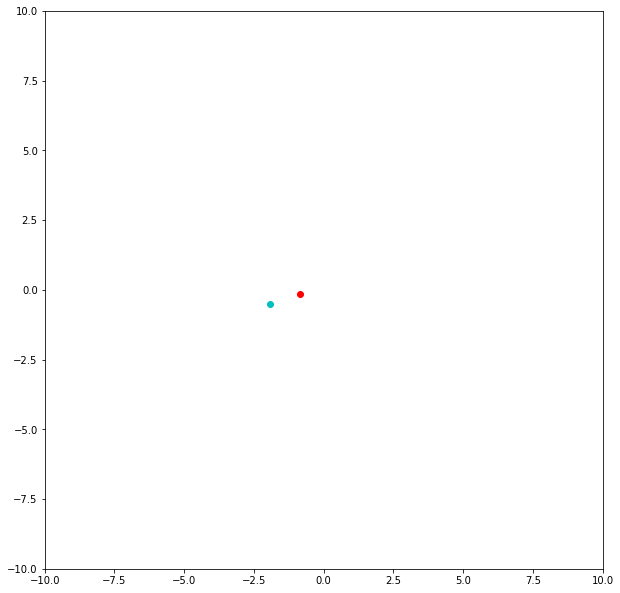

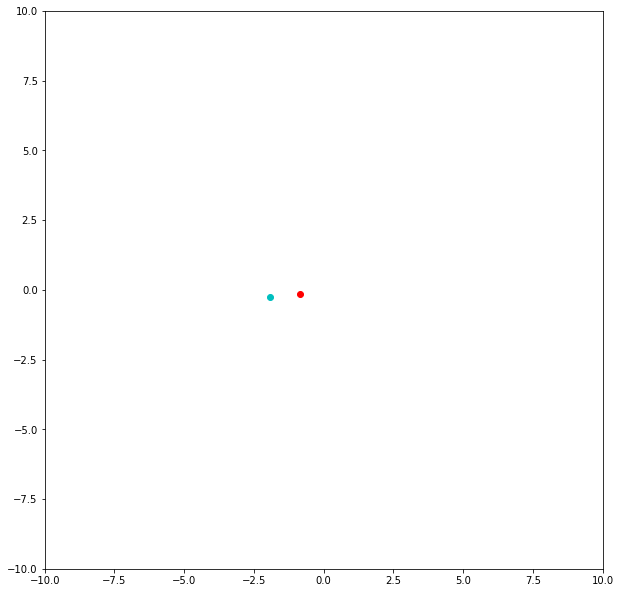

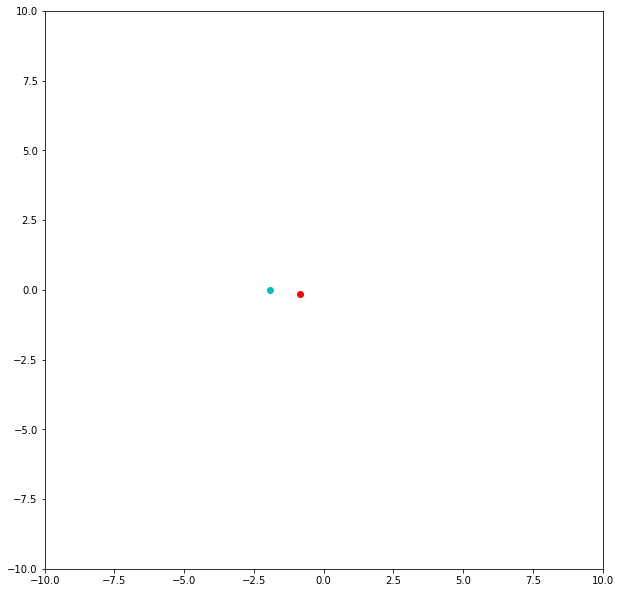

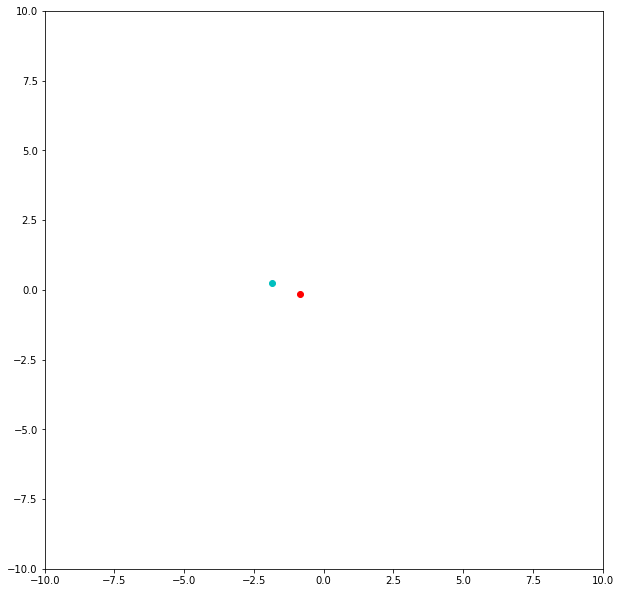

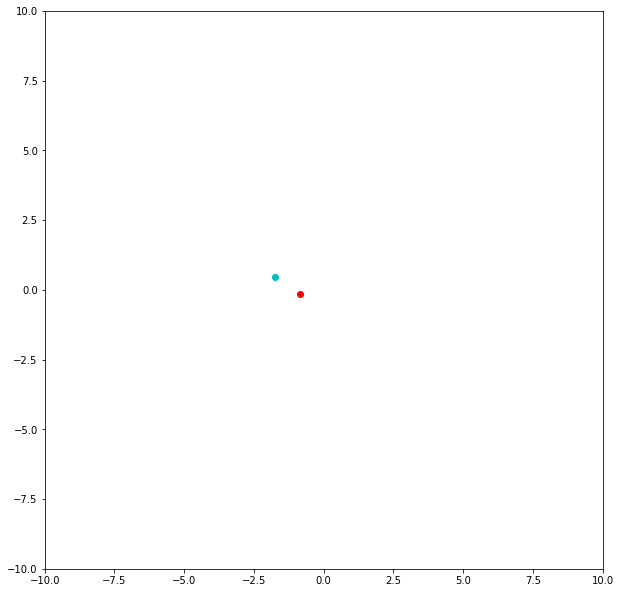

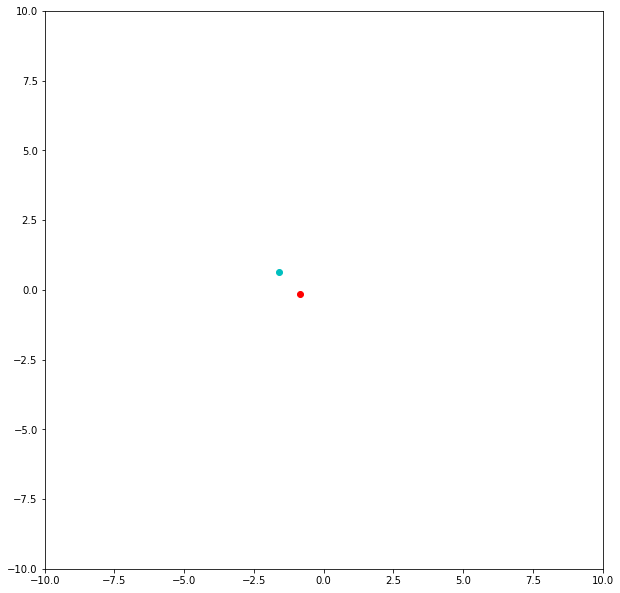

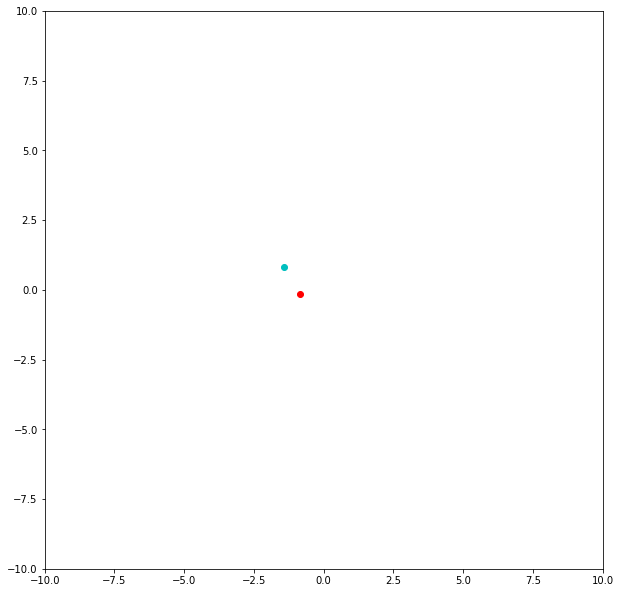

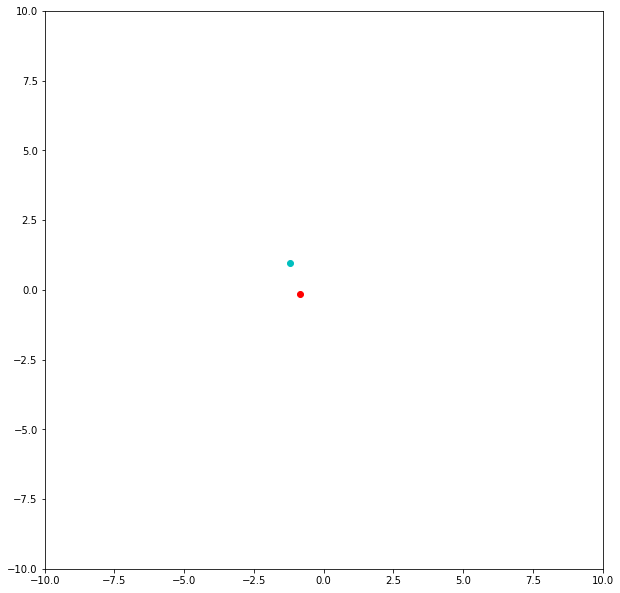

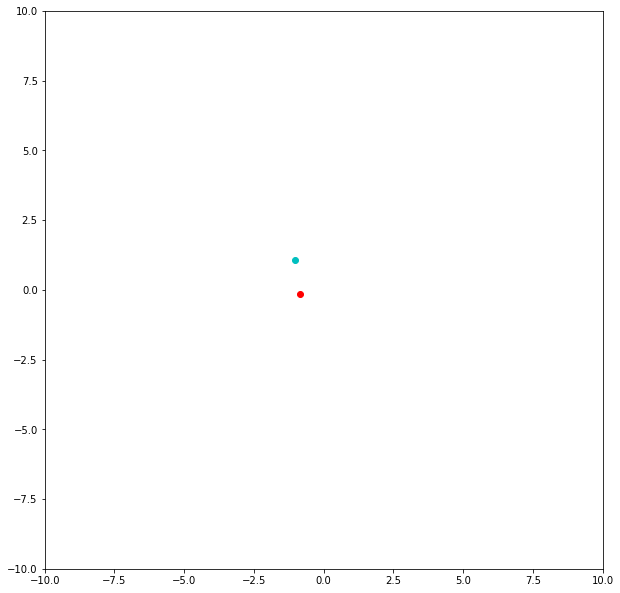

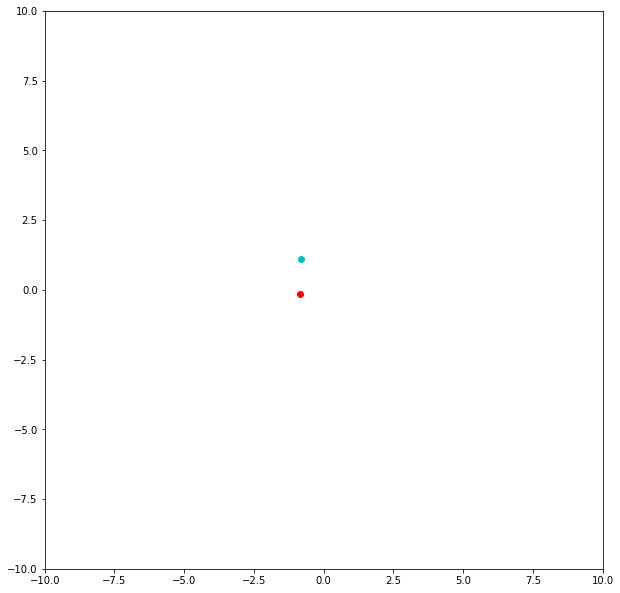

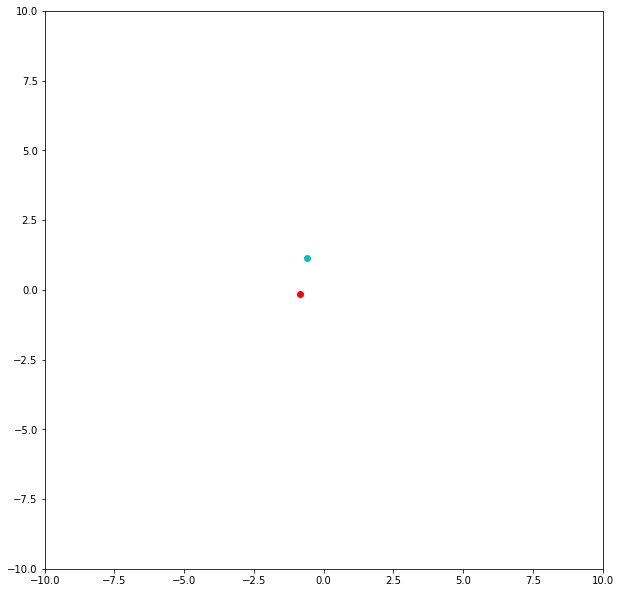

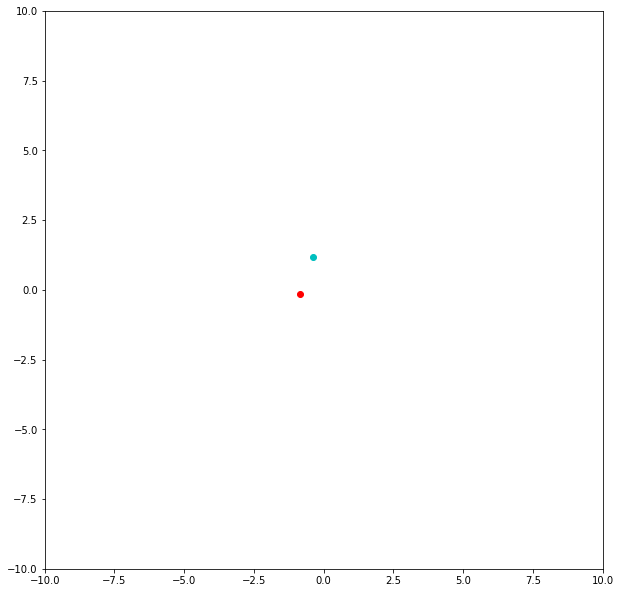

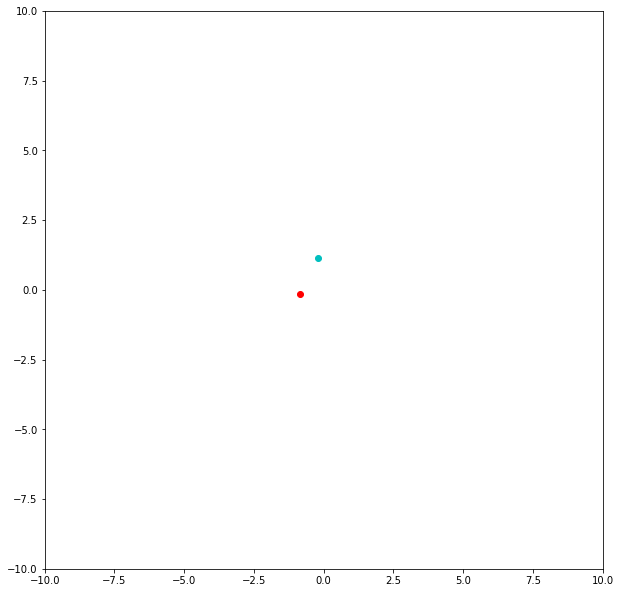

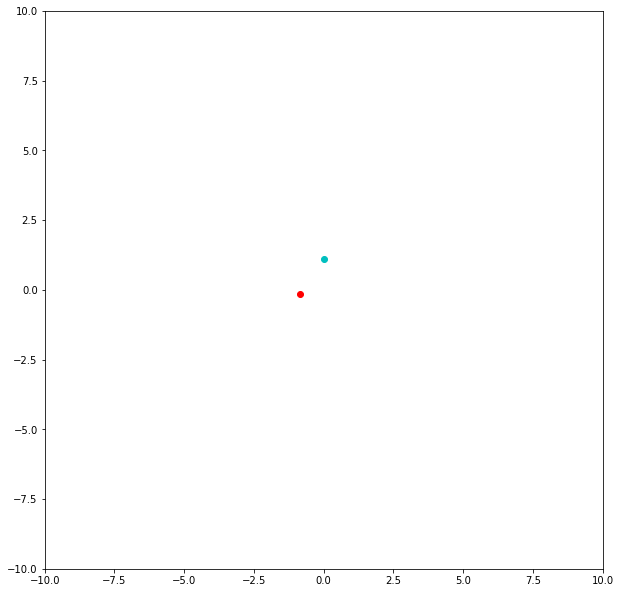

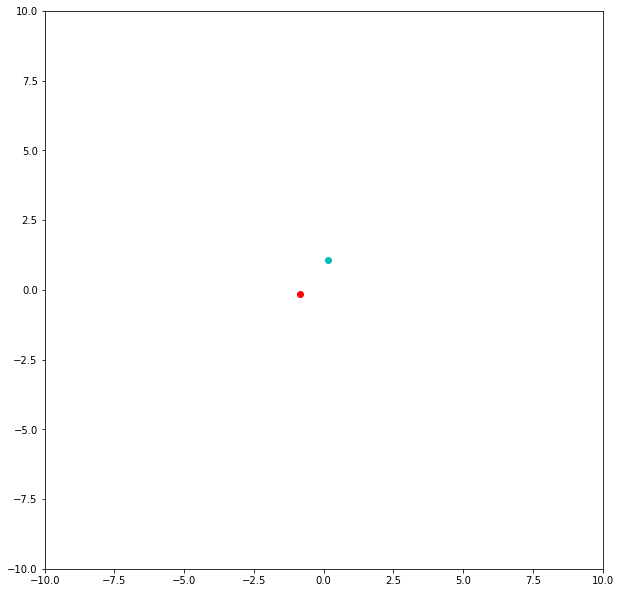

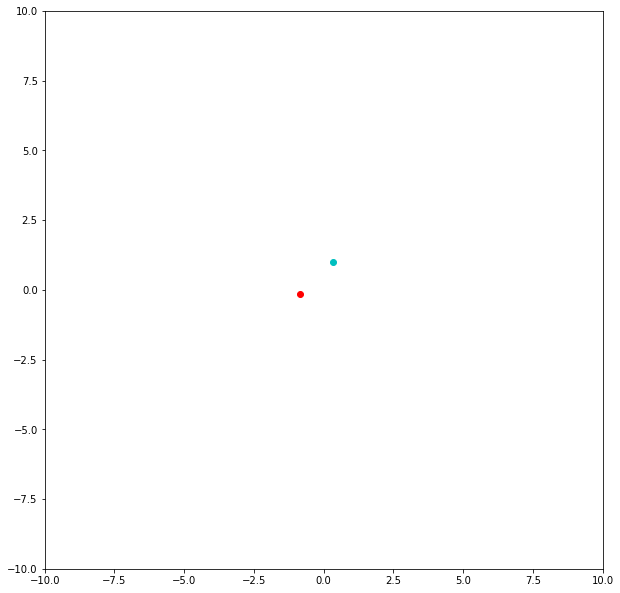

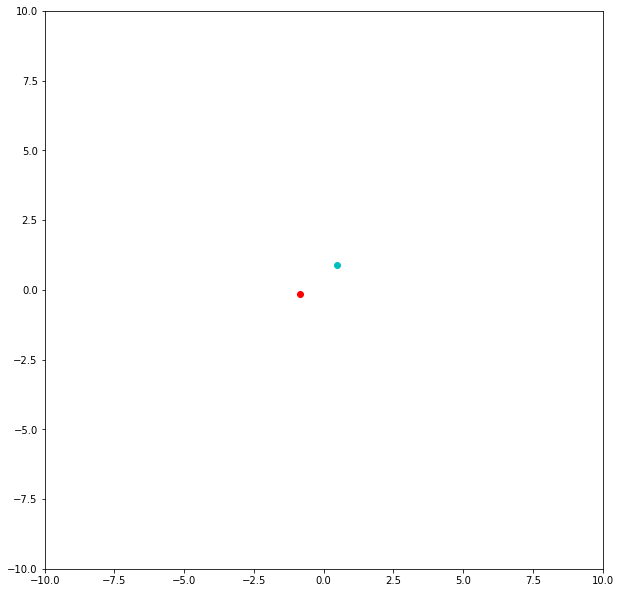

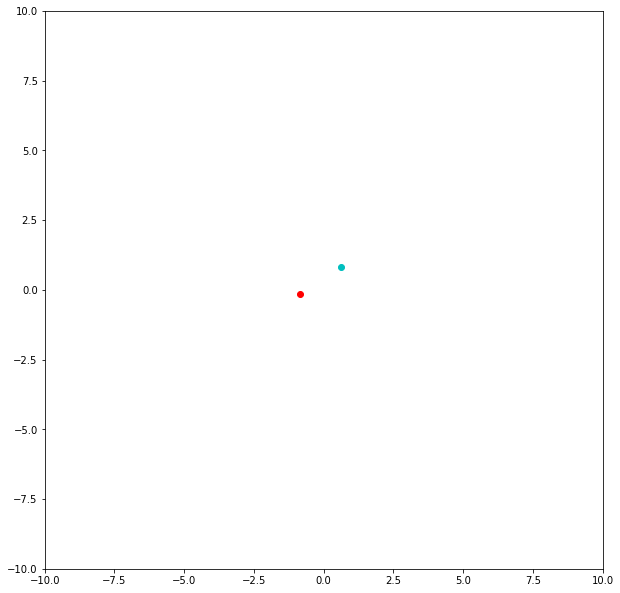

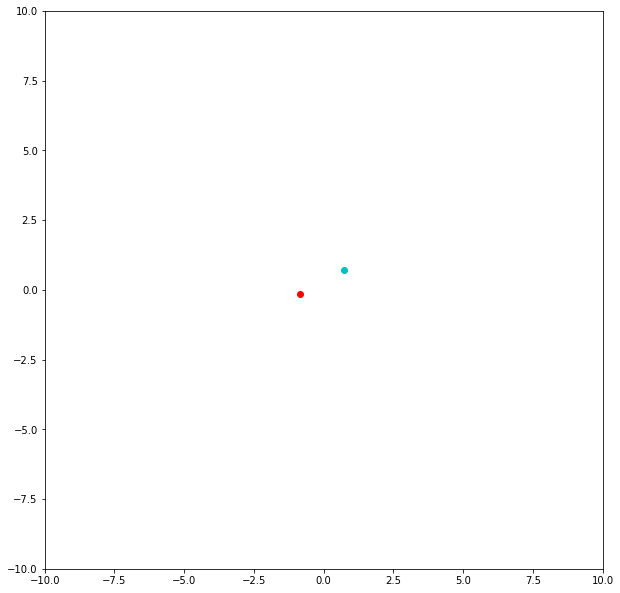

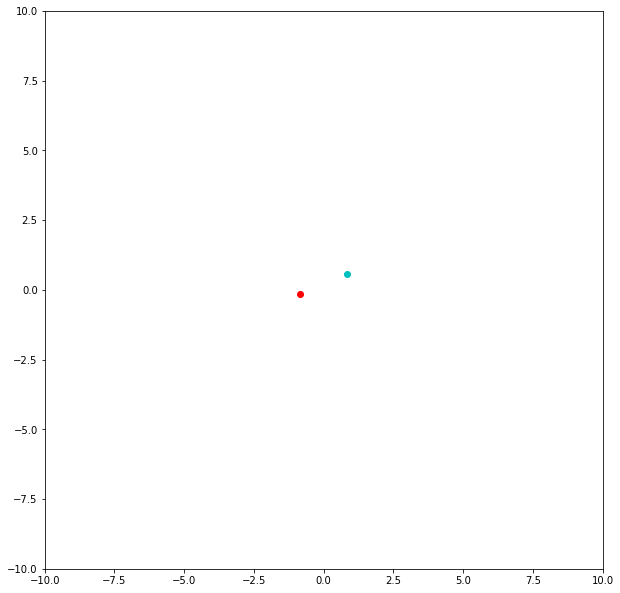

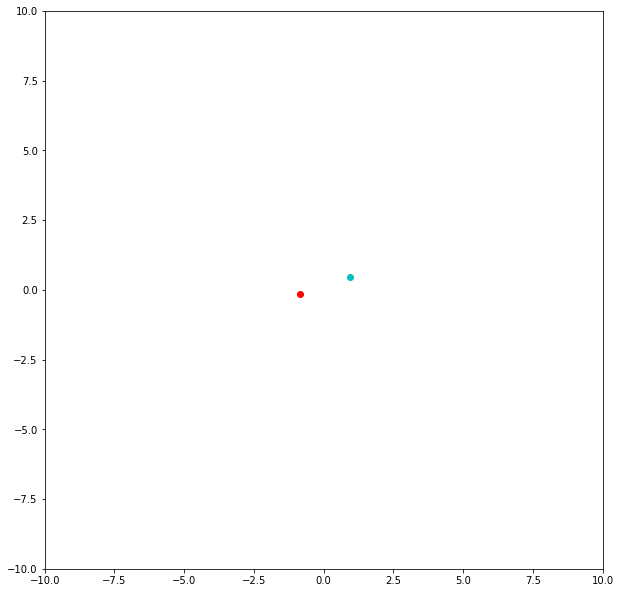

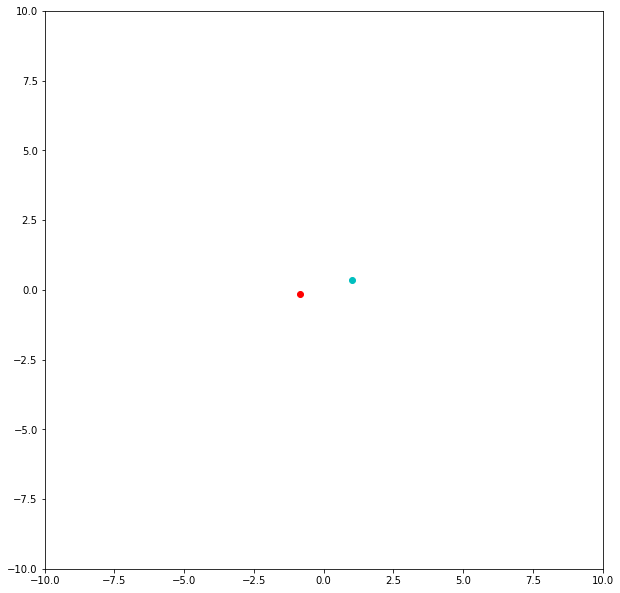

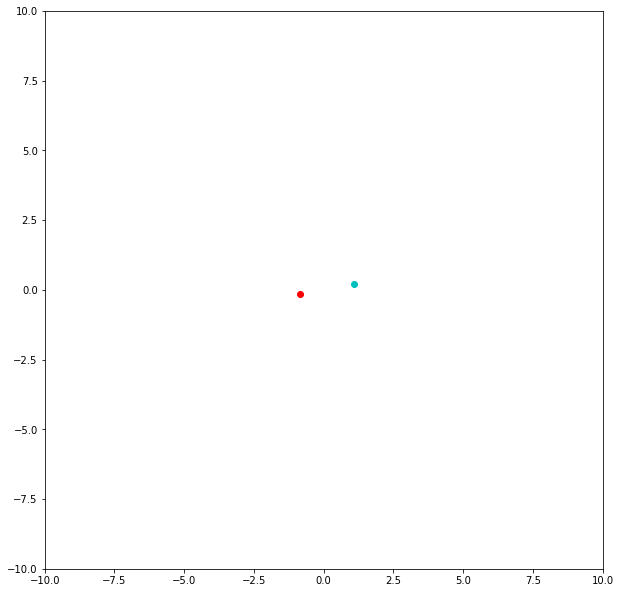

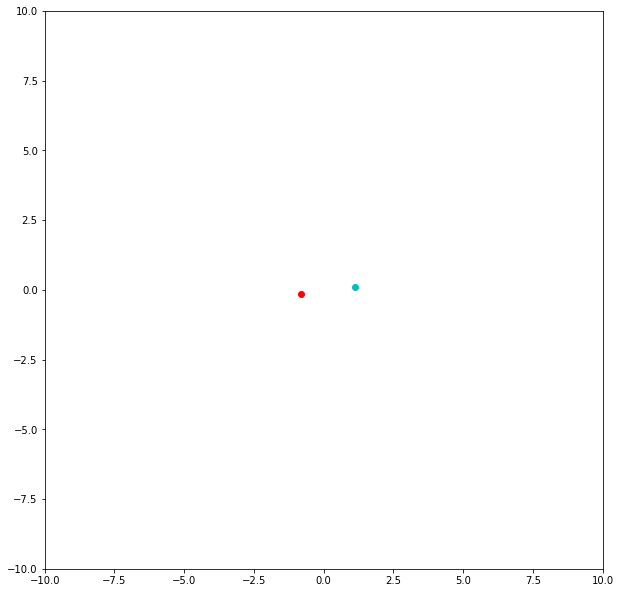

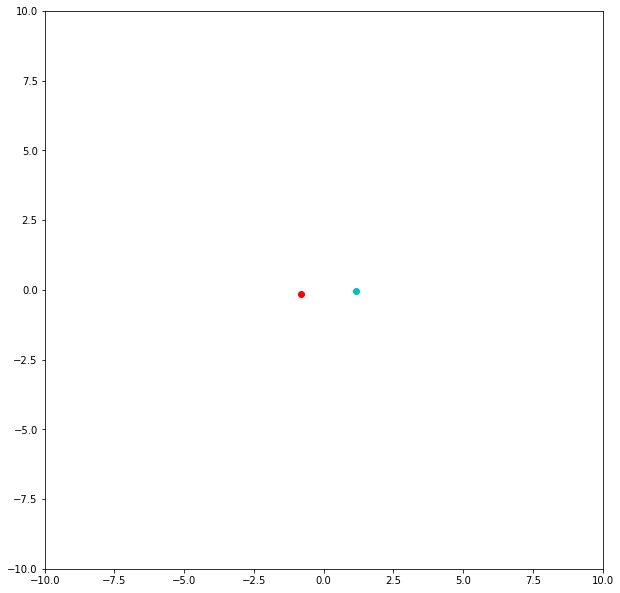

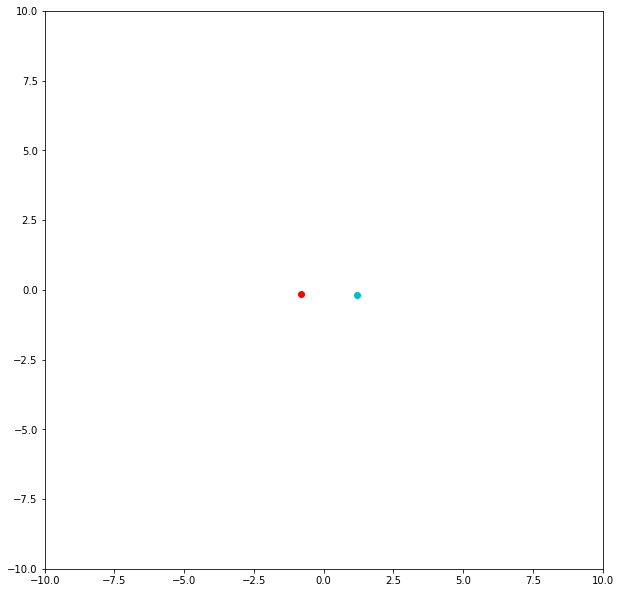

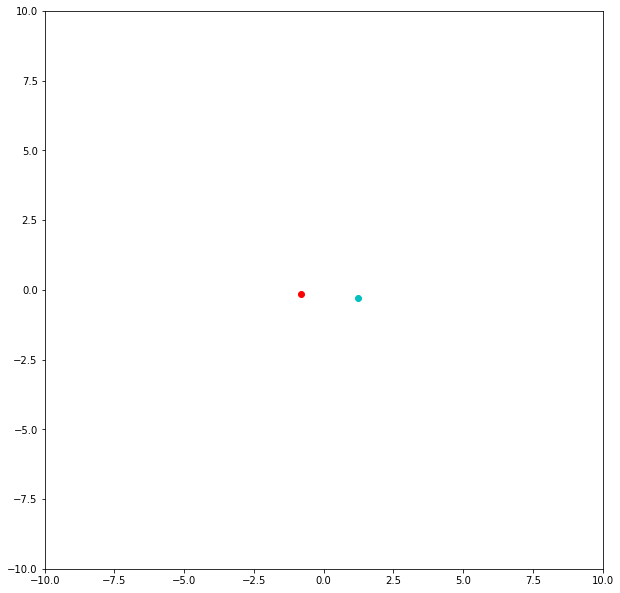

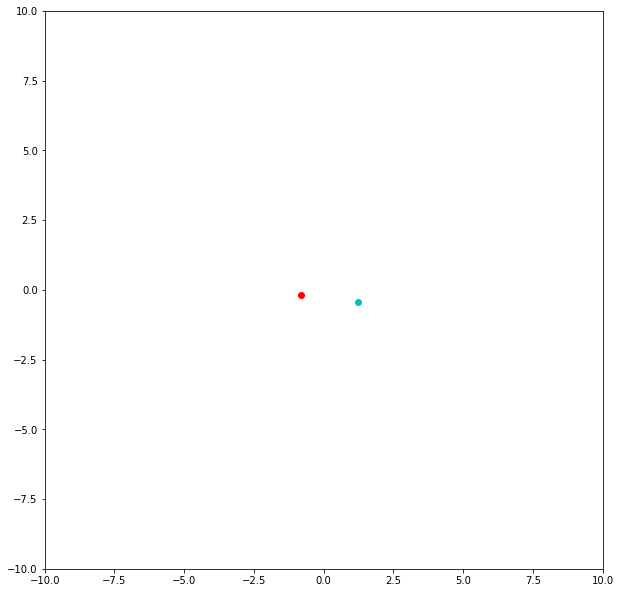

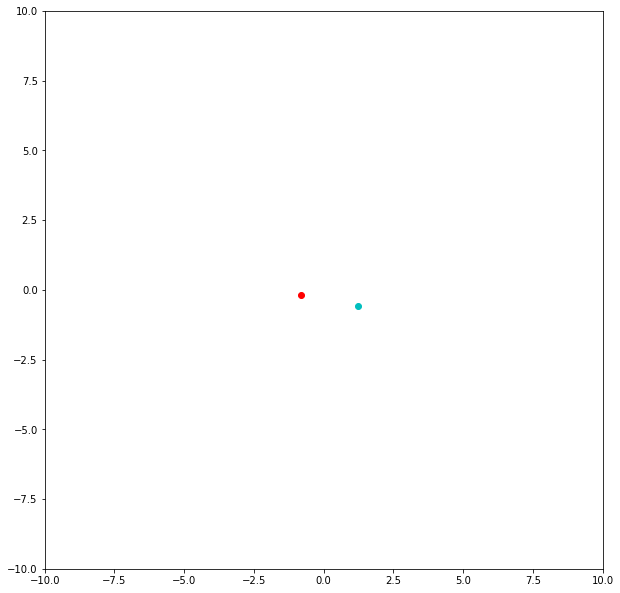

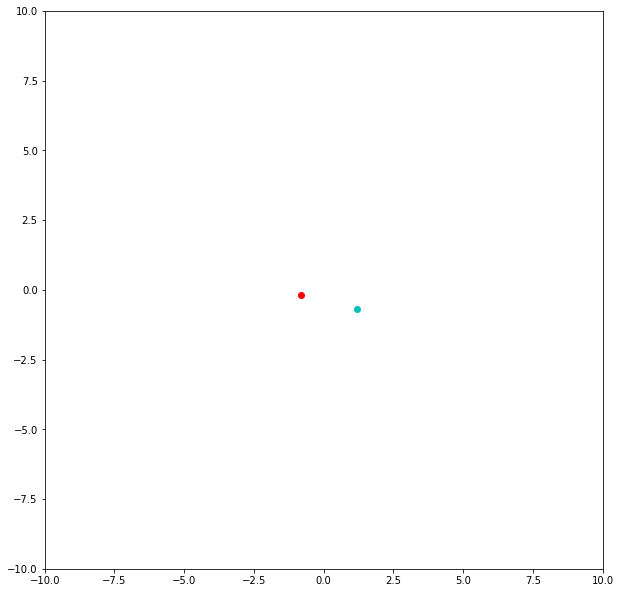

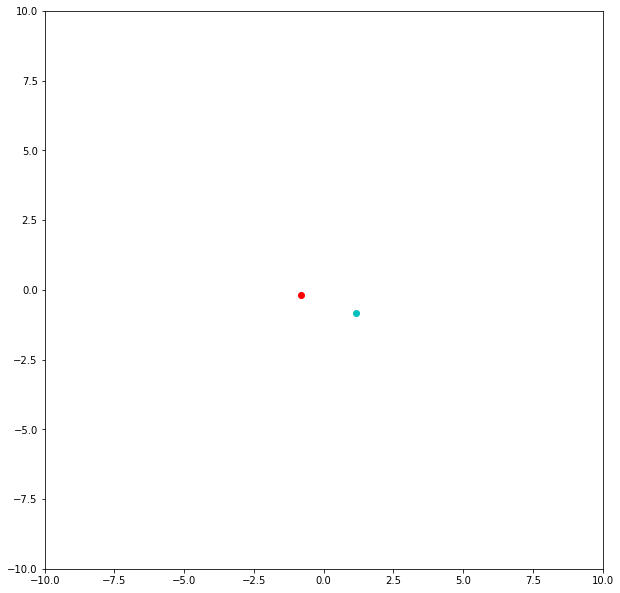

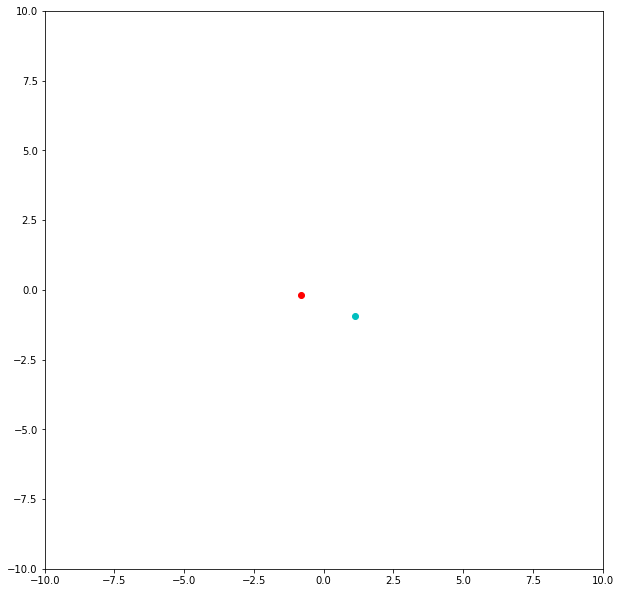

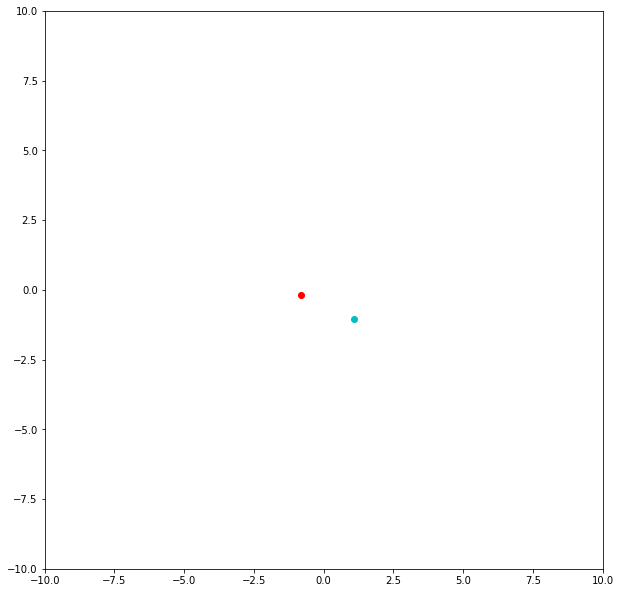

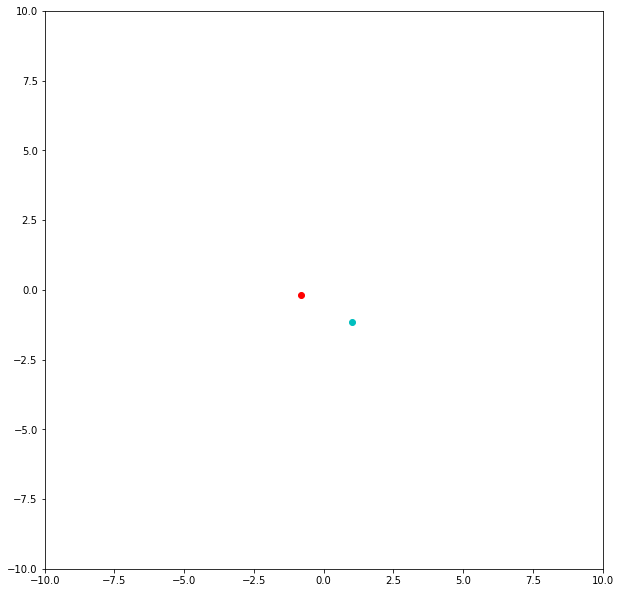

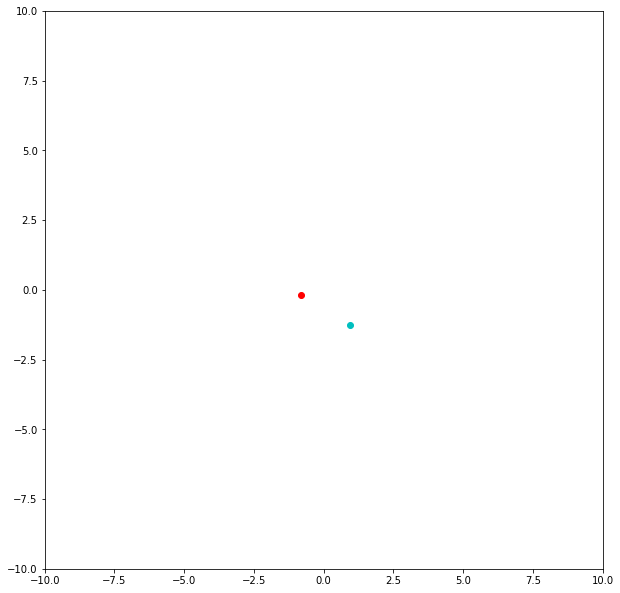

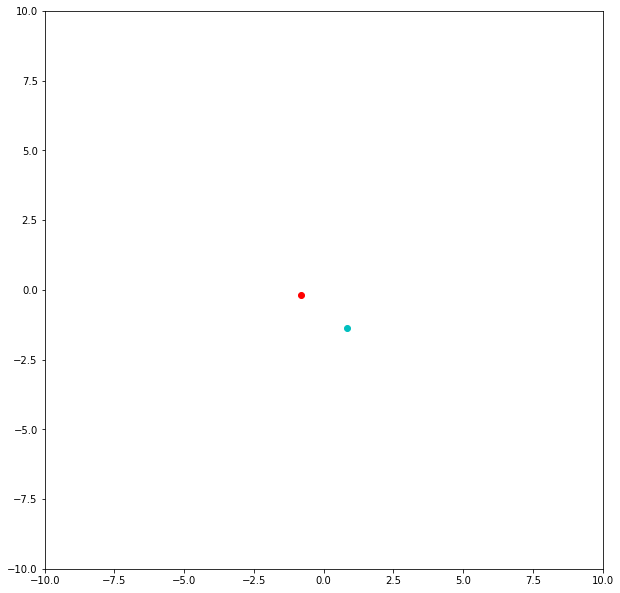

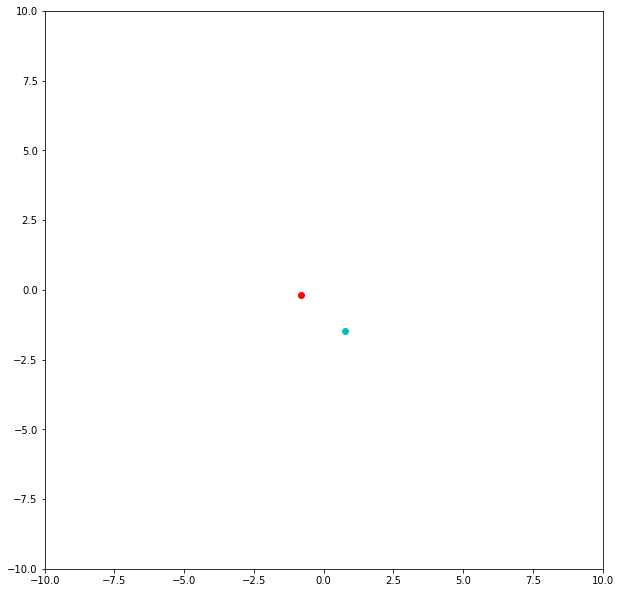

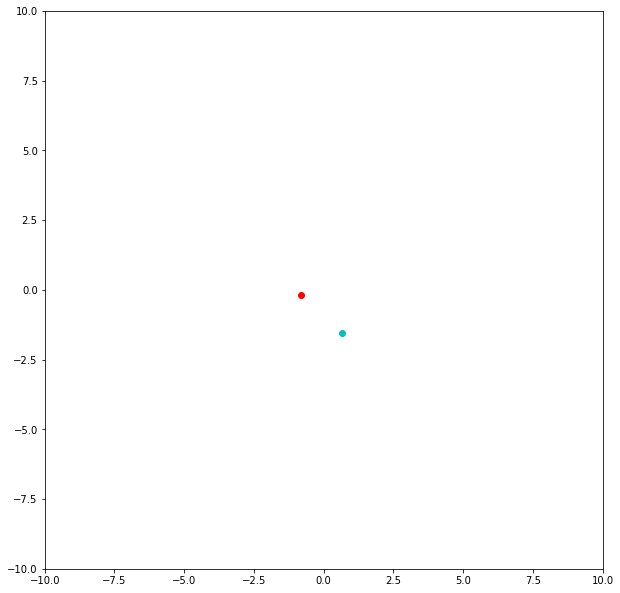

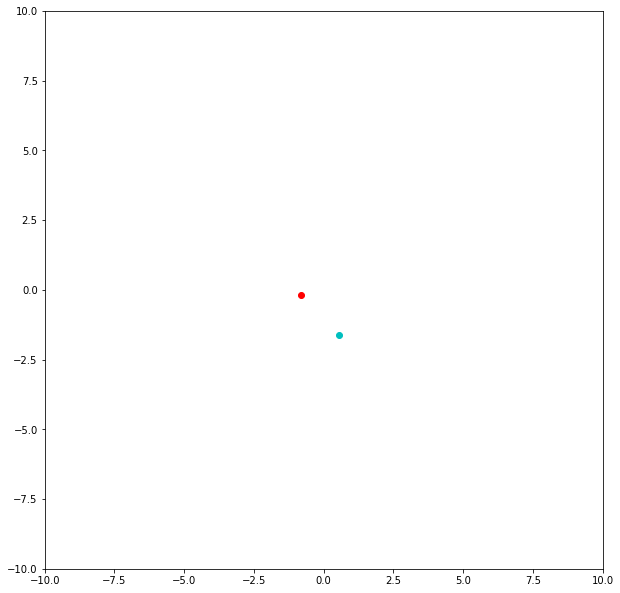

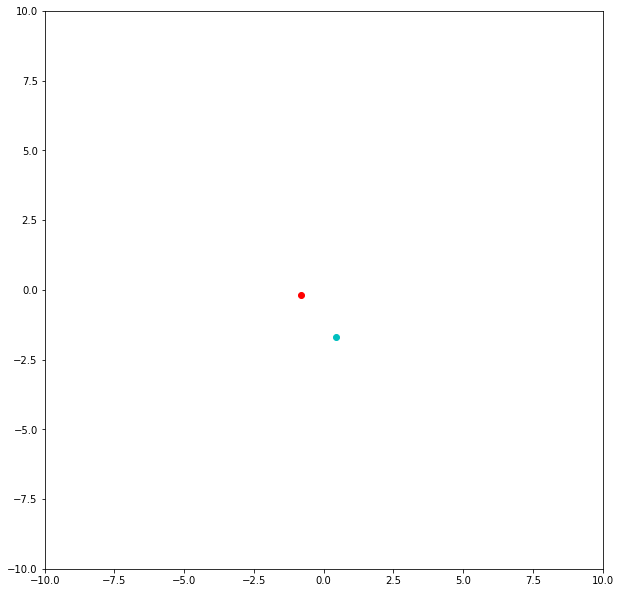

In [ ]:
# Define the Universe we get to play with. 
SolarSystem = []; 

G  = 6.67428*10**(-11);
M1 = 1000.0/G;
M2 = 5000000.0/G;
M3 = 1000/G;
M4 = 100.0/G;
M5 = 10000.0/G;

dt    = 0.0001
TimeSteps = 200

P1     = planet(M1,  1.0, -0.1 ,  0.95, -0.16, "small", 1);  
P2     = planet(M2, -1.0,  0.0 , -1.0 ,   0.0, "big", 2, 'ro');  
P3     = planet(M3,  1.0, -0.12,  1.03,  -0.2, "Px", 3, 'go');   
P4     = planet(M4,  0.5, -0.1 ,  0.4 , -0.15, "Py", 4, 'mo');  
P5     = planet(M5,  1.0, -0.15,  0.98,   0.0, "Pz", 5, 'co'); 

SolarSystem.append(P1); 
SolarSystem.append(P2); 
SolarSystem.append(P3); 
SolarSystem.append(P4); 
SolarSystem.append(P5); 

# Display the inintial system. 
win = window()
PlotPlanets(SolarSystem,win)
PrintSolarSystem(SolarSystem);

for i in range(1,TimeSteps):
    print("Time step = ", i)
    updatePositions(SolarSystem,G,dt);     
    increaseIndex(SolarSystem); 
    PlotPlanets(SolarSystem,win) 